**TO-DO**
* assinalar que owners é que têm um disponent

## Table Of Contents <a id="index"></a>


- [Dataset managing](#dataset)  
- [District Data](#district-data)
- [Data Exploration](#data-exploration)
- [Matrix](#matrix)
  

#### Models
- [**Decision Tree**](#decision-tree)
    - [**Parameter Tunning**](#parameter-tunning)
- [**K-Nearest Neighbor**](#k-nearest-neighbor)
    - [**Parameter Tunning**](#parameter-tunning-2)  
- [**Support-Vector Machines**](#support-vector-machines)
    - [**Parameter Tunning**](#parameter-tunning-3)
- [**Neural Networks**](#neural-networks)
    - [**Parameter Tunning**](#parameter-tunning-4)
- [**Logistic Regression**](#logistic-regression)
    - [**Parameter Tunning**](#parameter-tunning-5)
- [**Naive Bayes**](#naive-bayes)
    - [**Parameter Tunning**](#parameter-tunning-6)
- [**Random Forest**](#random-forest)
    - [**Parameter Tunning**](#parameter-tunning-7)
- [**XGBoost**](#xgboost)
    - [**Parameter Tunning**](#parameter-tunning-8)
- [**MLP**](#mlp)
    - [**Parameter Tunning**](#parameter-tunning-9)
- [**Ada Boost**](#ada-boost)
    - [**Parameter Tunning**](#parameter-tunning-10)
- [**Voting**](#voting)

#### [Apply Model](#apply-model)



In [630]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import plotly.graph_objects as go
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV

In [631]:
def dataset(x, missing = ""):
    return pd.read_csv('Dataset/' + x + '.csv', sep = ';', low_memory = False, na_values = missing_values).rename(str.strip, axis = 'columns')
    

In [632]:
def abs_min(x):
    return x.abs().min()
abs_min.__name__ = 'abs_min'

def rangev(x):
    return x.max() - x.min()
rangev.__name__ = 'range'

def age_days(x):
    return (x.max()-x.min()).days

Functions for getting number of operations

In [633]:
def count_credit_cash(val):
    return sum(val=="credit in cash")
def count_collect(val):
    return sum(val=="collection from another bank")
def count_with_cash(val):
    return sum(val=="withdrawal in cash")
def count_remi(val):
    return sum(val=="remittance to another bank")
def count_with_card(val):
    return sum(val=="credit card withdrawal")
def count_interest(val):
    return sum(val=="interest credited")

def count_withdrawal(val):
    return sum(val=="withdrawal")
def count_credit(val):
    return sum(val=="credit")

Functions for getting the mean of the operations

In [634]:
def mean_credit_cash(val):
    return np.mean(val=="credit in cash")
def mean_collect(val):
    return np.mean(val=="collection from another bank")
def mean_with_cash(val):
    return np.mean(val=="withdrawal in cash")
def mean_remi(val):
    return np.mean(val=="remittance to another bank")
def mean_with_card(val):
    return np.mean(val=="credit card withdrawal")
def mean_interest(val):
    return np.mean(val=="interest credited")

def mean_withdrawal(val):
    return np.mean(val=="withdrawal")
def mean_credit(val):
    return np.mean(val=="credit")

Functions for getting the standard deviation of the operations

In [635]:
def std_credit_cash(val):
    return np.std(val=="credit in cash")
def std_collect(val):
    return np.std(val=="collection from another bank")
def std_with_cash(val):
    return np.std(val=="withdrawal in cash")
def std_remi(val):
    return np.std(val=="remittance to another bank")
def std_with_card(val):
    return np.std(val=="credit card withdrawal")
def std_interest(val):
    return np.std(val=="interest credited")


def std_withdrawal(val):
    return np.std(val=="withdrawal")
def std_credit(val):
    return np.std(val=="credit")

Functions for getting the covariance of the operations

In [636]:
def cov_credit_cash(val):
    return np.cov(val=="credit in cash")
def cov_collect(val):
    return np.cov(val=="collection from another bank")
def cov_with_cash(val):
    return np.cov(val=="withdrawal in cash")
def cov_remi(val):
    return np.cov(val=="remittance to another bank")
def cov_with_card(val):
    return np.cov(val=="credit card withdrawal")
def cov_interest(val):
    return np.cov(val=="interest credited")

def cov_withdrawal(val):
    return np.cov(val=="withdrawal")
def cov_credit(val):
    return np.cov(val=="credit")

In [637]:
missing_values = ['?', 'NA', '']
account_data = dataset('account', missing_values)
client_data = dataset('client', missing_values)
disp_data = dataset('disp', missing_values)
district_data = dataset('district', missing_values)
card_train = dataset('card_train', missing_values)
card_test = dataset('card_test')
loan_train = dataset('loan_train', missing_values)
loan_test = dataset('loan_test')
trans_train = dataset('trans_train', missing_values)
trans_test = dataset('trans_test')

We can see the distribution of the district regions for each one of the different regions.

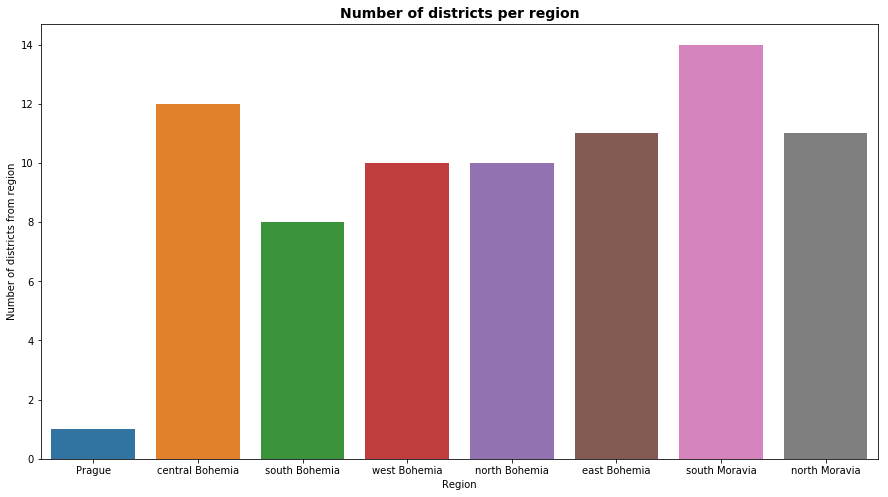

In [638]:
plt.figure(figsize=(15,8))
sb.countplot(x='region', data=district_data)
plt.title("Number of districts per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Region');
plt.ylabel('Number of districts from region');
plt.show()

To study if the region might have an impact on the acceptance of the loan we will create a graph comparing the percentages of successful loans per region.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



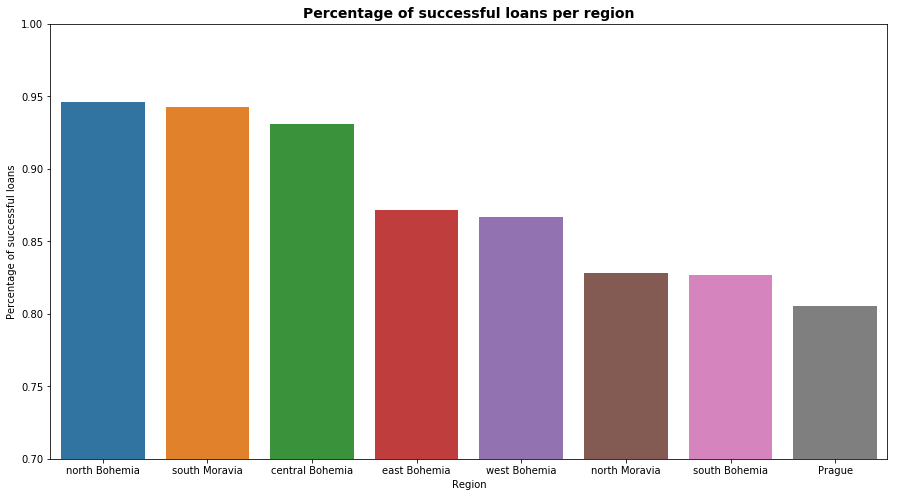

In [639]:
district_data_region = district_data.copy()
region_data = loan_train
region_data = pd.merge(region_data, trans_train, on = 'account_id', suffixes = ('', '_trans'))
region_data = pd.merge(region_data, account_data, on = 'account_id', suffixes = ('', '_account'))
#train_data = train_data.dropna()
region_data = pd.merge(region_data, district_data_region.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))

region_total = region_data["region"].value_counts()
tuples_total = [tuple((x, y)) for x, y in region_total.items()]

regions_status_1 = region_data.loc[region_data['status'] == 1]
region_total_1 = regions_status_1["region"].value_counts()
tuples_total_1 = [tuple((x, y)) for x, y in region_total_1.items()]

lista=[]
for x in tuples_total:
    for y in tuples_total_1:
        if x[0]==y[0]:
            lista.append((x[0],x[1],y[1]))

percentages = [(i[0],i[2] / i[1]) for i in lista]
percentages.sort(key = lambda x: -x[1])

x = [i[0] for i in percentages]
y = [i[1] for i in percentages]

plt.figure(figsize=(15,8))
sb.barplot(x,y)
plt.ylim(0.7, 1)
plt.title("Percentage of successful loans per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Region');
plt.ylabel('Percentage of successful loans');
plt.show()

Now let's see the different values the parameter type can have.

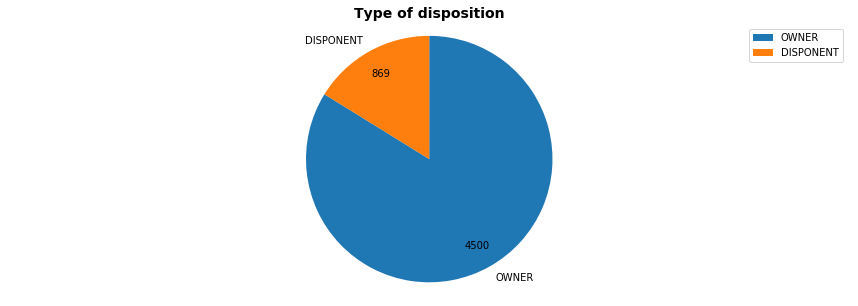

In [640]:
disp_data_pie = disp_data.copy()

ser = disp_data_pie.groupby('type')['type'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend()
plt.axis('equal')
plt.title('Type of disposition', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.set_size_inches(15, 5)

Since only owner can issue permanent orders and ask for a loan, there is no interess in keeping this parameter in our dataset.

In [641]:
# Removing name and region from district
district_data.drop(['name', 'region'], axis=1, inplace=True)

# only owner can issue permanent orders and ask for a loan
disp_owners = disp_data[disp_data.type.eq('OWNER')]
disp_owners.drop(['type'], axis=1, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As *birth_number* column doesn't add any value to our model as it is in the original data (it's represented as an int in format YYMMDD for men and YYMM+50DD for women), let's put it in format YY-MM-DD and create a new column called *genre*.

In [642]:
# Normalize birthday dates and add a new column (Genre) to distinguish

birth_dates = client_data['birth_number']
dates_parsed = []
genre = []
for date in birth_dates:
    month = int(str(date)[2:4])
    if month > 12:
        genre.append(0)
        month = month - 50
        if month < 10:
            month = '0' + str(month)
        else:
            month = str(month)
    else:
        #print('AAAA: ' + str(month))
        if month < 10:
            month = '0' + str(month)
            #print('BBBB: ' + str(month))
        else:
            month = str(month)
        genre.append(1)
    dates_parsed.append(str(date)[:2] + '-' + month + '-' + str(date)[4:])
    

# client_data = client_data.drop(['birth_number'], axis = 1)
client_data['birth_number'] = dates_parsed
client_data['genre'] = genre
client_data.head()

client_id birth_number  district_id  genre
0          1     70-12-13           18      0
1          2     45-02-04            1      1
2          3     40-10-09            1      0
3          4     56-12-01            5      1
4          5     60-07-03            5      0

We can also see the *genre* distribution, where 1 means male and 0 female.

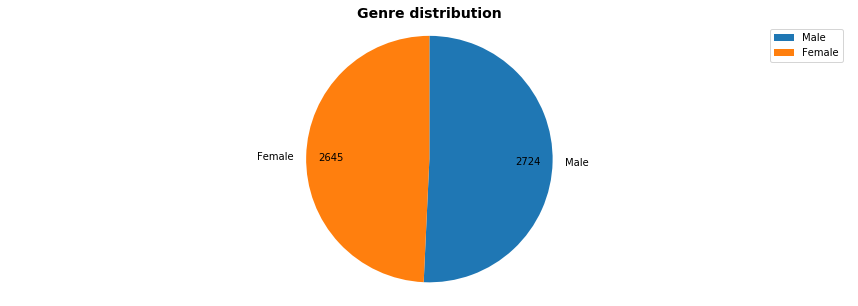

In [643]:
client_data_genre_copy = client_data.copy()

ser = client_data_genre_copy.groupby('genre')['genre'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=["Male","Female"], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend()
plt.axis('equal')
plt.title('Genre distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.set_size_inches(15, 5)

In [644]:
# build train dataset

train_data = loan_train
train_data = pd.merge(train_data, trans_train, on = 'account_id', suffixes = ('', '_trans'))
train_data = pd.merge(train_data, account_data, on = 'account_id', suffixes = ('', '_account'))
#train_data = train_data.dropna()
train_data = pd.merge(train_data, district_data.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
train_data = pd.merge(train_data, disp_owners, on = 'account_id', suffixes = ('', '_disp'))
train_data = pd.merge(train_data, card_train, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
train_data = pd.merge(train_data, client_data, on = 'client_id', suffixes = ('', '_client'))
train_data = train_data.drop(['district_id_client'], axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24494 entries, 0 to 24493
Data columns (total 39 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           24494 non-null  float64
 1   account_id                                        24494 non-null  float64
 2   date                                              24494 non-null  float64
 3   amount                                            24494 non-null  float64
 4   duration                                          24494 non-null  float64
 5   payments                                          24494 non-null  float64
 6   status                                            24494 non-null  float64
 7   trans_id                                          24494 non-null  float64
 8   date_trans                                        24494 non-null  float64
 9   type             

In [645]:
train_data.head()

loan_id  account_id      date   amount  duration  payments  status  \
0   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
1   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
2   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
3   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
4   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   

    trans_id  date_trans    type  ...  \
0   523621.0    930322.0  credit  ...   
1   524054.0    930421.0  credit  ...   
2   524055.0    930521.0  credit  ...   
3   524056.0    930620.0  credit  ...   
4  2820215.0    930913.0  credit  ...   

  no. of enterpreneurs per 1000 inhabitants  no. of commited crimes '95  \
0                                     100.0                      2985.0   
1                                     100.0                      2985.0   
2                                     100.0                      2985.0   
3                                     100.0                      2985.0   
4                                     100.0                      2985.0   

   no. of commited crimes '96 disp_id client_id  card_id  type_card issued  \
0                      2804.0    2166    2166.0      NaN        NaN    NaN   
1                      2804.0    2166    2166.0      NaN        NaN    NaN   
2                      2804.0    2166    2166.0      NaN        NaN    NaN   
3                      2804.0    2166    2166.0      NaN        NaN    NaN   
4                      2804.0   11189   11497.0      NaN        NaN    NaN   

   birth_number  genre  
0      47-07-22      0  
1      47-07-22      0  
2      47-07-22      0  
3      47-07-22      0  
4      59-07-17      0  

[5 rows x 39 columns]

In [646]:
# build test dataset

test_data = loan_test
test_data = pd.merge(test_data, trans_test, on = 'account_id', suffixes = ('', '_trans'))
test_data = pd.merge(test_data, account_data, on = 'account_id', suffixes = ('', '_account'))
test_data = pd.merge(test_data, district_data.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
test_data = pd.merge(test_data, disp_owners, on = 'account_id', suffixes = ('', '_disp'))
test_data = pd.merge(test_data, card_test, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
test_data = pd.merge(test_data, client_data, on = 'client_id', suffixes = ('', '_client'))
test_data = test_data.drop(['district_id_client'], axis=1)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30200 entries, 0 to 30199
Data columns (total 39 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           30200 non-null  int64  
 1   account_id                                        30200 non-null  int64  
 2   date                                              30200 non-null  int64  
 3   amount                                            30200 non-null  int64  
 4   duration                                          30200 non-null  int64  
 5   payments                                          30200 non-null  int64  
 6   status                                            0 non-null      float64
 7   trans_id                                          30200 non-null  int64  
 8   date_trans                                        30200 non-null  int64  
 9   type             

In [647]:
test_data.head()

loan_id  account_id    date  amount  duration  payments  status  trans_id  \
0     5895        4473  970103   93960        60      1566     NaN   1309867   
1     5895        4473  970103   93960        60      1566     NaN   1309878   
2     5895        4473  970103   93960        60      1566     NaN   1310161   
3     5895        4473  970103   93960        60      1566     NaN   3664951   
4     5895        4473  970103   93960        60      1566     NaN   1309879   

   date_trans    type  ... no. of enterpreneurs per 1000 inhabitants  \
0      951009  credit  ...                                       132   
1      951107  credit  ...                                       132   
2      951108  credit  ...                                       132   
3      951130  credit  ...                                       132   
4      951207  credit  ...                                       132   

   no. of commited crimes '95  no. of commited crimes '96 disp_id client_id  \
0                      2080.0                        2122    5395      5395   
1                      2080.0                        2122    5395      5395   
2                      2080.0                        2122    5395      5395   
3                      2080.0                        2122    5395      5395   
4                      2080.0                        2122    5395      5395   

   card_id  type_card issued  birth_number  genre  
0      NaN        NaN    NaN      62-06-01      1  
1      NaN        NaN    NaN      62-06-01      1  
2      NaN        NaN    NaN      62-06-01      1  
3      NaN        NaN    NaN      62-06-01      1  
4      NaN        NaN    NaN      62-06-01      1  

[5 rows x 39 columns]

Now we can create a column *age_loan* where we will keep the age of the client at the time of the requested loan.

In [648]:
from datetime import date

#print(len(birth_dates))
#print(sorted(birth_dates))
 
def calculateAge(birthDate, loanDate):
    loan = loanDate.split("-")
    loan_date = date(int(loan[0]), int(loan[1]), int(loan[2]))
    birth = birthDate.split("-")
    
    birth_date = date(int(birth[0]), int(birth[1]), int(birth[2]))
    return (int((loan_date-birth_date).days/365))

In [649]:
loan_dates = train_data['date']

loan_dates = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_dates]

birth_dates = train_data['birth_number']

#print(sorted(birth_dates))

age_list = [calculateAge(birth_dates[n],loan_dates[n]) for n in range(0,len(birth_dates))]

train_data["age_loan"] = age_list

# print(train_data["age_loan"])

Now let's do the same for the test data.

In [650]:
loan_dates = test_data['date']

loan_dates = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_dates]

birth_dates = test_data['birth_number']

age_list = [calculateAge(birth_dates[n],loan_dates[n]) for n in range(0,len(test_data))]

test_data["age_loan"] = age_list

# print(test_data["age_loan"])

Also, let's create a new column that calculates the age of each client when he creates the account (*age_account*).

In [651]:
account_dates_train = train_data['date_account']
account_dates_test = test_data['date_account']

account_dates_train = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in account_dates_train]
account_dates_test = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in account_dates_test]

age_list_train = [calculateAge(birth_dates[n],account_dates_train[n]) for n in range(0,len(train_data))]
age_list_test = [calculateAge(birth_dates[n],account_dates_test[n]) for n in range(0,len(test_data))]

train_data['age_account'] = age_list_train
test_data['age_account'] = age_list_test

# print(train_data["age_account"])

Now, let's simplify *age_loan* and *age_account* values, converting them into age ranges divided by decades.

In [652]:
def get_decade(year):
    year_int = int(year)
    string = str(year_int//10) + "0-" + str(year_int//10) + "9"
    return string

In [653]:
def get_balance(year):
    year_int = int(float(year))
    string = "1" + "0"*(len(str(year_int))-1) + "-" + "9" + "9"*(len(str(year_int))-1)
    return string

In [654]:
age_loan_train = train_data['age_loan'].astype(str)
age_loan_test = test_data['age_loan'].astype(str)

age_loan_train = [get_decade(age_loan_train[n]) for n in range(0, len(train_data))]
age_loan_test = [get_decade(age_loan_test[n]) for n in range(0, len(test_data))]

train_data['age_loan_range'] = age_loan_train
test_data['age_loan_range'] = age_loan_test

train_data.head(10)

loan_id  account_id      date   amount  duration  payments  status  \
0   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
1   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
2   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
3   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
4   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
5   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
6   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
7   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
8   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
9   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   

    trans_id  date_trans    type  ... disp_id  client_id  card_id type_card  \
0   523621.0    930322.0  credit  ...    2166     2166.0      NaN       NaN   
1   524054.0    930421.0  credit  ...    2166     2166.0      NaN       NaN   
2   524055.0    930521.0  credit  ...    2166     2166.0      NaN       NaN   
3   524056.0    930620.0  credit  ...    2166     2166.0      NaN       NaN   
4  2820215.0    930913.0  credit  ...   11189    11497.0      NaN       NaN   
5  2820222.0    930919.0  credit  ...   11189    11497.0      NaN       NaN   
6  2820235.0    930929.0  credit  ...   11189    11497.0      NaN       NaN   
7  3682686.0    930930.0  credit  ...   11189    11497.0      NaN       NaN   
8  3456558.0    930930.0  credit  ...   11189    11497.0      NaN       NaN   
9  3510168.0    930930.0  credit  ...   11189    11497.0      NaN       NaN   

  issued  birth_number  genre age_loan  age_account  age_loan_range  
0    NaN      47-07-22      0       45           30           40-49  
1    NaN      47-07-22      0       45           30           40-49  
2    NaN      47-07-22      0       45           30           40-49  
3    NaN      47-07-22      0       45           30           40-49  
4    NaN      59-07-17      0       34           31           30-39  
5    NaN      59-07-17      0       34           31           30-39  
6    NaN      59-07-17      0       34           31           30-39  
7    NaN      59-07-17      0       34           31           30-39  
8    NaN      59-07-17      0       34           31           30-39  
9    NaN      59-07-17      0       34           31           30-39  

[10 rows x 42 columns]

In [655]:
age_loan_train = train_data['age_account'].astype(str)
age_loan_test = test_data['age_account'].astype(str)

age_loan_train = [get_decade(age_loan_train[n]) for n in range(0, len(train_data))]
age_loan_test = [get_decade(age_loan_test[n]) for n in range(0, len(test_data))]

train_data['age_account_range'] = age_loan_train
test_data['age_account_range'] = age_loan_test

train_data.head(10)

loan_id  account_id      date   amount  duration  payments  status  \
0   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
1   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
2   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
3   5314.0      1787.0  930705.0  96396.0      12.0    8033.0    -1.0   
4   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
5   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
6   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
7   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
8   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   
9   6903.0      9337.0  940604.0  52128.0      24.0    2172.0     1.0   

    trans_id  date_trans    type  ... client_id  card_id  type_card issued  \
0   523621.0    930322.0  credit  ...    2166.0      NaN        NaN    NaN   
1   524054.0    930421.0  credit  ...    2166.0      NaN        NaN    NaN   
2   524055.0    930521.0  credit  ...    2166.0      NaN        NaN    NaN   
3   524056.0    930620.0  credit  ...    2166.0      NaN        NaN    NaN   
4  2820215.0    930913.0  credit  ...   11497.0      NaN        NaN    NaN   
5  2820222.0    930919.0  credit  ...   11497.0      NaN        NaN    NaN   
6  2820235.0    930929.0  credit  ...   11497.0      NaN        NaN    NaN   
7  3682686.0    930930.0  credit  ...   11497.0      NaN        NaN    NaN   
8  3456558.0    930930.0  credit  ...   11497.0      NaN        NaN    NaN   
9  3510168.0    930930.0  credit  ...   11497.0      NaN        NaN    NaN   

  birth_number  genre  age_loan age_account  age_loan_range  age_account_range  
0     47-07-22      0        45          30           40-49              30-39  
1     47-07-22      0        45          30           40-49              30-39  
2     47-07-22      0        45          30           40-49              30-39  
3     47-07-22      0        45          30           40-49              30-39  
4     59-07-17      0        34          31           30-39              30-39  
5     59-07-17      0        34          31           30-39              30-39  
6     59-07-17      0        34          31           30-39              30-39  
7     59-07-17      0        34          31           30-39              30-39  
8     59-07-17      0        34          31           30-39              30-39  
9     59-07-17      0        34          31           30-39              30-39  

[10 rows x 43 columns]

<Figure size 1080x720 with 0 Axes>

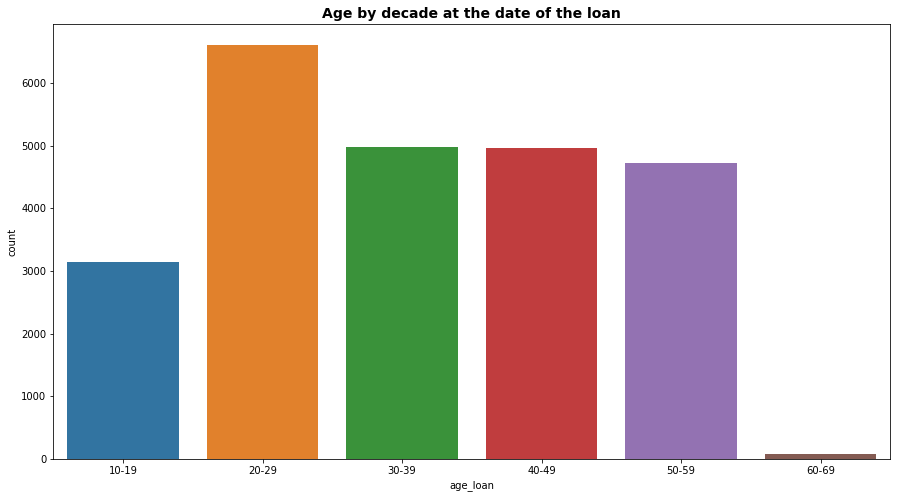

In [656]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.astype({'age_loan': str})

train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

train_data_copy = train_data_copy.sort_values('age_loan')

fig = plt.figure()
plt.figure(figsize=(15,8))
plt.title("Age by decade at the date of the loan", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax = sb.countplot(x="age_loan", data=train_data_copy)
plt.show()

Now we can see the months when the accounts were created.

In [657]:
def get_month(year):
    string = year[2:4] + "/" + year[0:2]
    return string

<Figure size 1080x720 with 0 Axes>

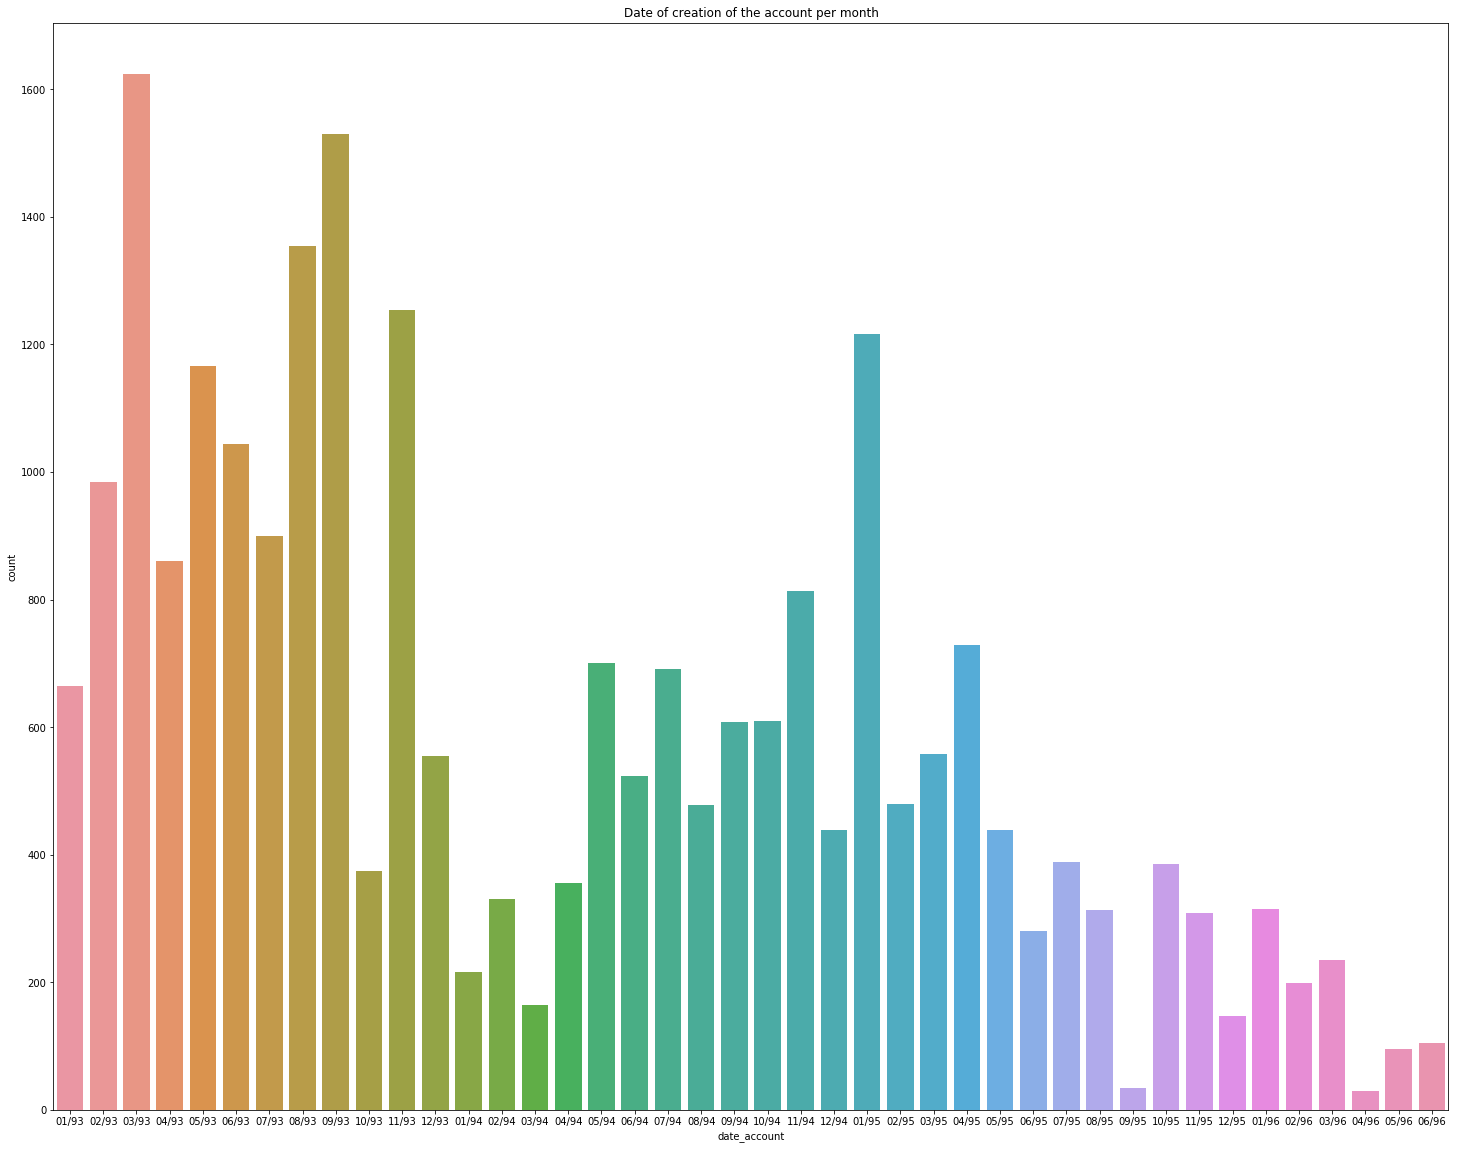

In [658]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.sort_values('date_account')
train_data_copy = train_data_copy.astype({'date_account': str})

train_data_copy['date_account'] = train_data_copy['date_account'].apply(lambda x: get_month(x[0:4]))

fig = plt.figure()
plt.figure(figsize=(25,20))
plt.title("Date of creation of the account per month")
ax = sb.countplot(x="date_account", data=train_data_copy)
plt.show()

We can also see the month and year of when the loans were created and their relation to the number of successful loans.

<Figure size 1080x720 with 0 Axes>

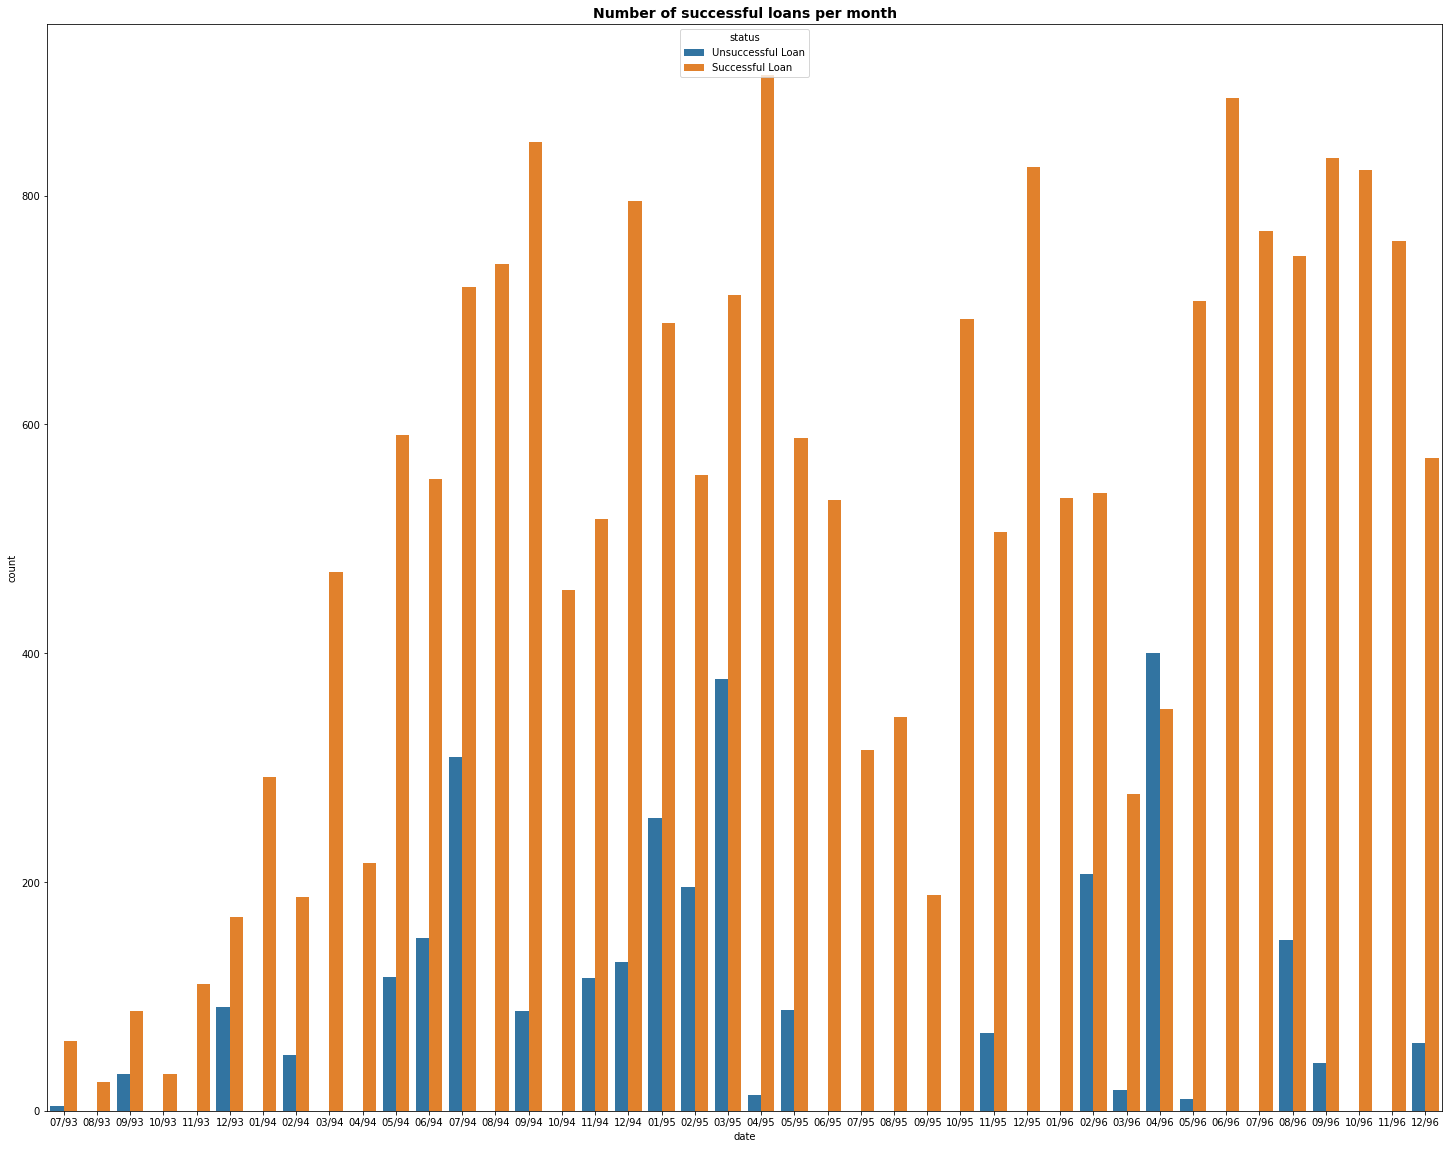

In [659]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.sort_values('date')
train_data_copy = train_data_copy.astype({'date': str})

train_data_copy['date'] = train_data_copy['date'].apply(lambda x: get_month(x[0:4]))

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

fig = plt.figure()
plt.figure(figsize=(25,20))
plt.title("Number of successful loans per month", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax = sb.countplot(x ='date', hue = "status", data = train_data_copy)
plt.show()

As follows we can see the months when the most transfers were taken.

<Figure size 1080x720 with 0 Axes>

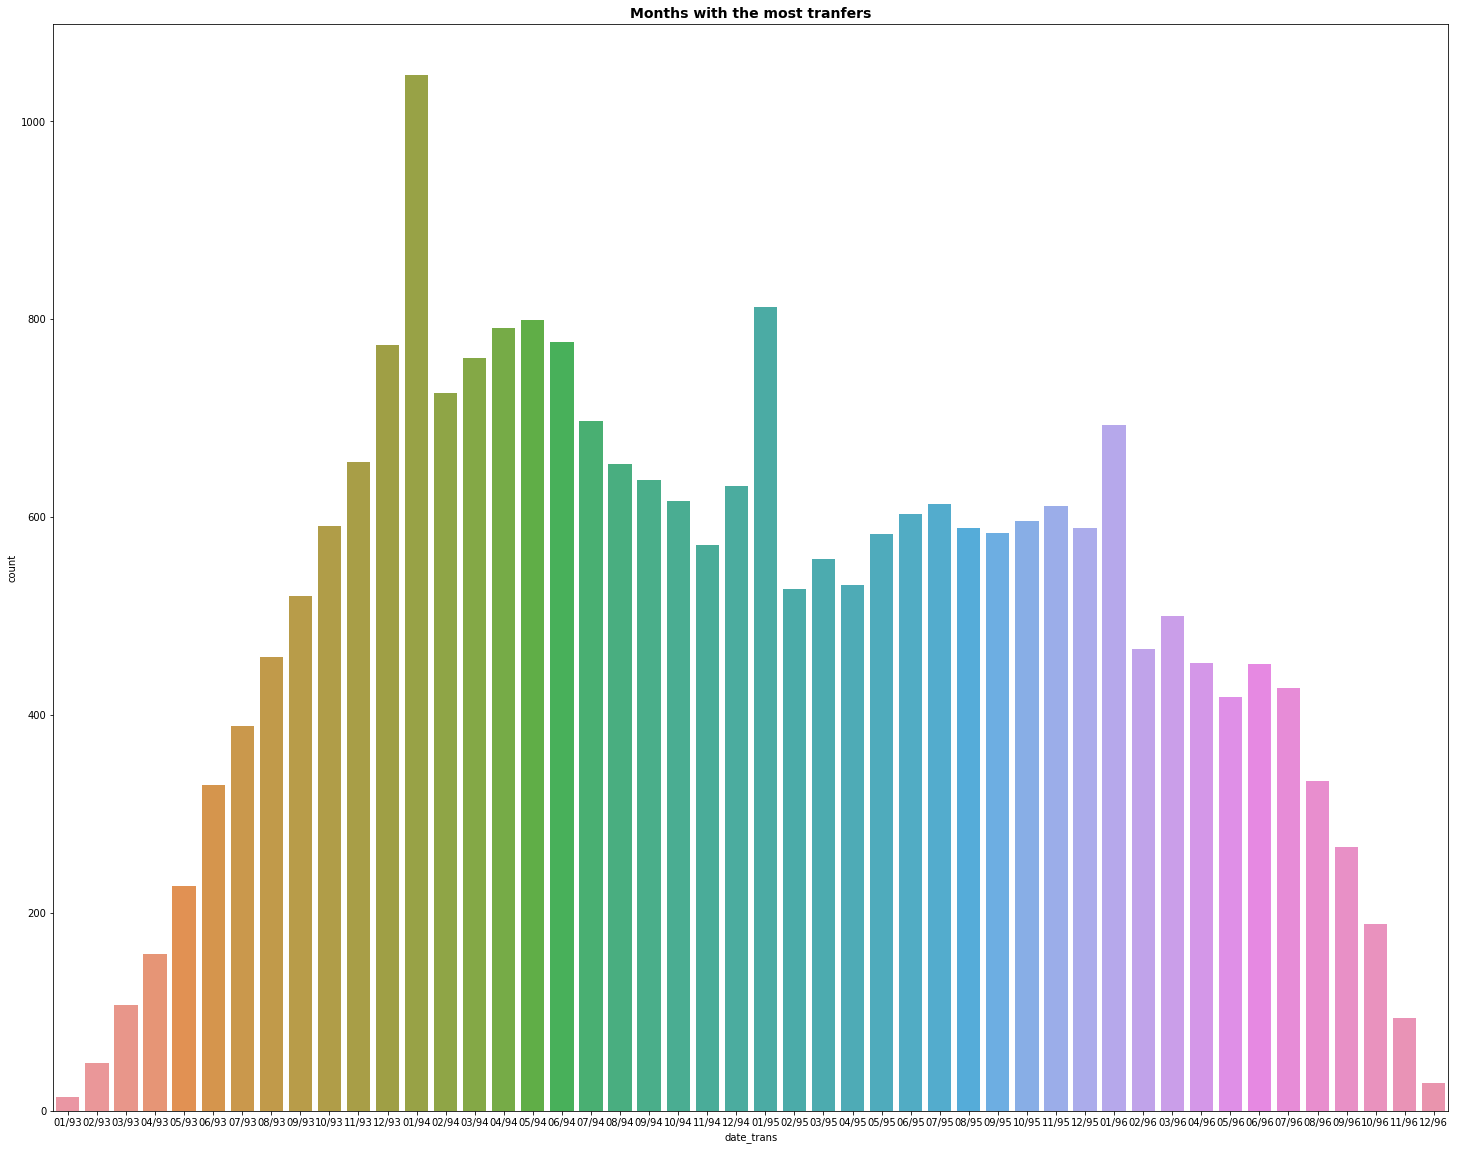

In [660]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.sort_values('date_trans')
train_data_copy = train_data_copy.astype({'date_trans': str})

train_data_copy['date_trans'] = train_data_copy['date_trans'].apply(lambda x: get_month(x[0:4]))

fig = plt.figure()
plt.figure(figsize=(25,20))
plt.title("Months with the most tranfers", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax = sb.countplot(x="date_trans", data=train_data_copy)
plt.show()

Now that we have taken all informations that we need from all dates, we can remove these columns from our dataset.

In [661]:
train_data.drop(['date', 'date_trans', 'date_account', 'birth_number'], axis=1, inplace=True)
test_data.drop(['date', 'date_trans', 'date_account', 'birth_number'], axis=1, inplace=True)

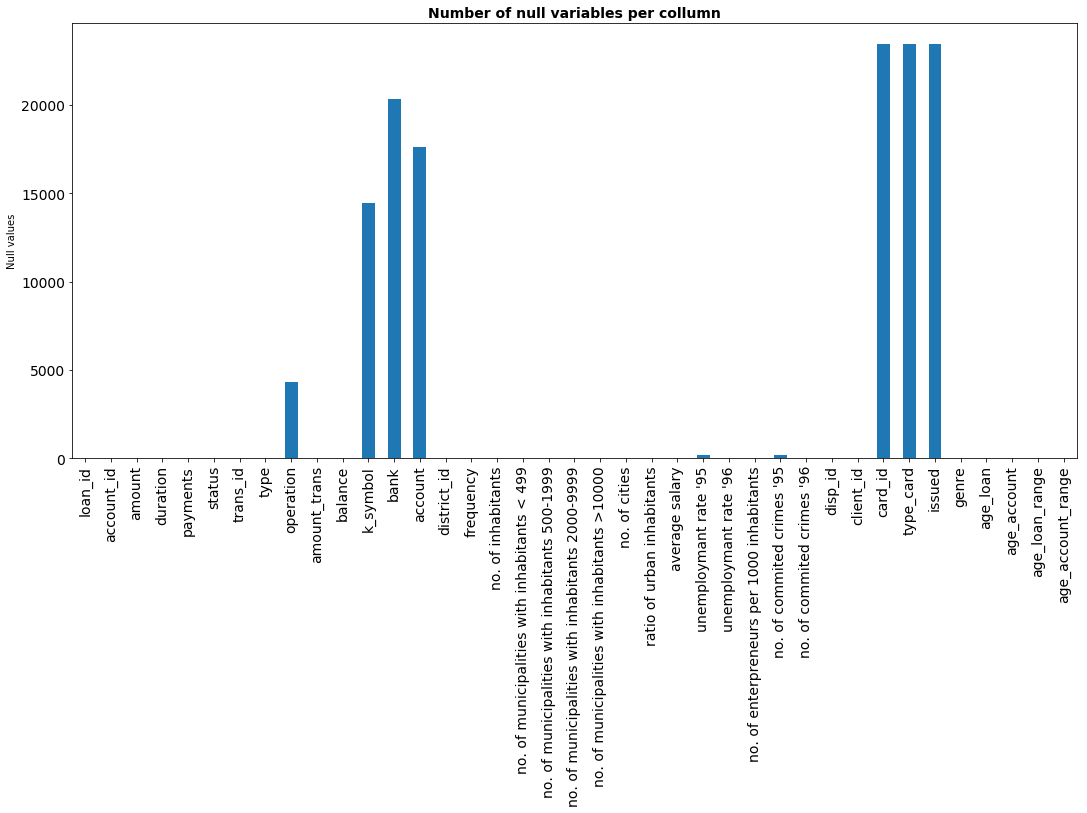

In [662]:
# Null values for each attribute
train_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Null values');

We can remove *bank* and *account* columns, as these columns only record the destination account.

In [663]:
train_data.drop(['bank', 'account'], axis=1, inplace=True)
test_data.drop(['bank', 'account'], axis=1, inplace=True)

Let's look at the possible values and the respective frequency for some columns.

In [664]:
print(train_data.operation.value_counts())
print('Null values: ' + str(train_data.operation.isnull().sum()))
print()
print(train_data.k_symbol.value_counts())
print('Null values: ' + str(train_data.k_symbol.isnull().sum()))
print()
print(train_data.type_card.value_counts())
print('Null values: ' + str(train_data.type_card.isnull().sum()))
print()
print(train_data.type.value_counts())
print('Null values: ' + str(train_data.type.isnull().sum()))
print()

withdrawal in cash              11462
credit in cash                   4506
remittance to another bank       3033
collection from another bank     1139
credit card withdrawal             23
Name: operation, dtype: int64
Null values: 4331

interest credited                        4331
payment for statement                    2528
household                                1724
                                         1001
insurrance payment                        419
sanction interest if negative balance      38
Name: k_symbol, dtype: int64
Null values: 14453

classic    862
gold        99
junior      77
Name: type_card, dtype: int64
Null values: 23456

withdrawal            13730
credit                 9976
withdrawal in cash      788
Name: type, dtype: int64
Null values: 0



In [665]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.loc[:, train_data_copy.columns.intersection(['type','operation'])]
train_data_copy["operation"] = train_data_copy["operation"].fillna('NaN')

train_data_copy.sort_values("operation")

print(train_data_copy["type"].unique())
print(train_data_copy["operation"].unique())

['credit' 'withdrawal' 'withdrawal in cash']
['credit in cash' 'NaN' 'withdrawal in cash' 'remittance to another bank'
 'collection from another bank' 'credit card withdrawal']


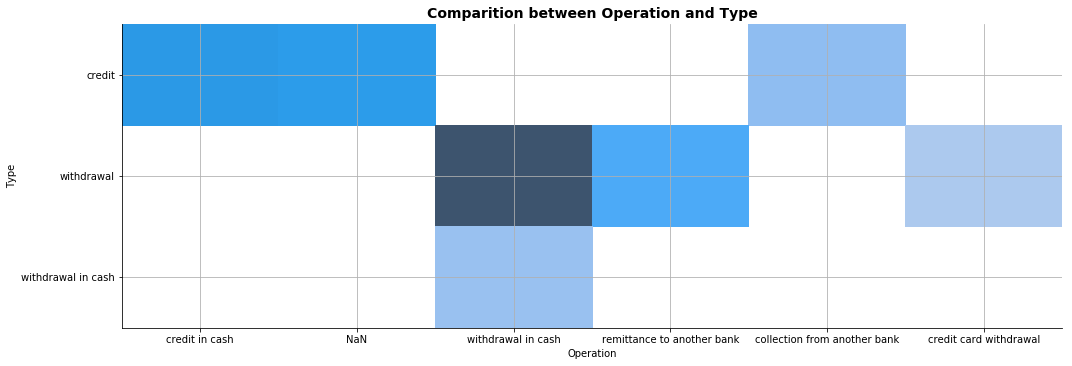

In [666]:
sb.displot(train_data_copy,x='operation', y='type', aspect=3)
plt.xlabel('Operation');
plt.ylabel('Type');
plt.title("Comparition between Operation and Type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

As we can see all the rows with operation *credit in cash* and *collection from another bank* are of type credit. All the *withdrawal in cash*, *remittance to another bank* and *credit cash withdrawal* operations are of the type *withdraw* or *withdrawal with cash* (in the case of the homonymous operation)

withdrawal in cash              11462
credit in cash                   4506
remittance to another bank       3033
collection from another bank     1139
credit card withdrawal             23
Name: operation, dtype: int64
k_symbol                               operation                 
                                       remittance to another bank    1001
household                              remittance to another bank    1613
                                       withdrawal in cash             111
insurrance payment                     remittance to another bank     419
payment for statement                  withdrawal in cash            2528
sanction interest if negative balance  withdrawal in cash              38
Name: operation, dtype: int64


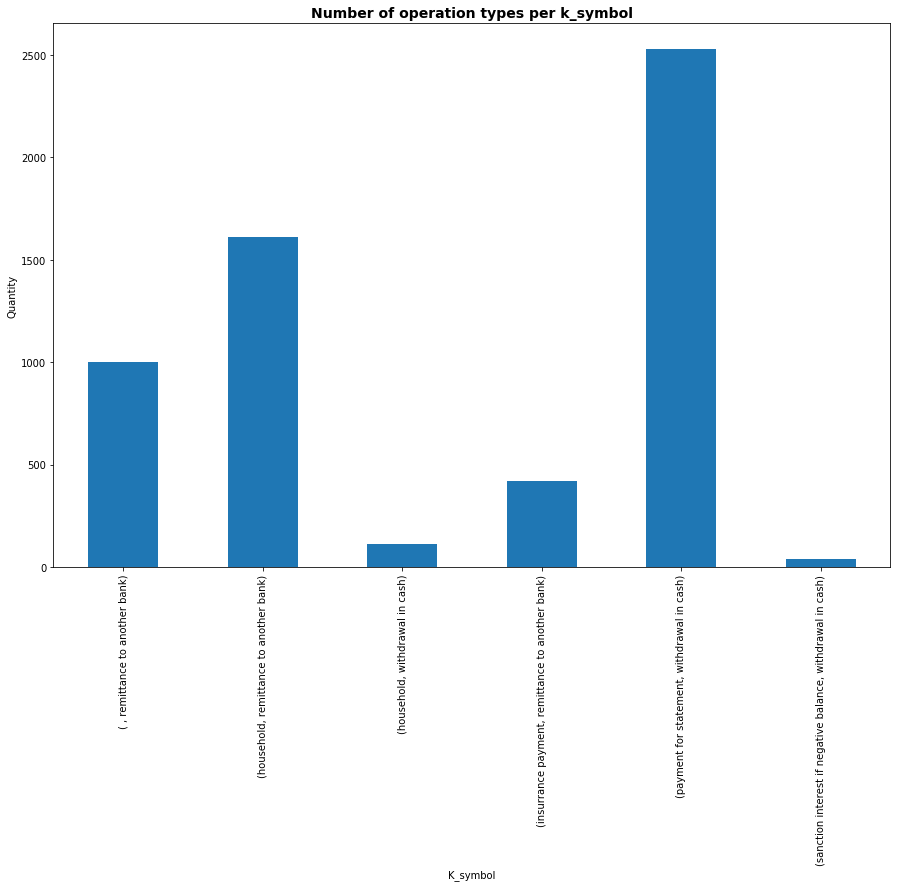

In [667]:
train_data_copy = train_data.copy()
print(train_data_copy.operation.value_counts())
train_data_copy = train_data_copy.groupby(['k_symbol', 'operation'])['operation'].count()
print(train_data_copy)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.xlabel('K_symbol');
plt.ylabel('Quantity');
plt.title("Number of operation types per k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

<Figure size 1080x720 with 0 Axes>

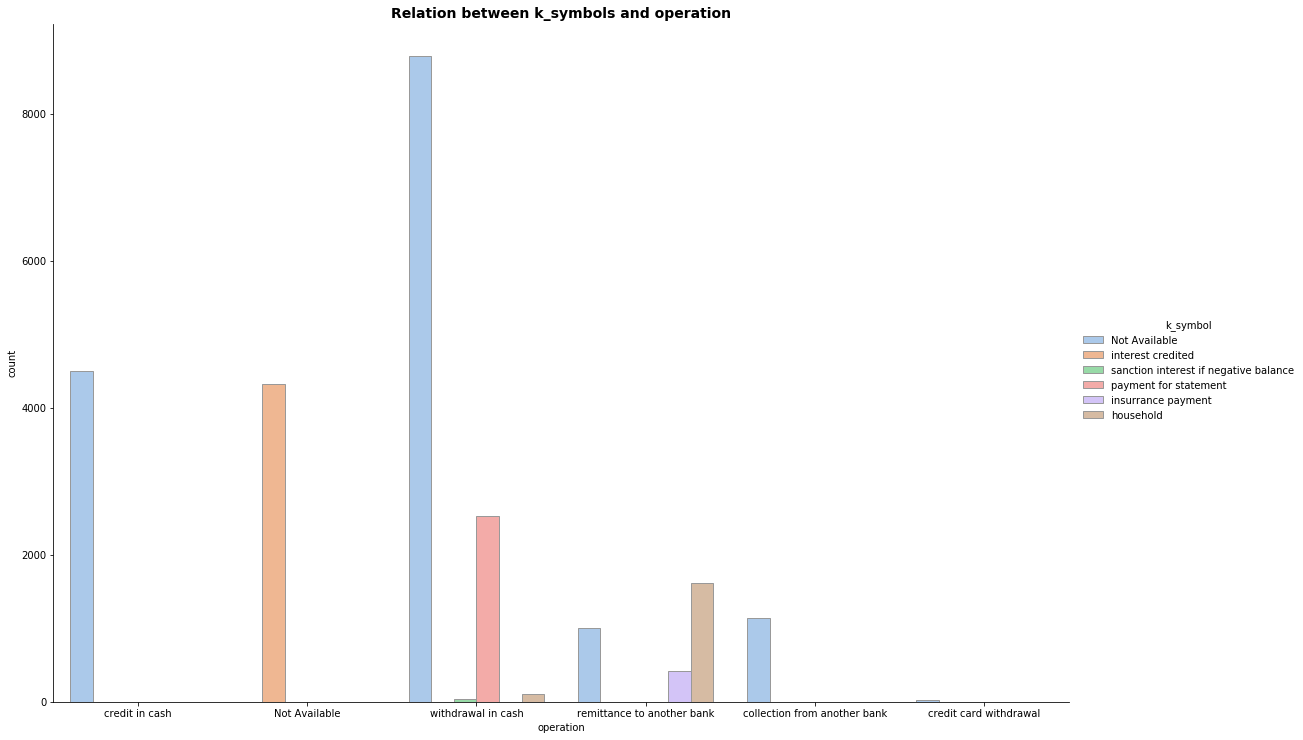

In [668]:
train_data_copy = train_data.copy()
train_data_copy["operation"]=train_data_copy["operation"].fillna("Not Available")
train_data_copy["k_symbol"]=train_data_copy["k_symbol"].fillna("Not Available")
train_data_copy['k_symbol'] = train_data_copy['k_symbol'].replace([' '],['Not Available'])
train_data_copy['operation'] = train_data_copy['operation'].replace([''],['Not Available'])

fig = plt.figure()

sb.catplot(x="operation", hue="k_symbol", kind="count",
            palette="pastel", edgecolor=".6",
            data=train_data_copy, height=10, aspect=1.5)
plt.title('Relation between k_symbols and operation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylim(0)
plt.rcParams['figure.figsize']=(20,10)
plt.show()


As we can see the great majority of the k_symbol types are directly related to a certain operation type

Looking for **type** column, let's convert all *withdrawal in cash* occurrences into *withdrawal*, as it is basically the same. 

In [669]:
train_data.loc[train_data['type'] == "withdrawal in cash", 'type'] = "withdrawal"
test_data.loc[test_data['type'] == "withdrawal in cash", 'type'] = "withdrawal"

Now, looking at *operation* and *k_symbol* columns, let's select all rows that have null value in *operation* and look at the respective value in *k_symbol* value.

In [670]:
operations_null = train_data[train_data['operation'].isnull()]
operations_null.k_symbol.value_counts()

interest credited    4331
Name: k_symbol, dtype: int64

All rows that have **operation** column with null value have *interested credited* in *k_symbol* column. We can try to replace the null values of *operation* column with the value that is in *k_symbol* column and then delete *k_symbol* parameter.

In [671]:
train_data.loc[train_data['operation'].isna(), 'operation'] = train_data.loc[train_data['operation'].isna(), 'k_symbol']
test_data.loc[test_data['operation'].isna(), 'operation'] = test_data.loc[test_data['operation'].isna(), 'k_symbol']

train_data.drop(['k_symbol'], axis=1, inplace=True)
test_data.drop(['k_symbol'], axis=1, inplace=True)

In [672]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24494 entries, 0 to 24493
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           24494 non-null  float64
 1   account_id                                        24494 non-null  float64
 2   amount                                            24494 non-null  float64
 3   duration                                          24494 non-null  float64
 4   payments                                          24494 non-null  float64
 5   status                                            24494 non-null  float64
 6   trans_id                                          24494 non-null  float64
 7   type                                              24494 non-null  object 
 8   operation                                         24494 non-null  object 
 9   amount_trans     

Representation of the Card Type, with NaN values

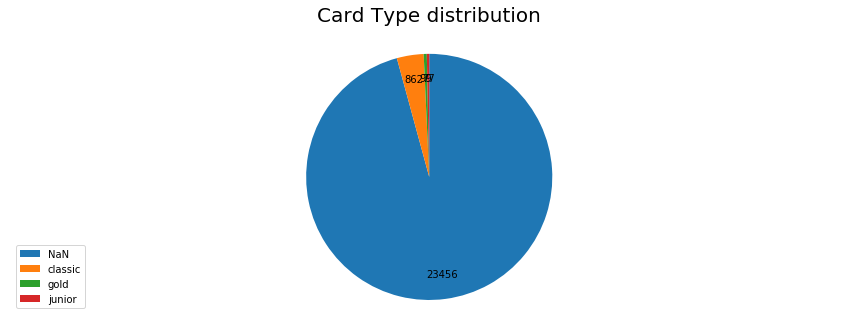

In [673]:
train_data_copy = train_data.copy()

train_data_copy['type_card'] = train_data_copy['type_card'].fillna("NaN")

ser = train_data_copy.groupby('type_card')['type_card'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1,2,3]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=['','','',''], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend(loc=3, labels=ser.index)
plt.axis('equal')
plt.title('Card Type distribution', y=1.05, fontsize=20)
fig.set_size_inches(15, 5)

Representation of the Card Type, without NaN values

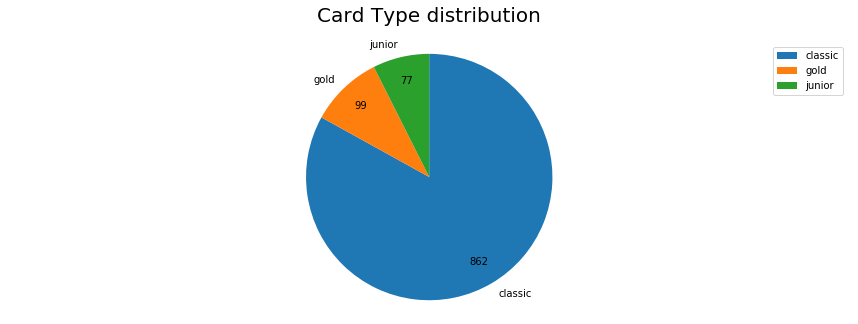

In [674]:
train_data_copy = train_data.copy()

ser = train_data_copy.groupby('type_card')['type_card'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1,2]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend()
plt.axis('equal')
plt.title('Card Type distribution', y=1.05, fontsize=20)
fig.set_size_inches(15, 5)

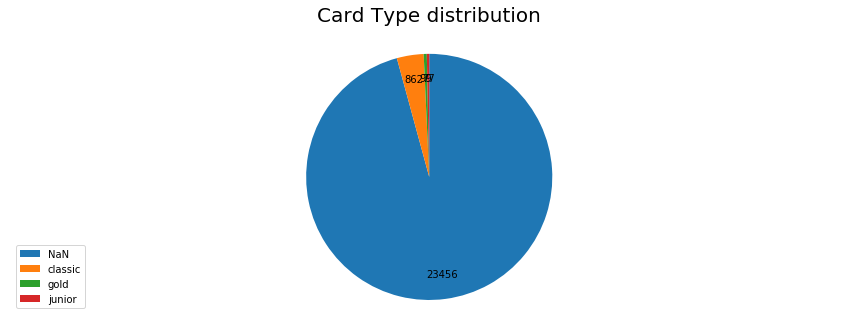

In [675]:
train_data_copy = train_data.copy()

train_data_copy['type_card'] = train_data_copy['type_card'].fillna("NaN")

ser = train_data_copy.groupby('type_card')['type_card'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1,2,3]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=['','','',''], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend(loc=3, labels=ser.index)
plt.axis('equal')
plt.title('Card Type distribution', y=1.05, fontsize=20)
fig.set_size_inches(15, 5)

[back](#index)
#### District Data <a id="district-data"></a>

In [676]:
print_districtplot=False
if print_districtplot:
    district_scatter_plot = sb.PairGrid(district_data)
    district_scatter_plot.map(plt.scatter)

In [677]:
print('Null values unemploymant rate in \'95:' + str(district_data['unemploymant rate \'95'].isnull().sum()))
print()
print('Null values no. of commited crimes \'95 :' + str(district_data['no. of commited crimes \'95'].isnull().sum()))
print()

Null values unemploymant rate in '95:1

Null values no. of commited crimes '95 :1



(array([ 4., 13., 10., 13., 15.,  5.,  6.,  4.,  4.,  2.]),
 array([0.29 , 0.995, 1.7  , 2.405, 3.11 , 3.815, 4.52 , 5.225, 5.93 ,
        6.635, 7.34 ]),
 <a list of 10 Patch objects>)

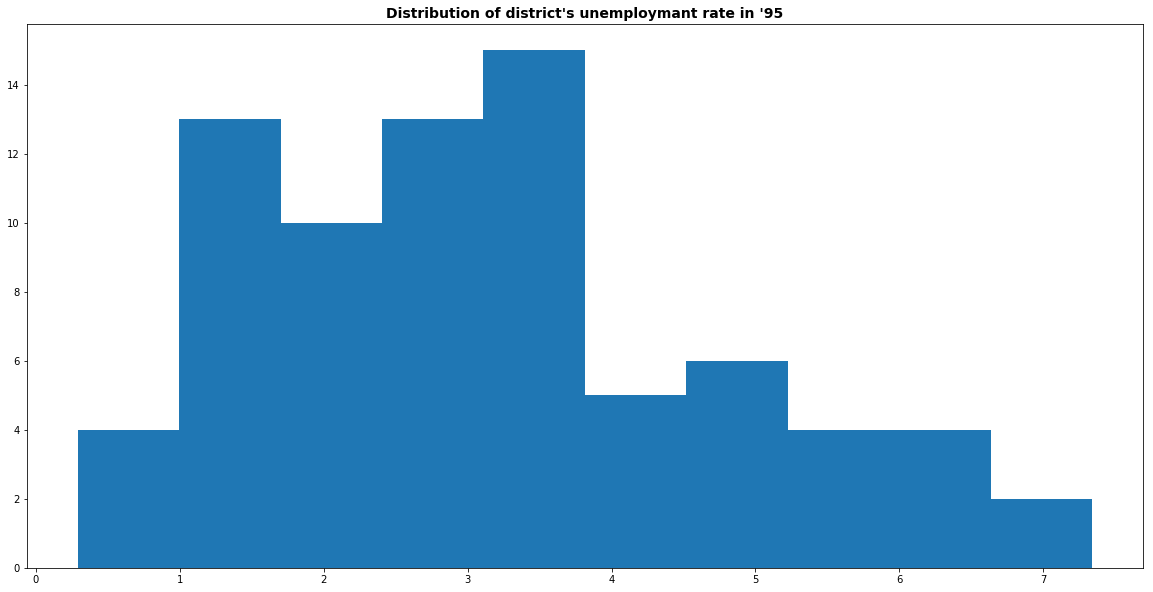

In [678]:
plt.figure(figsize=(20,10))
plt.title('Distribution of district\'s unemploymant rate in \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.hist(district_data['unemploymant rate \'95'])

Representation of the Card Type, without NaN values

(array([71.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  818. ,  9303.9, 17789.8, 26275.7, 34761.6, 43247.5, 51733.4,
        60219.3, 68705.2, 77191.1, 85677. ]),
 <a list of 10 Patch objects>)

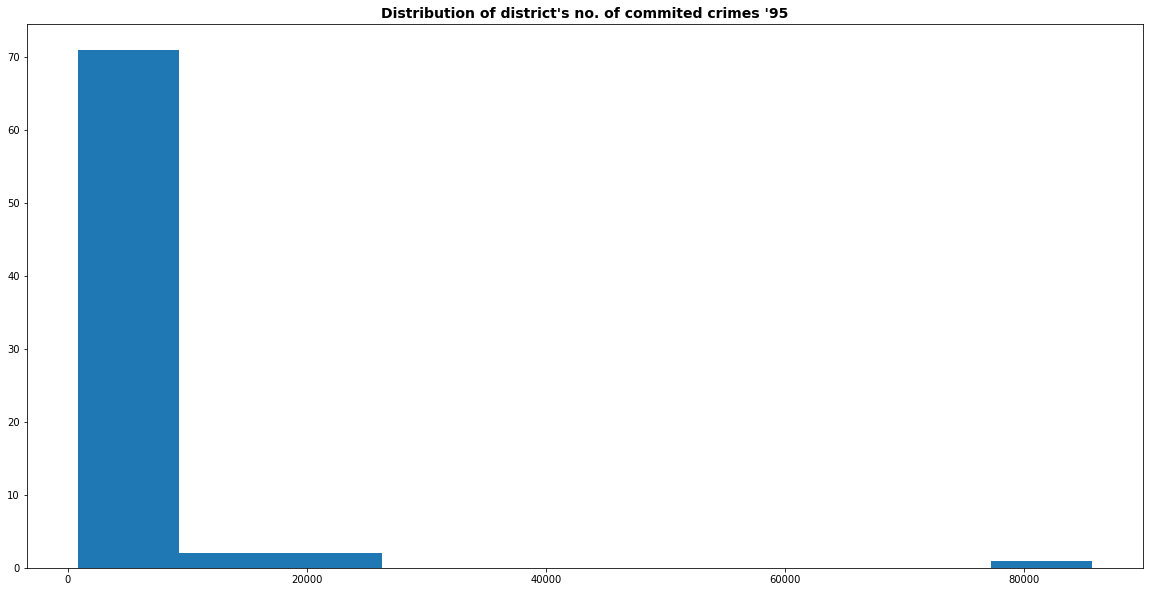

In [679]:
plt.figure(figsize=(20,10))
plt.title('Distribution of district\'s no. of commited crimes \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.hist(district_data['no. of commited crimes \'95'])

In [680]:
# Fill null values in district's unemploymant rate in '95 and district's no. of commited crimes '95
# See if it is better to use median or mean 

train_data['unemploymant rate \'95'].fillna(train_data['unemploymant rate \'95'].median(), inplace=True)

train_data['no. of commited crimes \'95'].fillna(train_data['no. of commited crimes \'95'].mean(), inplace=True)

test_data['unemploymant rate \'95'].fillna(test_data['unemploymant rate \'95'].median(), inplace=True)

test_data['no. of commited crimes \'95'].fillna(test_data['no. of commited crimes \'95'].mean(), inplace=True)

train_data_no_dummies = train_data.copy()

[back](#index)
#### Dataset Managing <a id="dataset"></a>

In [681]:
# needs to be checked
option = 4
if option == 0:
    train_data.drop(['issued'], axis=1, inplace=True)
    test_data.drop(['issued'], axis=1, inplace=True)
if option == 1:
    train_data.drop(['operation', 'issued'], axis=1, inplace=True)
    test_data.drop(['operation', 'issued'], axis=1, inplace=True)
# dropped type and issued
elif option == 2:
    train_data.drop(['issued', 'type'], axis=1, inplace=True)
    test_data.drop(['issued', 'type'], axis=1, inplace=True)
#doesn't work
elif option == 4:
    train_data.drop(["card_id","type_card", "issued","client_id", "disp_id"],axis=1,inplace=True)
    test_data.drop(["card_id","type_card", "issued","client_id", "disp_id"],axis=1,inplace=True)
    columns = train_data.columns.values.tolist()
    columns.remove("trans_id")
    columns.remove("amount_trans")
    columns.remove("balance")
    columns.remove("operation")
    columns.remove("type")   
    columns.remove("age_account")  
    
    train_data=train_data.groupby(columns, as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest],
        "amount_trans": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit, cov_withdrawal, cov_credit]
        
    })
    
    test_data=test_data.groupby(columns, as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest],
        "amount_trans": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit, cov_withdrawal, cov_credit]
        
    })
    train_data.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in train_data.columns]
    test_data.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in test_data.columns]
    
    


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning:

divide by zero encountered in true_divide

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning:

invalid value encountered in multiply

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Ana

In [682]:
train_data = pd.get_dummies(train_data, columns=['frequency'], dtype=bool)
test_data = pd.get_dummies(test_data, columns=['frequency'], dtype=bool)

if option != 4:
    train_data = pd.get_dummies(train_data, columns=['type_card'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['type_card'], dtype = bool)
    
train_data = pd.get_dummies(train_data, columns=['age_loan_range'], dtype = bool)
test_data = pd.get_dummies(test_data, columns=['age_loan_range'], dtype = bool)

train_data = pd.get_dummies(train_data, columns=['age_account_range'], dtype = bool)
test_data = pd.get_dummies(test_data, columns=['age_account_range'], dtype = bool)

if (option != 2 and option != 4):
    train_data = pd.get_dummies(train_data, columns=['type'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['type'], dtype = bool)

if( option != 1 and option != 4) :
    train_data = pd.get_dummies(train_data, columns=['operation'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['operation'], dtype = bool)

test_data = test_data.drop_duplicates(subset=['loan_id'], keep='first')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 84 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           543 non-null    float64
 1   account_id                                        543 non-null    float64
 2   amount                                            543 non-null    float64
 3   duration                                          543 non-null    float64
 4   payments                                          543 non-null    float64
 5   status                                            543 non-null    float64
 6   district_id                                       543 non-null    float64
 7   no. of inhabitants                                543 non-null    float64
 8   no. of municipalities with inhabitants < 499      543 non-null    float64
 9   no. of municipalities

In [683]:
train_data.head()

loan_id  account_id    amount  duration  payments  status  district_id  \
0   4959.0         2.0   80952.0      24.0    3373.0     1.0          1.0   
1   4959.0         2.0   80952.0      24.0    3373.0     1.0          1.0   
2   4961.0        19.0   30276.0      12.0    2523.0    -1.0         21.0   
3   4961.0        19.0   30276.0      12.0    2523.0    -1.0         21.0   
4   4973.0        67.0  165960.0      24.0    6915.0     1.0         16.0   

   no. of inhabitants  no. of municipalities with inhabitants < 499  \
0           1204953.0                                           0.0   
1           1204953.0                                           0.0   
2            103347.0                                          87.0   
3            103347.0                                          87.0   
4             93931.0                                          74.0   

   no. of municipalities with inhabitants 500-1999  ...  age_loan_range_30-39  \
0                                              0.0  ...                 False   
1                                              0.0  ...                 False   
2                                             16.0  ...                 False   
3                                             16.0  ...                 False   
4                                             21.0  ...                 False   

   age_loan_range_40-49  age_loan_range_50-59  age_loan_range_60-69  \
0                  True                 False                 False   
1                  True                 False                 False   
2                 False                  True                 False   
3                 False                  True                 False   
4                 False                  True                 False   

   age_account_range_10-19  age_account_range_20-29  age_account_range_30-39  \
0                    False                     True                    False   
1                    False                    False                    False   
2                    False                     True                    False   
3                    False                    False                     True   
4                    False                     True                    False   

   age_account_range_40-49  age_account_range_50-59  age_account_range_60-69  
0                    False                    False                    False  
1                     True                    False                    False  
2                    False                    False                    False  
3                    False                    False                    False  
4                    False                    False                    False  

[5 rows x 84 columns]

In [684]:
competition_inputs = test_data.drop(columns=["loan_id", "status"])
# test_data = test_data.drop(columns=["status"])
all_ids_comp = test_data['loan_id'].values

#### [back](#index)
#### Data Exploration <a class="anchor" id="data-exploration"></a>

After the previous changes we end up with the following columns to study

In [685]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 69 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           0 non-null      int64  
 1   account_id                                        0 non-null      int64  
 2   amount                                            0 non-null      int64  
 3   duration                                          0 non-null      int64  
 4   payments                                          0 non-null      int64  
 5   status                                            0 non-null      float64
 6   district_id                                       0 non-null      int64  
 7   no. of inhabitants                                0 non-null      int64  
 8   no. of municipalities with inhabitants < 499      0 non-null      int64  
 9   no. of municipalities with inhabi

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



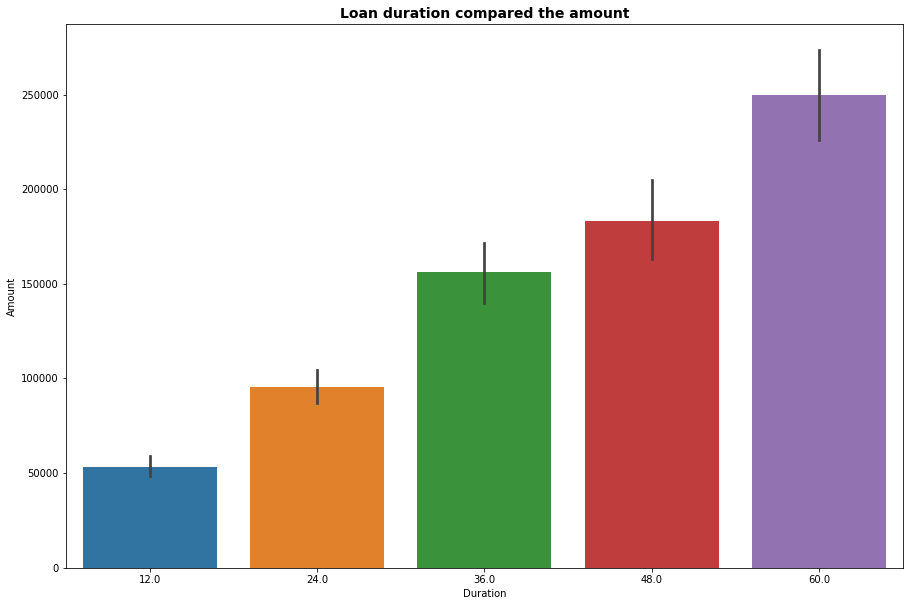

In [686]:
plt.figure(figsize=(15,10))
ax = sb.barplot(train_data["duration"], train_data["amount"])
plt.xlabel('Duration');
plt.ylabel('Amount');
plt.title('Loan duration compared the amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

We can clearly see that with bigger loan amounts the time taken to repay them is exponentially higher 

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



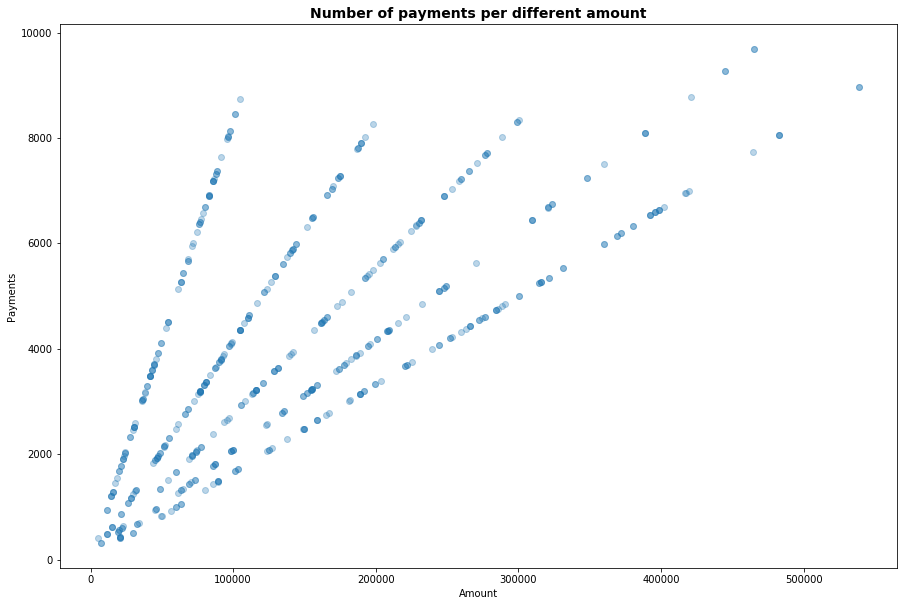

In [687]:
plt.rcParams["figure.figsize"] = (15,10)
ax = plt.plot(train_data["amount"], train_data["payments"], linestyle='none', marker='o', alpha=0.3)
plt.title('Number of payments per different amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Amount');
plt.ylabel('Payments');
plt.show()

As we can check by the values in the graph, it seems that the number of payments is defined by the bank since the results are very linear and follow a line according to the amount loaned

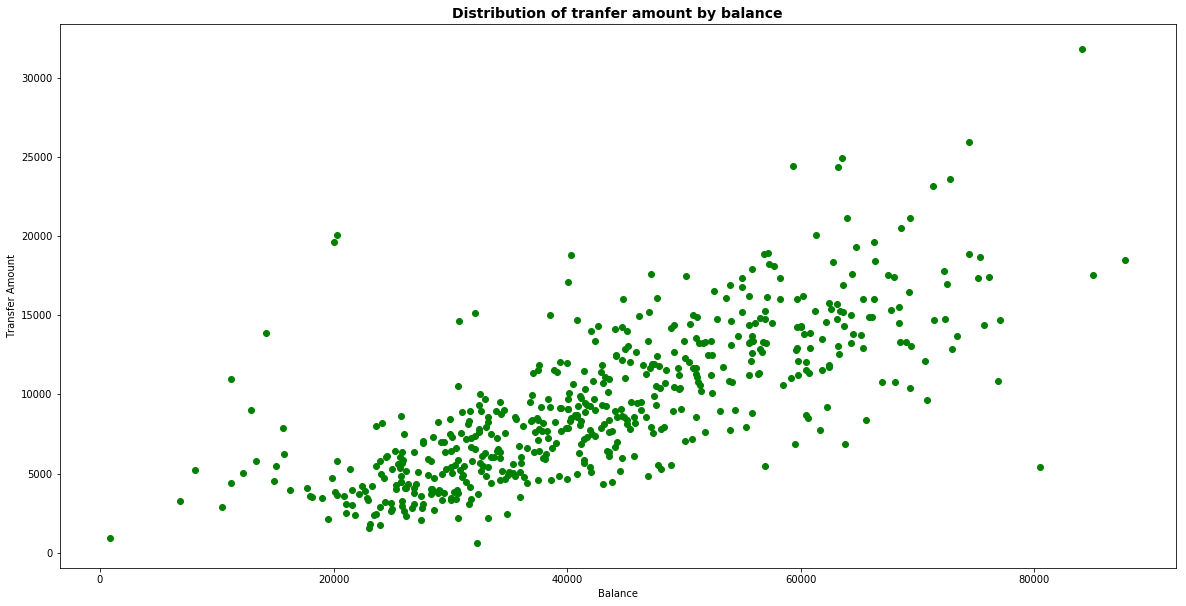

In [688]:
plt.figure(figsize=(20,10))
#ax = sb.barplot(train_data["amount_trans"], train_data["balance"])
plt.plot(train_data["balance_mean"],train_data["amount_trans_mean"], 'o', color='green');
plt.title('Distribution of tranfer amount by balance', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Transfer Amount');
plt.xlabel('Balance');
plt.show()

As we can see as the balance increases the transfer amount also increase and is rarely higher than the balance. It can also be seen that a straight continous line exists with gradient 1. This means the amount of some transfers are actually correspondent, or close, to the total amount in the account.

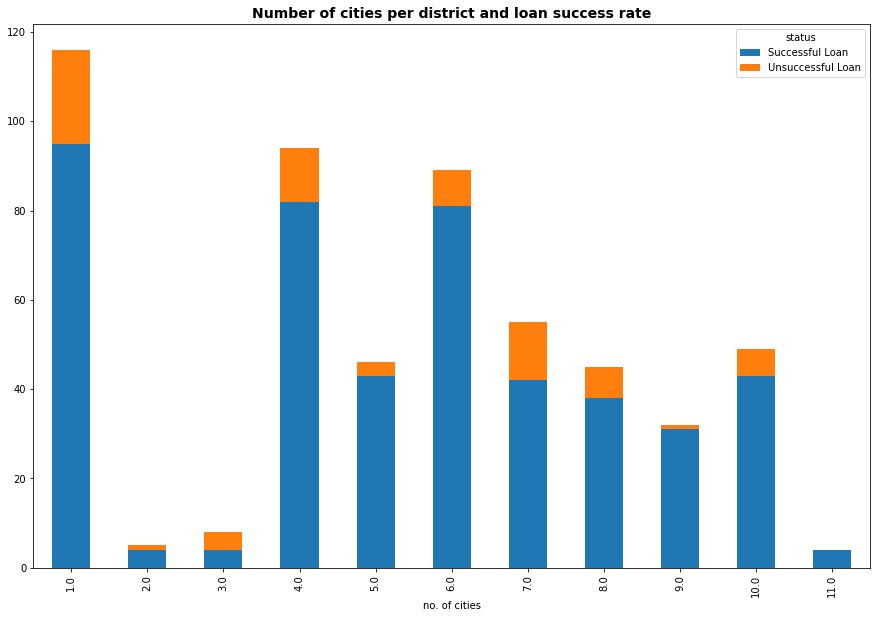

In [689]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

train_data_copy = train_data_copy.groupby(['no. of cities', 'status'])['status'].count().unstack().fillna(0)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.title("Number of cities per district and loan success rate", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

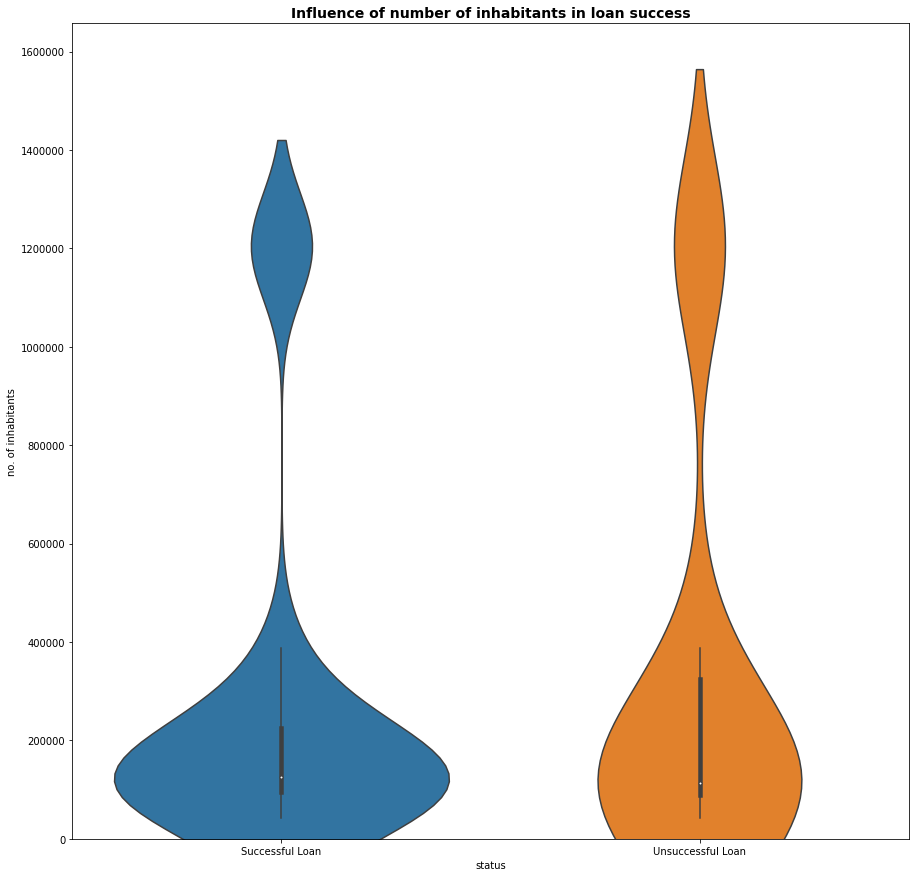

In [690]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

fig = plt.figure()
sb.violinplot(y=train_data_copy["no. of inhabitants"], x=train_data_copy["status"])
plt.title('Influence of number of inhabitants in loan success', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylim(0)
fig.set_size_inches(15, 15)
plt.show()

In [691]:
#print(sorted(train_data["no. of inhabitants"]))

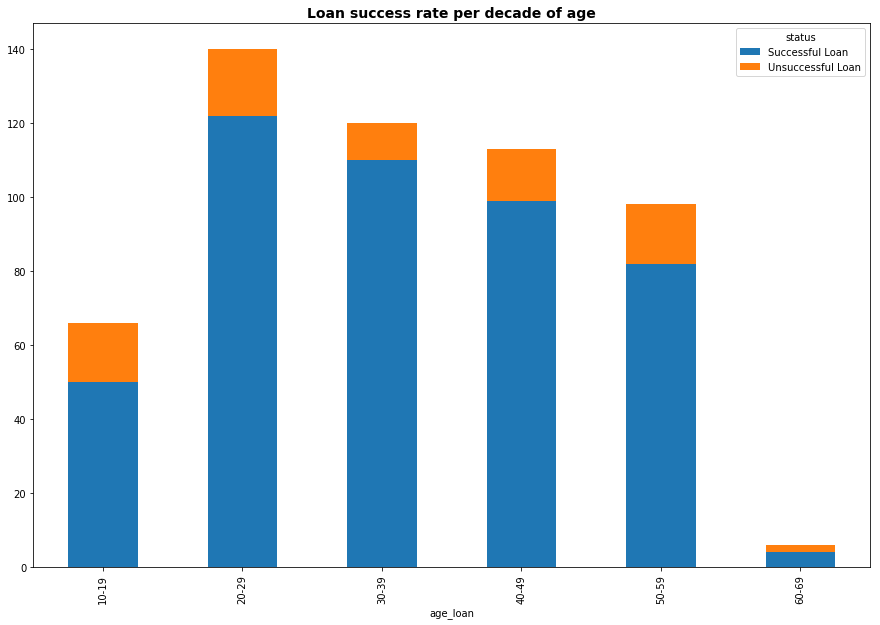

In [692]:
train_data_copy = train_data.copy()

train_data_copy = train_data.copy()
train_data_copy = train_data_copy.astype({'age_loan': str})

train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

train_data_copy = train_data_copy.groupby(['age_loan', 'status'])['status'].count().unstack().fillna(0)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.title("Loan success rate per decade of age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

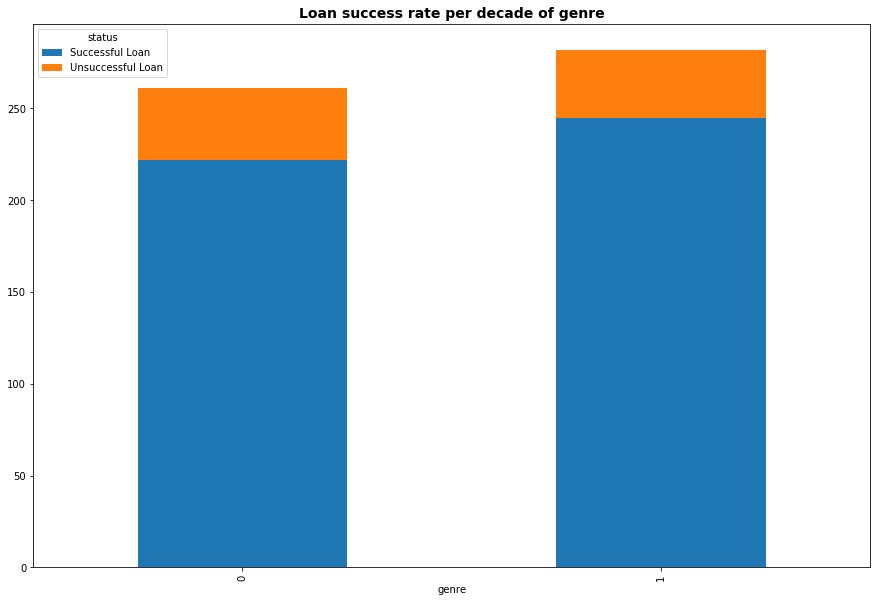

In [693]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

train_data_copy = train_data_copy.groupby(['genre', 'status'])['status'].count().unstack().fillna(0)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.title("Loan success rate per decade of genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



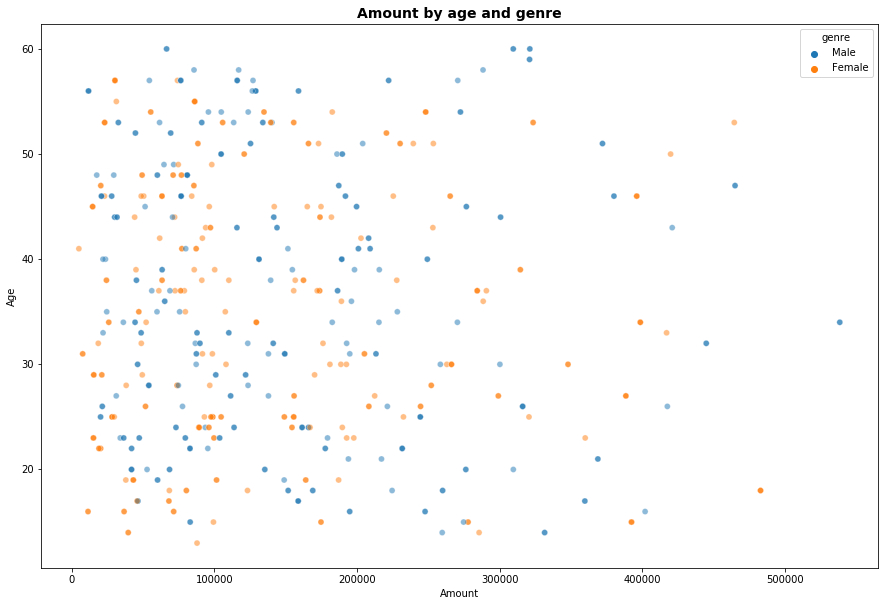

In [694]:
plt.figure(figsize=(15,10))

train_data_names = train_data.copy()
train_data_names["genre"] = train_data_names["genre"].astype(str)
train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

sb.scatterplot(train_data_names["amount"],train_data_names["age_loan"],train_data_names["genre"], alpha=0.5, sizes=(10, 1000), hue="time")
plt.xlabel("Amount")
plt.ylabel("Age")
plt.title("Amount by age and genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

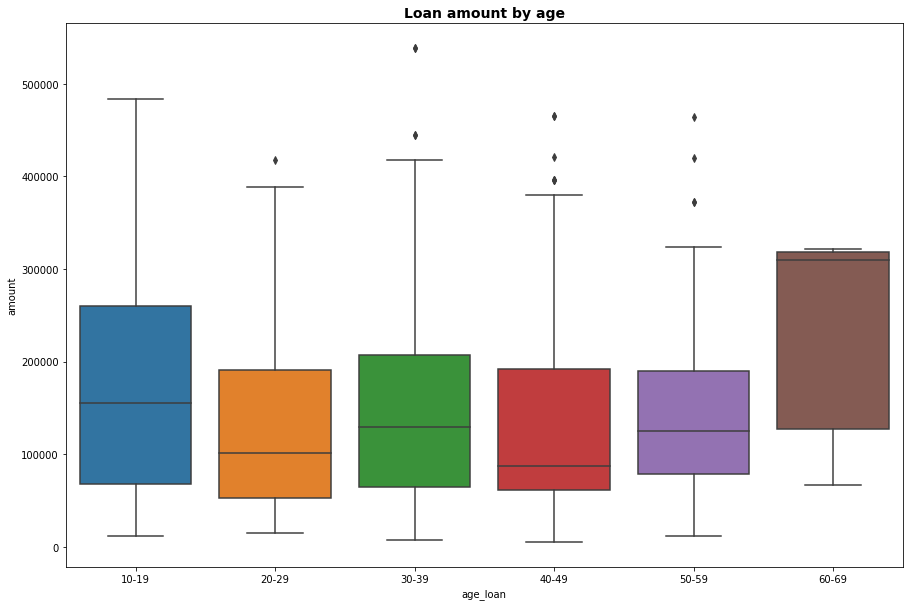

In [695]:
train_data_names = train_data.copy()

train_data_names = train_data_names.astype({'age_loan': str})

train_data_names['age_loan'] = train_data_names['age_loan'].apply(lambda x: get_decade(x))

train_data_names = train_data_names.sort_values('age_loan')

plt.figure(figsize=(15,10))

sb.boxplot(x=train_data_names["age_loan"], y=train_data_names["amount"])
plt.title("Loan amount by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [696]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 84 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           543 non-null    float64
 1   account_id                                        543 non-null    float64
 2   amount                                            543 non-null    float64
 3   duration                                          543 non-null    float64
 4   payments                                          543 non-null    float64
 5   status                                            543 non-null    float64
 6   district_id                                       543 non-null    float64
 7   no. of inhabitants                                543 non-null    float64
 8   no. of municipalities with inhabitants < 499      543 non-null    float64
 9   no. of municipalities

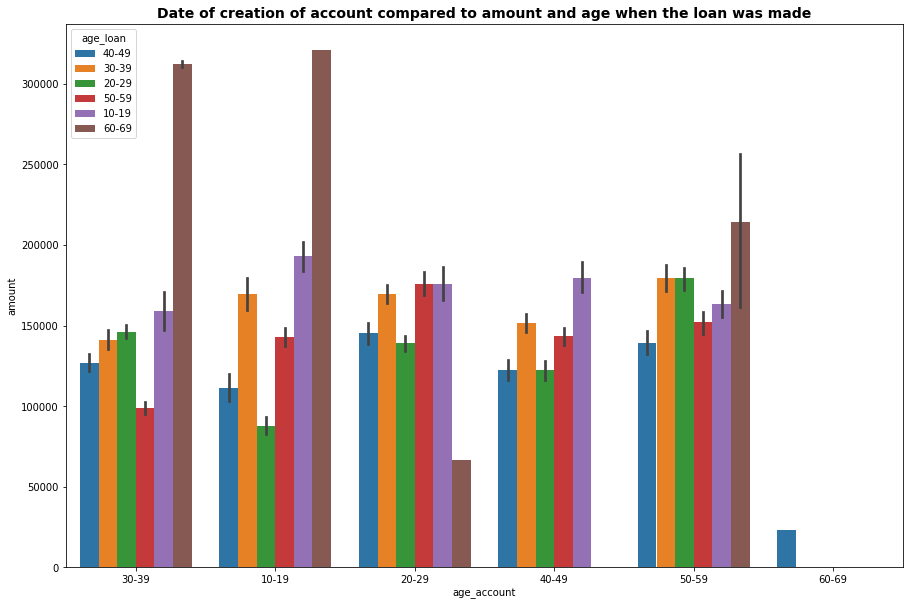

In [697]:
train_data_ages = train_data_no_dummies.copy()

train_data_ages = train_data_ages.astype({'age_loan': str})

train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

train_data_ages = train_data_ages.astype({'age_account': str})

train_data_ages['age_account'] = train_data_ages['age_account'].apply(lambda x: get_decade(x))

train_data_names = train_data_ages.sort_values('age_loan')
sb.barplot(x='age_account', y='amount', hue='age_loan', data=train_data_ages, saturation=0.8)
plt.title("Date of creation of account compared to amount and age when the loan was made", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

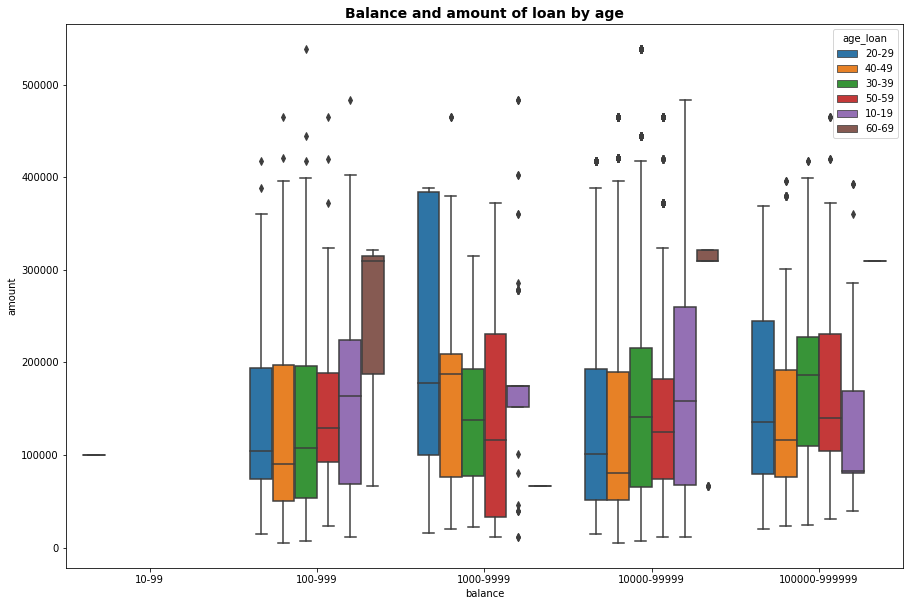

In [698]:
train_data_ages = train_data_no_dummies.copy()

train_data_ages = train_data_ages.astype({'age_loan': str})

train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

train_data_balance = train_data_ages.astype({'balance': str})

train_data_balance['balance'] = train_data_balance['balance'].apply(lambda x: get_balance(x))

train_data_balance = train_data_balance.sort_values('balance')
sb.boxplot(x='balance', y='amount', hue='age_loan', data=train_data_balance, saturation=0.8)
plt.title("Balance and amount of loan by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



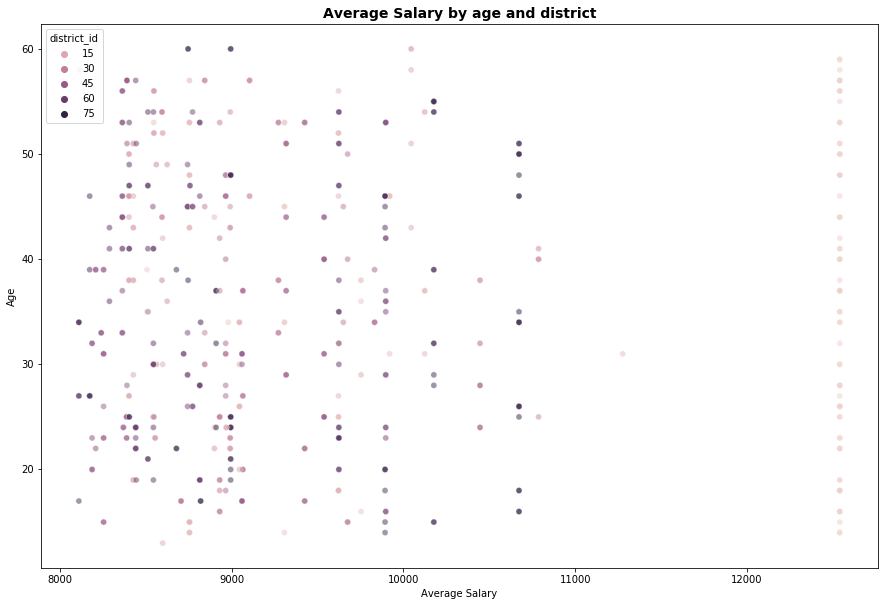

In [699]:
plt.figure(figsize=(15,10))

train_data_names = train_data.copy()
train_data_names["genre"] = train_data_names["genre"].astype(str)
train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

sb.scatterplot(train_data_names["average salary"],train_data_names["age_loan"],train_data_names["district_id"], alpha=0.5, sizes=(10, 1000), hue="time")
plt.xlabel("Average Salary")
plt.ylabel("Age")
plt.title("Average Salary by age and district", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

As follows we can see the average salary by age

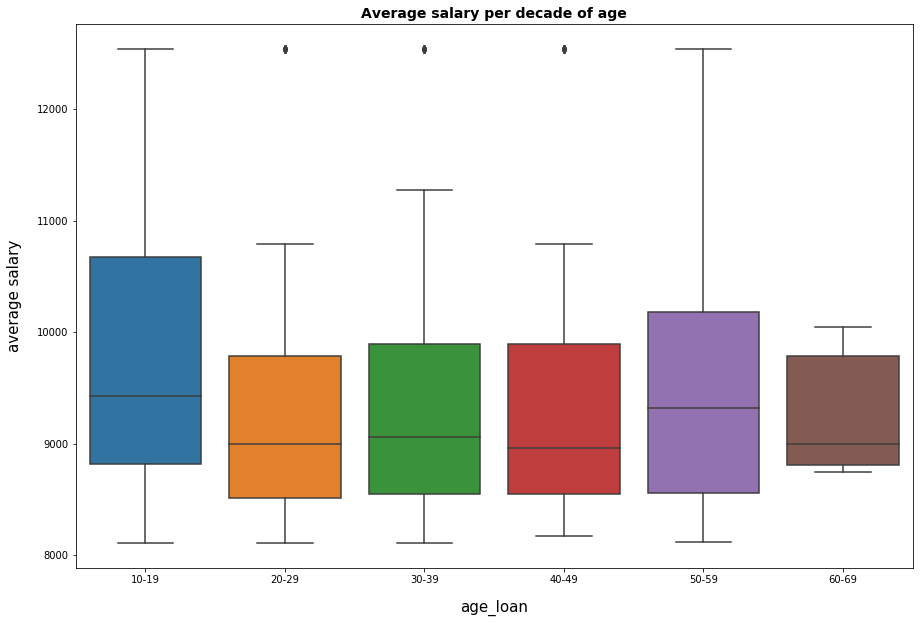

In [700]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.astype({'age_loan': str})

train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

train_data_copy = train_data_copy.sort_values('age_loan')
train_data_copy["average salary"] = train_data_copy["average salary"].astype(float)

fig = plt.figure()
sb.boxplot(x=train_data_copy["age_loan"], y=train_data_copy["average salary"])
plt.xlabel('age_loan', y=1.05, fontsize=15, labelpad=15)
plt.ylabel('average salary', x=0.7, fontsize=15, labelpad=15)
plt.title('Average salary per decade of age', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.set_size_inches(15, 10)
plt.show()

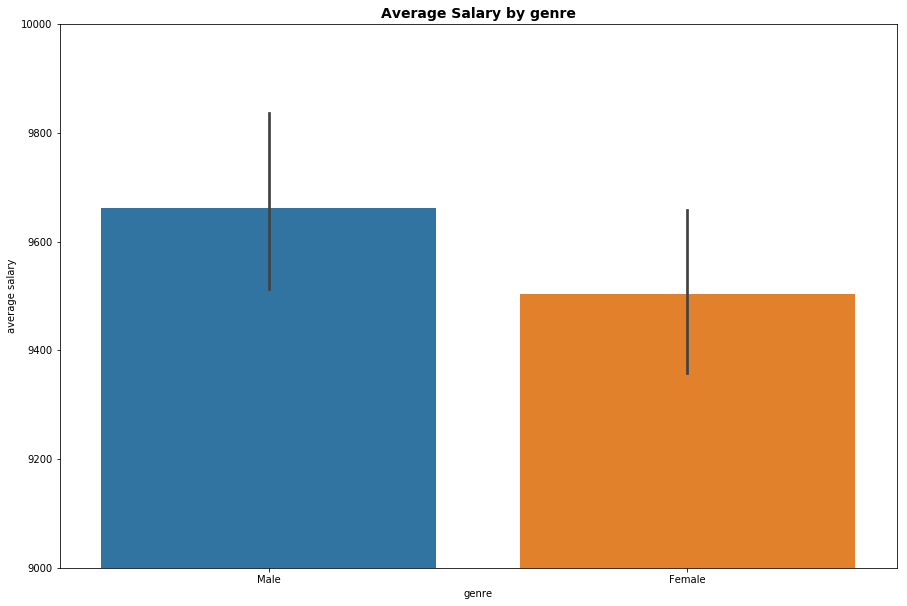

In [701]:
train_data_copy = train_data.copy()
train_data_copy["genre"] = train_data_copy["genre"].astype(str)
train_data_copy["genre"].replace({"0": "Female","1": "Male"}, inplace=True)

plt.figure(figsize=(15,10))
plt.ylim(9000, 10000)
sb.barplot(x = train_data_copy["genre"], y = train_data_copy["average salary"])
plt.title("Average Salary by genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
# display
plt.show()

[back](#index)
#### Matrix <a id="matrix"></a>

train_data_w /test_data_w : train/test data where withdrawals in cash are replaced by withdrawals

In [702]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 84 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           543 non-null    float64
 1   account_id                                        543 non-null    float64
 2   amount                                            543 non-null    float64
 3   duration                                          543 non-null    float64
 4   payments                                          543 non-null    float64
 5   status                                            543 non-null    float64
 6   district_id                                       543 non-null    float64
 7   no. of inhabitants                                543 non-null    float64
 8   no. of municipalities with inhabitants < 499      543 non-null    float64
 9   no. of municipalities

16 Dropped columns: ["unemploymant rate '96", "no. of commited crimes '95", "no. of commited crimes '96", 'operation_count_with_cash', 'operation_std_collect', 'operation_cov_collect', 'operation_cov_remi', 'operation_cov_with_card', 'operation_cov_interest', 'amount_trans_abs_min', 'amount_trans_range', 'balance_abs_min', 'type_count_withdrawal', 'type_mean_credit', 'type_std_credit', 'type_cov_credit']


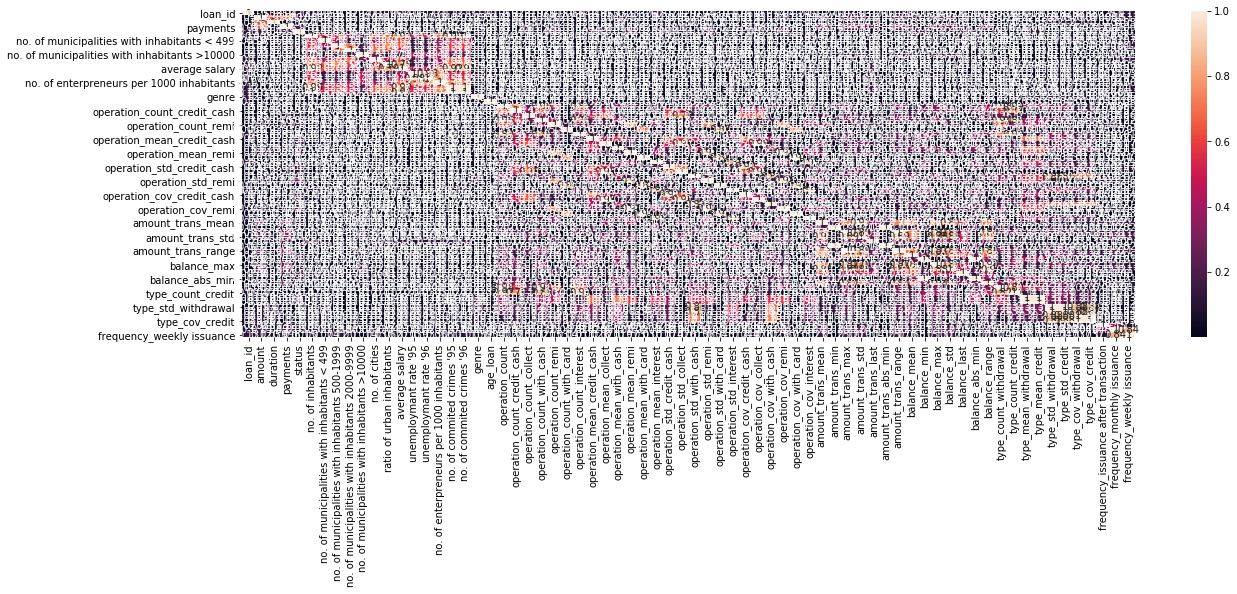

In [703]:
# Dropping ids
#train_data_no_ids = train_data.drop(['loan_id', 'account_id', 'district_id', 'disp_id', 'client_id', 'card_id', 'trans_id'], axis=1)
#train_data_no_ids = train_data.drop(['client_id', 'account_id', 'district_id', 'disp_id', 'card_id', 'trans_id', 'age_loan', 'age_account'], axis=1)
#test_data_no_ids = test_data.drop(['client_id', 'account_id', 'district_id', 'disp_id', 'card_id', 'trans_id', 'age_loan', 'age_account'], axis=1)
train_data_no_ids = train_data.drop(['account_id', 'district_id','age_loan_range_10-19','age_loan_range_20-29','age_loan_range_30-39','age_loan_range_40-49','age_loan_range_50-59','age_loan_range_60-69','age_account_range_10-19','age_account_range_20-29','age_account_range_30-39','age_account_range_40-49','age_account_range_50-59','age_account_range_60-69'], axis=1)
test_data_no_ids = test_data.drop(['account_id', 'district_id'], axis=1)


# Create correlation matrix
corr_matrix = train_data_no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix, annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
train_data_no_ids.drop(to_drop, axis=1, inplace=True)
test_data_no_ids.drop(to_drop, axis=1, inplace=True)

print("{} Dropped columns: {}".format(len(to_drop), to_drop) )

In [704]:
train_data_no_ids.head()

loan_id    amount  duration  payments  status  no. of inhabitants  \
0   4959.0   80952.0      24.0    3373.0     1.0           1204953.0   
1   4959.0   80952.0      24.0    3373.0     1.0           1204953.0   
2   4961.0   30276.0      12.0    2523.0    -1.0            103347.0   
3   4961.0   30276.0      12.0    2523.0    -1.0            103347.0   
4   4973.0  165960.0      24.0    6915.0     1.0             93931.0   

   no. of municipalities with inhabitants < 499  \
0                                           0.0   
1                                           0.0   
2                                          87.0   
3                                          87.0   
4                                          74.0   

   no. of municipalities with inhabitants 500-1999  \
0                                              0.0   
1                                              0.0   
2                                             16.0   
3                                             16.0   
4                                             21.0   

   no. of municipalities with inhabitants 2000-9999  \
0                                               0.0   
1                                               0.0   
2                                               7.0   
3                                               7.0   
4                                              10.0   

   no. of municipalities with inhabitants >10000  ...   balance_std  \
0                                            1.0  ...   8529.296754   
1                                            1.0  ...  15851.680601   
2                                            1.0  ...   8267.060960   
3                                            1.0  ...  15069.412521   
4                                            1.0  ...  22577.563392   

   balance_last  balance_range  type_count_credit  type_mean_withdrawal  \
0       27855.2        38630.9                 11              0.702703   
1       38880.5        66429.6                 11              0.352941   
2       15854.0        18200.0                  2              0.500000   
3       16245.9        57157.5                 44              0.421053   
4       38007.1       106369.6                 21              0.650000   

   type_std_withdrawal  type_cov_withdrawal  \
0             0.457069             0.214715   
1             0.477885             0.242647   
2             0.500000             0.333333   
3             0.493728             0.247018   
4             0.476970             0.231356   

   frequency_issuance after transaction  frequency_monthly issuance  \
0                                 False                        True   
1                                 False                        True   
2                                 False                        True   
3                                 False                        True   
4                                 False                        True   

   frequency_weekly issuance  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 54 columns]

In [705]:
# Removing rows with nan values for status
#train_data_no_ids.dropna(subset=["status"], inplace=True)

#print(no_ids.drop_duplicates(inplace=True)
print(train_data_no_ids["status"].value_counts())

 1.0    467
-1.0     76
Name: status, dtype: int64


In [706]:
train_data_no_ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           543 non-null    float64
 1   amount                                            543 non-null    float64
 2   duration                                          543 non-null    float64
 3   payments                                          543 non-null    float64
 4   status                                            543 non-null    float64
 5   no. of inhabitants                                543 non-null    float64
 6   no. of municipalities with inhabitants < 499      543 non-null    float64
 7   no. of municipalities with inhabitants 500-1999   543 non-null    float64
 8   no. of municipalities with inhabitants 2000-9999  543 non-null    float64
 9   no. of municipalities

In [707]:
train_data_no_ids.head()

loan_id    amount  duration  payments  status  no. of inhabitants  \
0   4959.0   80952.0      24.0    3373.0     1.0           1204953.0   
1   4959.0   80952.0      24.0    3373.0     1.0           1204953.0   
2   4961.0   30276.0      12.0    2523.0    -1.0            103347.0   
3   4961.0   30276.0      12.0    2523.0    -1.0            103347.0   
4   4973.0  165960.0      24.0    6915.0     1.0             93931.0   

   no. of municipalities with inhabitants < 499  \
0                                           0.0   
1                                           0.0   
2                                          87.0   
3                                          87.0   
4                                          74.0   

   no. of municipalities with inhabitants 500-1999  \
0                                              0.0   
1                                              0.0   
2                                             16.0   
3                                             16.0   
4                                             21.0   

   no. of municipalities with inhabitants 2000-9999  \
0                                               0.0   
1                                               0.0   
2                                               7.0   
3                                               7.0   
4                                              10.0   

   no. of municipalities with inhabitants >10000  ...   balance_std  \
0                                            1.0  ...   8529.296754   
1                                            1.0  ...  15851.680601   
2                                            1.0  ...   8267.060960   
3                                            1.0  ...  15069.412521   
4                                            1.0  ...  22577.563392   

   balance_last  balance_range  type_count_credit  type_mean_withdrawal  \
0       27855.2        38630.9                 11              0.702703   
1       38880.5        66429.6                 11              0.352941   
2       15854.0        18200.0                  2              0.500000   
3       16245.9        57157.5                 44              0.421053   
4       38007.1       106369.6                 21              0.650000   

   type_std_withdrawal  type_cov_withdrawal  \
0             0.457069             0.214715   
1             0.477885             0.242647   
2             0.500000             0.333333   
3             0.493728             0.247018   
4             0.476970             0.231356   

   frequency_issuance after transaction  frequency_monthly issuance  \
0                                 False                        True   
1                                 False                        True   
2                                 False                        True   
3                                 False                        True   
4                                 False                        True   

   frequency_weekly issuance  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 54 columns]

In [708]:
all_inputs = train_data_no_ids[train_data_no_ids.columns.drop(['loan_id', 'status'])]
all_labels = train_data_no_ids['status'].values

# competition_inputs = test_data_no_ids.drop(columns=["loan_id"])
# all_ids_comp = test_data_no_ids['loan_id'].values

#all_inputs = train_data_no_ids.iloc[:, :-1].values
#all_labels = train_data_no_ids.iloc[:, -1].values

amount                                              0
duration                                            0
payments                                            0
no. of inhabitants                                  0
no. of municipalities with inhabitants < 499        0
no. of municipalities with inhabitants 500-1999     0
no. of municipalities with inhabitants 2000-9999    0
no. of municipalities with inhabitants >10000       0
no. of cities                                       0
ratio of urban inhabitants                          0
average salary                                      0
unemploymant rate '95                               0
no. of enterpreneurs per 1000 inhabitants           0
genre                                               0
age_loan                                            0
operation_count                                     0
operation_count_credit_cash                         0
operation_count_collect                             0
operation_count_remi        

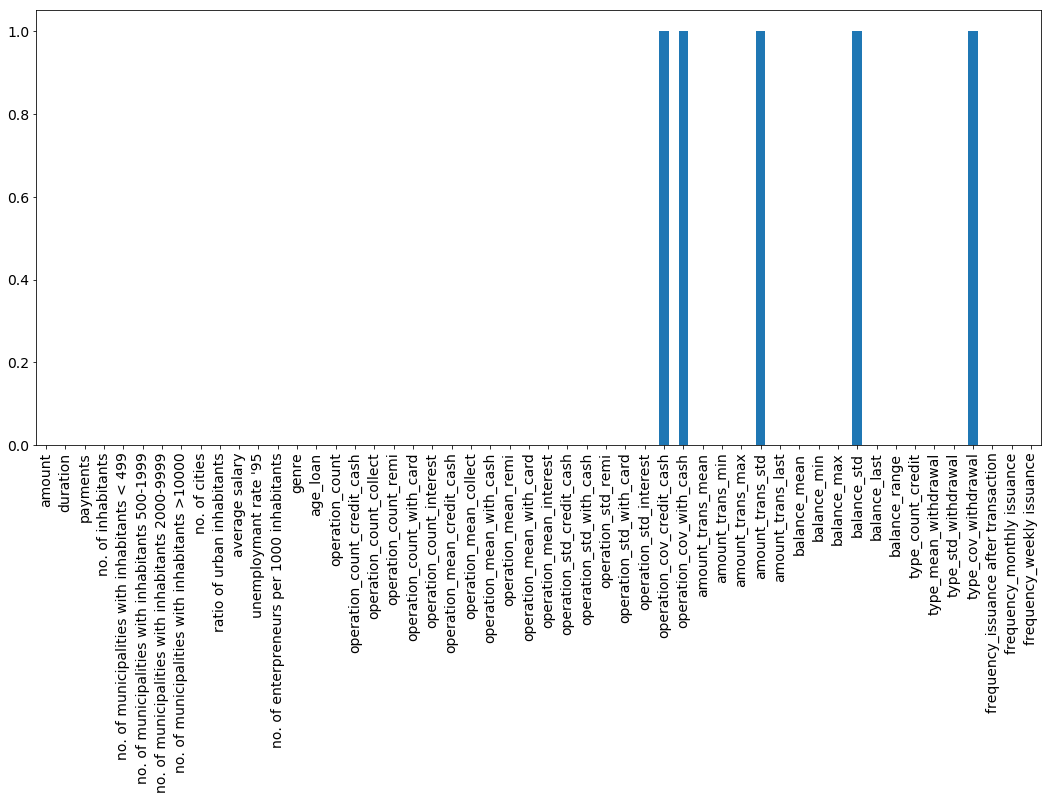

In [709]:
all_inputs.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);

all_inputs = all_inputs.drop(columns=["operation_cov_credit_cash","operation_cov_with_cash"])
print(all_inputs.isnull().sum())

all_inputs['amount_trans_std'].fillna(value=all_inputs['amount_trans_std'].mean(), inplace=True)
all_inputs['balance_std'].fillna(value=all_inputs['balance_std'].mean(), inplace=True)
all_inputs['type_cov_withdrawal'].fillna(value=all_inputs['type_cov_withdrawal'].mean(), inplace=True)

#all_inputs["operation_cov_credit_cash"].fillna(0, inplace=True)
#all_inputs["operation_cov_with_cash"].fillna(0, inplace=True)
#all_inputs["amount_trans_std"].fillna(0, inplace=True)
#all_inputs["balance_std"].fillna(0, inplace=True)
#all_inputs["type_cov_withdrawal"].fillna(0, inplace=True)

In [713]:
all_inputs.isnull().sum()

amount                                              0
duration                                            0
payments                                            0
no. of inhabitants                                  0
no. of municipalities with inhabitants < 499        0
no. of municipalities with inhabitants 500-1999     0
no. of municipalities with inhabitants 2000-9999    0
no. of municipalities with inhabitants >10000       0
no. of cities                                       0
ratio of urban inhabitants                          0
average salary                                      0
unemploymant rate '95                               0
no. of enterpreneurs per 1000 inhabitants           0
genre                                               0
age_loan                                            0
operation_count                                     0
operation_count_credit_cash                         0
operation_count_collect                             0
operation_count_remi        

In [711]:
# get a test dataset with 25% of the credit_data_subset
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#### [back](#index)
## Classifiers <a class="anchor" id="classifiers"></a>

Classification report:
              precision    recall  f1-score   support

        -1.0       0.16      0.94      0.28        18
         1.0       0.97      0.25      0.40       118

    accuracy                           0.35       136
   macro avg       0.56      0.60      0.34       136
weighted avg       0.86      0.35      0.39       136




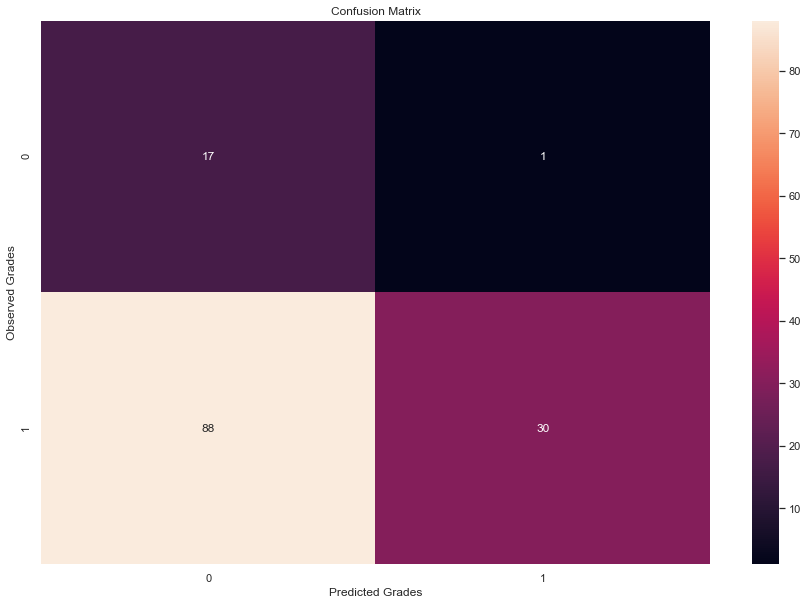

In [715]:
model = 5

if model == 0:
    classifier = DecisionTreeClassifier()
elif model == 1:
    classifier = KNeighborsClassifier()
elif model == 2:
    classifier = SVC(probability=True)
elif model == 3:
    scaler = StandardScaler()

    # Fit only to the training data
    scaler.fit(X_train)

    # Now apply the transformations to the data:
    X_train_nn = scaler.transform(X_train)
    X_test_nn = scaler.transform(X_test)

    # Create the classifier
    classifier = MLPClassifier(random_state=1, max_iter=500) 
elif model == 4:
    classifier = LogisticRegression()
elif model == 5:
    classifier = GaussianNB()
elif model == 6:
    classifier = RandomForestClassifier(300)
elif model == 7:
    classifier = XGBClassifier()
elif model == 8:
    classifier = MLPClassifier(alpha=1, max_iter=1000)
elif model == 9:
    classifier = AdaBoostClassifier()
elif model == 10:
    classifier = VotingClassifier(
     estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
     voting='hard', weights=[1,1,1]
)
    
classifier.fit(X_train, y_train)
classifier_prediction = classifier.predict(X_test)

classifier_classification_report = classification_report(y_test, classifier_prediction, output_dict=True)

print(f"Classification report:\n{classification_report(y_test, classifier_prediction)}\n")

sb.set(font_scale=1.0)
 
ax = plt.subplot()

confusion_matrix_dtc = confusion_matrix(y_test, classifier_prediction)

sb.heatmap(confusion_matrix_dtc, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Decision Tree <a class="anchor" id="decision-tree"></a>



TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       349
         pay       1.00      1.00      1.00       349

    accuracy                           1.00       698
   macro avg       1.00      1.00      1.00       698
weighted avg       1.00      1.00      1.00       698




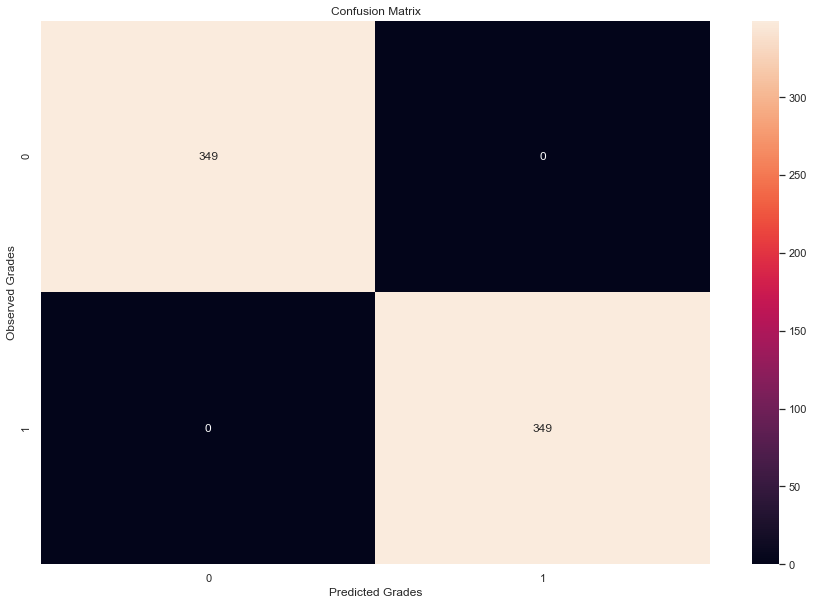

TEST
F1 Score: 0.8927038626609441
ROC: 0.6351224105461393
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.33      0.39      0.36        18
         pay       0.90      0.88      0.89       118

    accuracy                           0.82       136
   macro avg       0.62      0.64      0.63       136
weighted avg       0.83      0.82      0.82       136



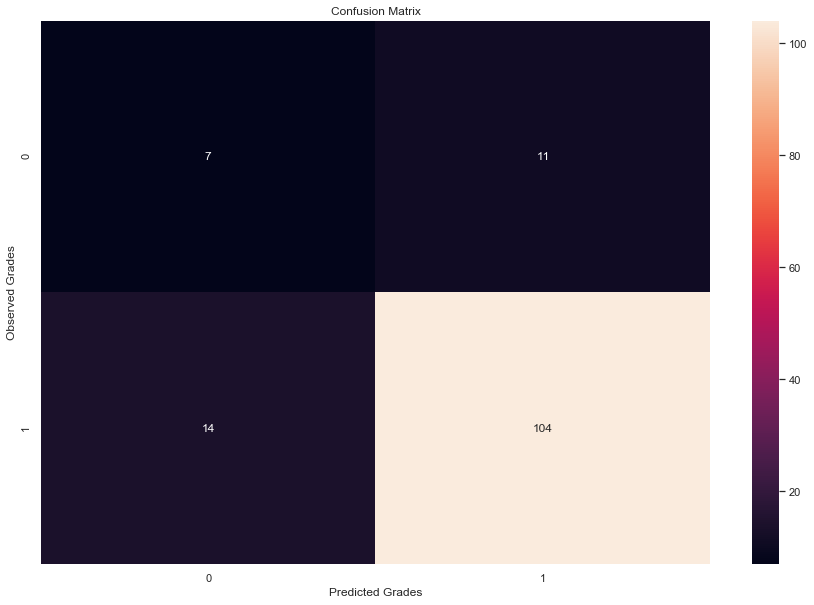

In [716]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Feature Selection
decision_tree_classifier = RFECV(decision_tree_classifier, scoring='roc_auc')

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

dtc_prediction = decision_tree_classifier.predict(X_test)

dtc_classification_report = classification_report(y_test, dtc_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = decision_tree_classifier.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = decision_tree_classifier.predict(X_test) 
f1_dt = f1_score(y_test, predictions_test)
roc_dt = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_dt))
print(f"ROC: {roc_dt}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()


### Parameter Tunning <a class="anchor" id="parameter-tunning"></a>

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Best score: 0.8702635297488577
TRAIN
F1 Score: 0.9195751138088013
ROC: 0.9240687679083096
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.88      0.98      0.93       349
         pay       0.98      0.87      0.92       349

    accuracy                           0.92       698
   macro avg       0.93      0.92      0.92       698
weighted avg       0.93      0.92      0.92       698



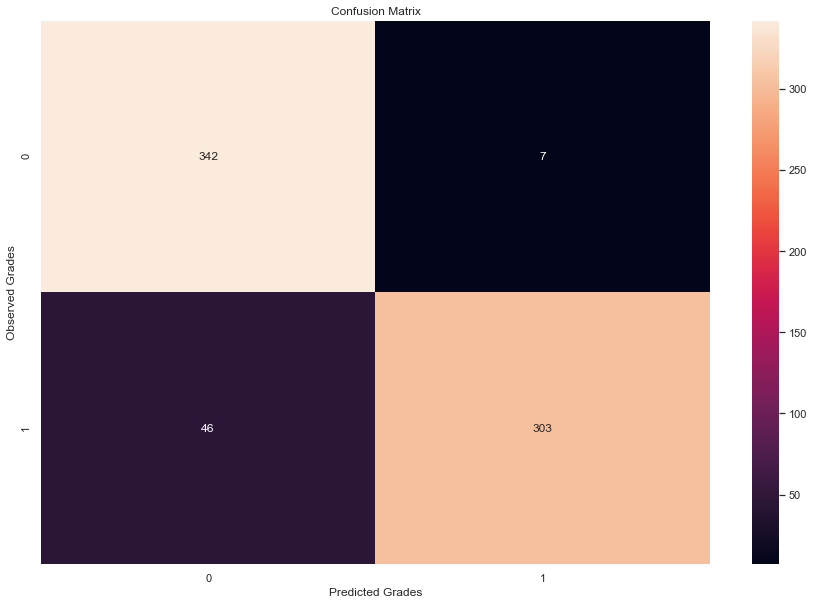

TEST
F1 Score: 0.8421052631578948
ROC: 0.78954802259887
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.33      0.83      0.48        18
         pay       0.97      0.75      0.84       118

    accuracy                           0.76       136
   macro avg       0.65      0.79      0.66       136
weighted avg       0.88      0.76      0.79       136



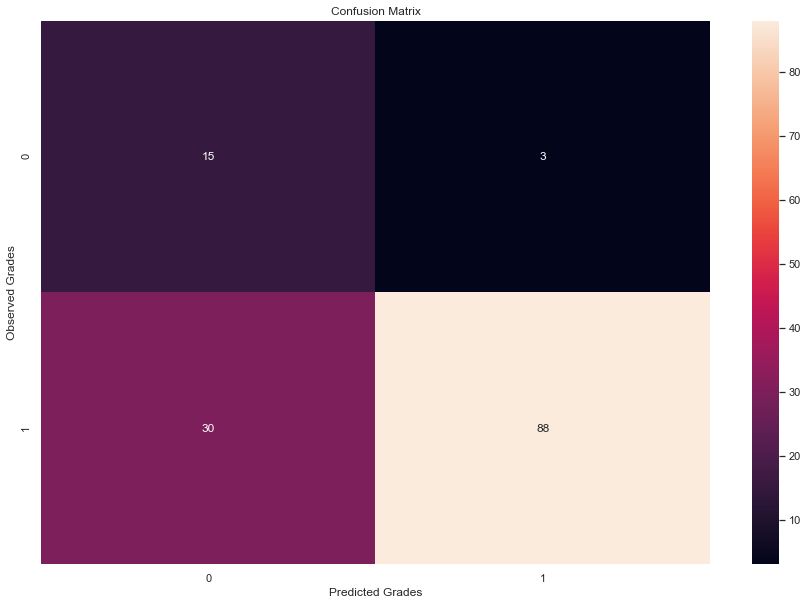

In [717]:
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(1, 10),
                  'max_features': range(10,20)}

# grid_search = GridSearchCV(DecisionTreeClassifier(),
#                            param_grid=parameter_grid,
#                            cv=10,
#                            verbose=4,
#                            n_jobs=-1)

dt_classifier = DecisionTreeClassifier(min_samples_leaf = 10)

dt_grid_search = GridSearchCV(dt_classifier, scoring="precision_weighted", cv=10, param_grid=parameter_grid)
dt_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(dt_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = dt_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = dt_grid_search.predict(X_test) 
f1_dt_tun = f1_score(y_test, predictions_test)
roc_f1_dt = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_dt_tun))
print(f"ROC: {roc_f1_dt}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## K-Nearest Neighbor <a class="anchor" id="k-nearest-neighbor"></a>

TRAIN
F1 Score: 0.8864353312302838
ROC: 0.8968481375358166
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.84      0.99      0.91       349
         pay       0.99      0.81      0.89       349

    accuracy                           0.90       698
   macro avg       0.91      0.90      0.90       698
weighted avg       0.91      0.90      0.90       698




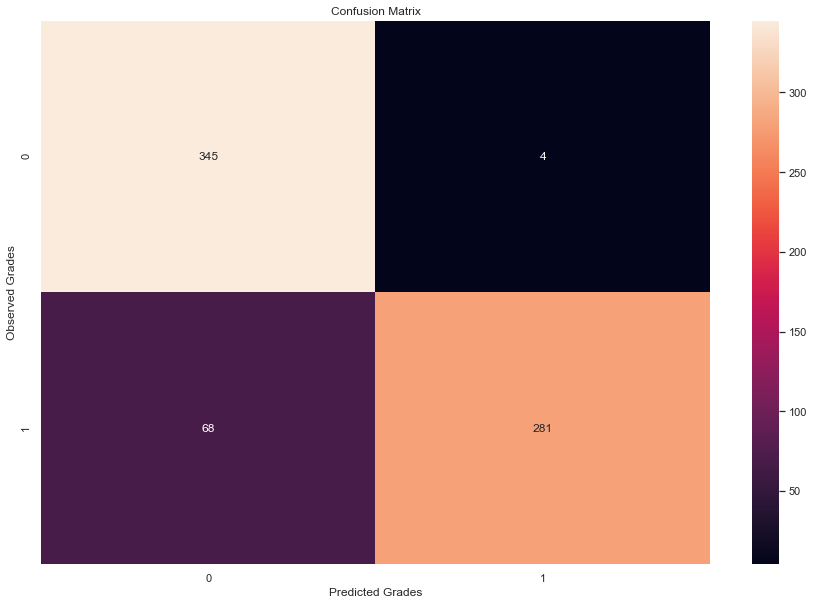

TEST
F1 Score: 0.8333333333333333
ROC: 0.6591337099811676
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.26      0.56      0.36        18
         pay       0.92      0.76      0.83       118

    accuracy                           0.74       136
   macro avg       0.59      0.66      0.60       136
weighted avg       0.83      0.74      0.77       136



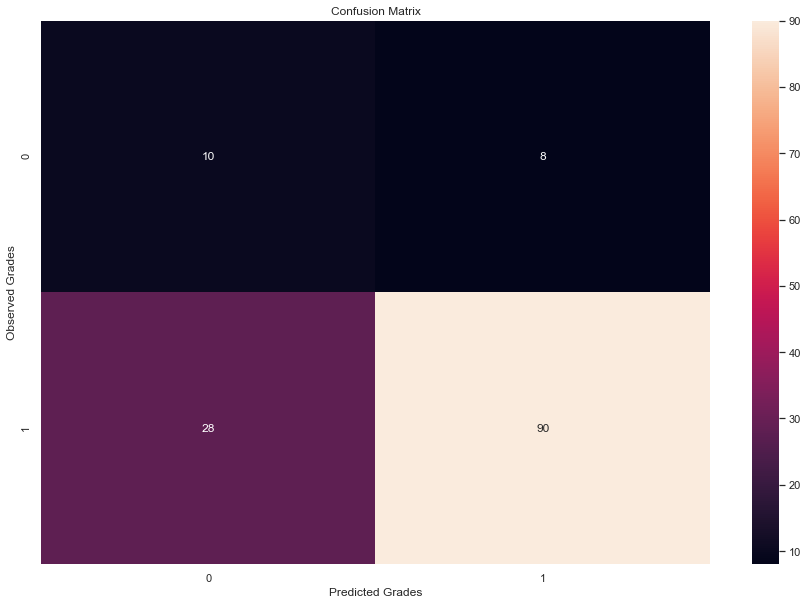

In [718]:
knn = KNeighborsClassifier()

# Feature Selection
# knn = RFECV(knn, scoring='roc_auc')

knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)

knn_classification_report = classification_report(y_test, knn_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = knn.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = knn.predict(X_test) 
f1_knn = f1_score(y_test, predictions_test)
roc_knn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_knn))
print(f"ROC: {roc_knn}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-2"></a>

Best score: 0.9635198079231693
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       349
         pay       1.00      1.00      1.00       349

    accuracy                           1.00       698
   macro avg       1.00      1.00      1.00       698
weighted avg       1.00      1.00      1.00       698



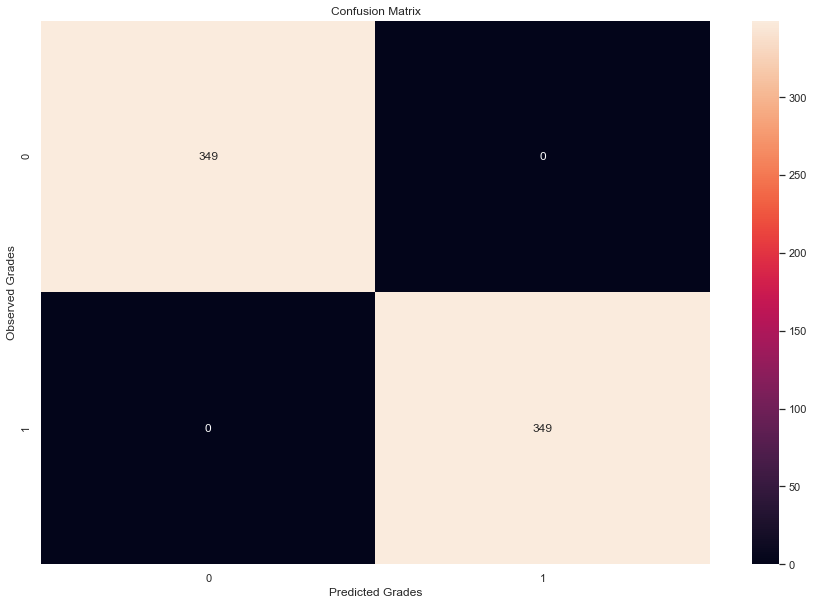

TEST
F1 Score: 0.8151658767772512
ROC: 0.6699623352165724
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.26      0.61      0.36        18
         pay       0.92      0.73      0.82       118

    accuracy                           0.71       136
   macro avg       0.59      0.67      0.59       136
weighted avg       0.84      0.71      0.76       136



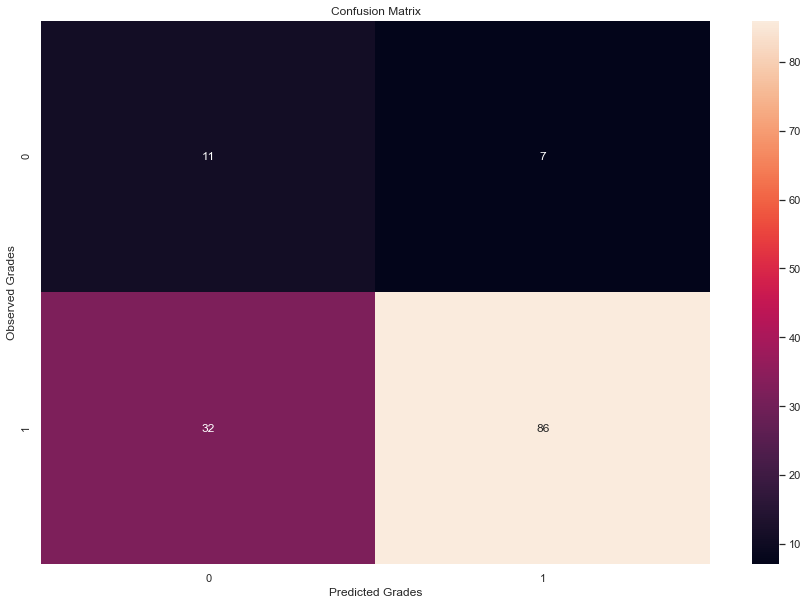

In [720]:
# parameter_grid = {'n_neighbors': [5,10,15,20],
#                   'weights': ['uniform', 'distance'],
#                   'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# grid_search = GridSearchCV(KNeighborsClassifier(),
#                            param_grid=parameter_grid,
#                            scoring='precision_weighted',
#                            cv=10,
#                            n_jobs=3,
#                            verbose=4)

knn_classifier = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [3,5,11,19],
                'weights': ['uniform','distance'],
                'p':[1,2],
                 'algorithm':['ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(knn_classifier, parameter_grid, scoring="roc_auc", n_jobs=-1, cv=10)
knn_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(knn_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = knn_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = knn_grid_search.predict(X_test) 
f1_knn_tun = f1_score(y_test, predictions_test)
roc_knn_tun = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_knn_tun))
print(f"ROC: {roc_knn_tun}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Support-Vector Machines <a class="anchor" id="support-vector-machines"></a>

TRAIN
F1 Score: 0.7310924369747899
ROC: 0.7249283667621775
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.74      0.70      0.72       349
         pay       0.72      0.75      0.73       349

    accuracy                           0.72       698
   macro avg       0.73      0.72      0.72       698
weighted avg       0.73      0.72      0.72       698




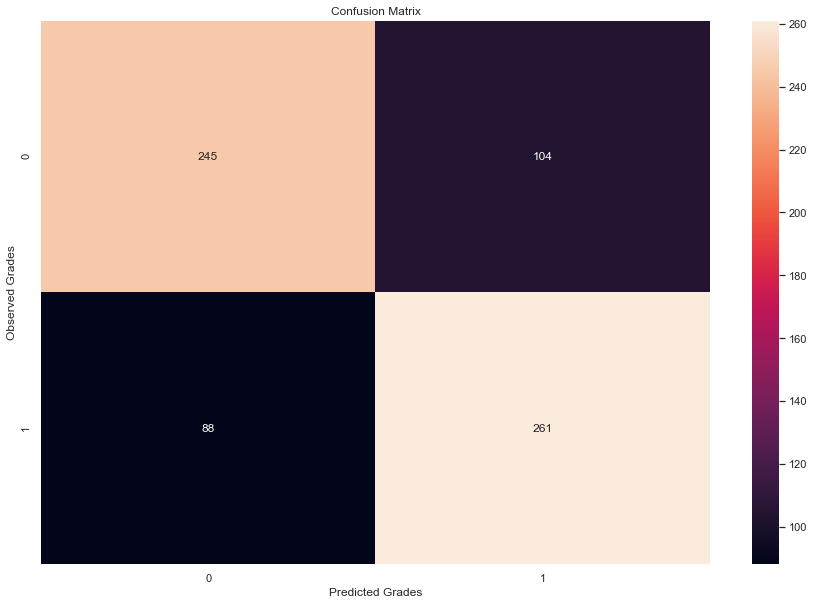

TEST
F1 Score: 0.8294930875576038
ROC: 0.6313559322033898
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.24      0.50      0.33        18
         pay       0.91      0.76      0.83       118

    accuracy                           0.73       136
   macro avg       0.58      0.63      0.58       136
weighted avg       0.82      0.73      0.76       136



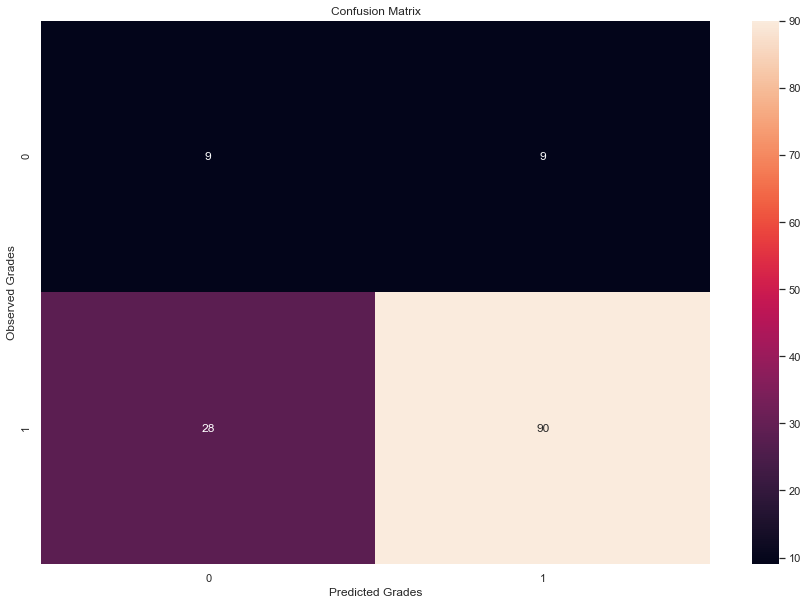

In [725]:
svc = SVC(probability=True)

# Feature Selection
#svc = RFECV(svc, scoring='roc_auc')

svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

svm_classification_report = classification_report(y_test, svc_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = svc.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = svc.predict(X_test) 
f1_svm = f1_score(y_test, predictions_test)
roc_svm = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_svm))
print(f"ROC: {roc_svm}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-3"></a>

In [ ]:
svm_classifier = SVC(probability=True)

parameter_grid = {'kernel': ['linear','rbf','poly']}

svm_grid_search = GridSearchCV(svm_classifier, scoring="roc_auc", cv=5, param_grid=parameter_grid)
svm_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(svm_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = svm_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svm = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = svm_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svm = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Neural Networks <a class="anchor" id="neural-networks"></a>

F1 Score: 0.9256198347107438
ROC: 0.6412429378531074
              precision    recall  f1-score   support

        -1.0       0.50      0.33      0.40        18
         1.0       0.90      0.95      0.93       118

    accuracy                           0.87       136
   macro avg       0.70      0.64      0.66       136
weighted avg       0.85      0.87      0.86       136



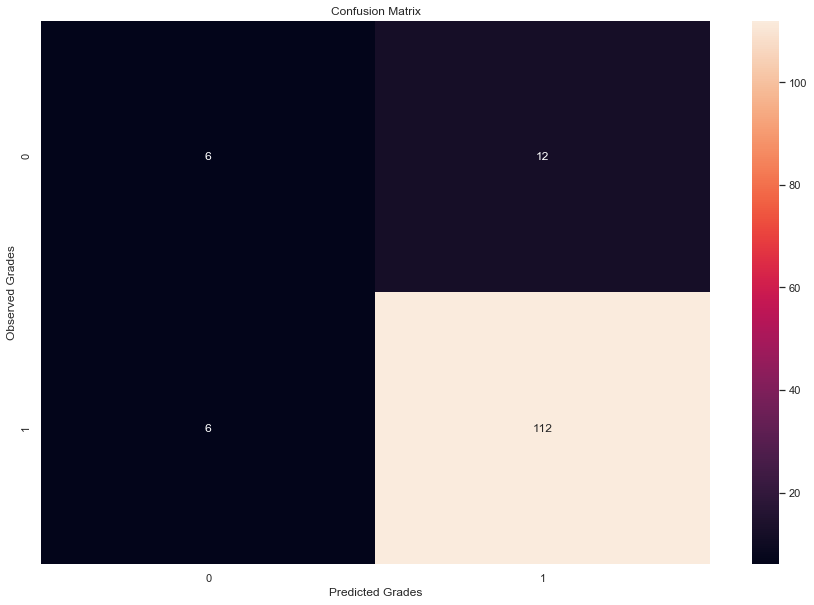

In [726]:
scaler = StandardScaler()

# Feature Selection
#scaler = RFECV(scaler, scoring='roc_auc')

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

# Train the classifier on the training set
ANNClassifier.fit(X_train_nn, y_train)

predictions_test = ANNClassifier.predict(X_test_nn)

f1_nn = f1_score(y_test, predictions_test)
roc_nn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nn))
print(f"ROC: {roc_nn}")

confusion_matrix_ann = confusion_matrix(y_test,predictions_test)

nn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
print(classification_report(y_test,predictions_test))

sb.set(font_scale=1.0)

ax = plt.subplot()

sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

best_nn_classification_report = nn_classification_report

### Parameter Tunning <a class="anchor" id="parameter-tunning-4"></a>

In [727]:
parameter_grid = {'activation': ['tanh','identity','logistic','relu'],
                  'solver': ['adam','lbfgs','sgd'],
                  'hidden_layer_sizes': [3,5,8,13,21,34],
                  'verbose': [True]}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(ANNClassifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Iteration 1, loss = 1.12519313
Iteration 2, loss = 1.11972733
Iteration 3, loss = 1.11682224
Iteration 4, loss = 1.10501685
Iteration 5, loss = 1.08771176
Iteration 6, loss = 1.07338801
Iteration 7, loss = 1.06208156
Iteration 8, loss = 1.05539016
Iteration 9, loss = 1.04998724
Iteration 10, loss = 1.04610942
Iteration 11, loss = 1.03592883
Iteration 12, loss = 1.01932619
Iteration 13, loss = 1.01165583
Iteration 14, loss = 0.99619767
Iteration 15, loss = 0.98739928
Iteration 16, loss = 0.97859470
Iteration 17, loss = 0.97050887
Iteration 18, loss = 0.96755189
Iteration 19, loss = 0.96350321
Iteration 20, loss = 0.95748038
Iteration 21, loss = 0.94961746
Iteration 22, loss = 0.94658383
Iteration 23, loss = 0.94244341
Iteration 24, loss = 0.93642142
Iteration 25, loss = 0.93136701
Iteration 26, loss = 0.92937219
Iteration 27, loss = 0.92730083
Iteration 28, loss = 0.92473524
Iteration 29, loss = 0.92313806
Iteration 30, loss = 0.92087935
Iteration 31, loss = 0.91833824
Iteration 32, los

Iteration 277, loss = 0.69029500
Iteration 278, loss = 0.69025282
Iteration 279, loss = 0.69020753
Iteration 280, loss = 0.69016889
Iteration 281, loss = 0.69010157
Iteration 282, loss = 0.69006242
Iteration 283, loss = 0.68999327
Iteration 284, loss = 0.68993343
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.12607439
Iteration 2, loss = 1.13033938
Iteration 3, loss = 1.13856763
Iteration 4, loss = 1.14102158
Iteration 5, loss = 1.13971040
Iteration 6, loss = 1.14015321
Iteration 7, loss = 1.13440122
Iteration 8, loss = 1.13172245
Iteration 9, loss = 1.12609597
Iteration 10, loss = 1.12067279
Iteration 11, loss = 1.11528516
Iteration 12, loss = 1.11284229
Iteration 13, loss = 1.10734169
Iteration 14, loss = 1.10246785
Iteration 15, loss = 1.09924737
Iteration 16, loss = 1.09500541
Iteration 17, loss = 1.09018244
Iteration 18, loss = 1.08569456
Iteration 19, loss = 1.08142876
Iteration 20, loss = 1.07665955
Iteration 21, l

Iteration 254, loss = 0.68945024
Iteration 255, loss = 0.68938603
Iteration 256, loss = 0.68932651
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.12574542
Iteration 2, loss = 1.13454544
Iteration 3, loss = 1.14393361
Iteration 4, loss = 1.14002640
Iteration 5, loss = 1.13828736
Iteration 6, loss = 1.13936952
Iteration 7, loss = 1.13406658
Iteration 8, loss = 1.13039181
Iteration 9, loss = 1.12906850
Iteration 10, loss = 1.14059894
Iteration 11, loss = 1.13806829
Iteration 12, loss = 1.12227184
Iteration 13, loss = 1.11252777
Iteration 14, loss = 1.10426787
Iteration 15, loss = 1.07926016
Iteration 16, loss = 1.06654853
Iteration 17, loss = 1.04968393
Iteration 18, loss = 1.03018980
Iteration 19, loss = 1.02611762
Iteration 20, loss = 1.01470145
Iteration 21, loss = 1.00887359
Iteration 22, loss = 1.00259278
Iteration 23, loss = 0.99486570
Iteration 24, loss = 0.98489150
Iteration 25, loss = 0.96824616
Iteration 26, loss =

Iteration 210, loss = 0.69681133
Iteration 211, loss = 0.69660407
Iteration 212, loss = 0.69640679
Iteration 213, loss = 0.69619951
Iteration 214, loss = 0.69597584
Iteration 215, loss = 0.69577254
Iteration 216, loss = 0.69554136
Iteration 217, loss = 0.69535398
Iteration 218, loss = 0.69516337
Iteration 219, loss = 0.69501633
Iteration 220, loss = 0.69484135
Iteration 221, loss = 0.69467935
Iteration 222, loss = 0.69455540
Iteration 223, loss = 0.69439636
Iteration 224, loss = 0.69424338
Iteration 225, loss = 0.69411765
Iteration 226, loss = 0.69396821
Iteration 227, loss = 0.69383010
Iteration 228, loss = 0.69369074
Iteration 229, loss = 0.69357306
Iteration 230, loss = 0.69343920
Iteration 231, loss = 0.69330743
Iteration 232, loss = 0.69319690
Iteration 233, loss = 0.69309414
Iteration 234, loss = 0.69295807
Iteration 235, loss = 0.69285265
Iteration 236, loss = 0.69276516
Iteration 237, loss = 0.69269684
Iteration 238, loss = 0.69251537
Iteration 239, loss = 0.69244177
Iteration 

Iteration 250, loss = 0.69161477
Iteration 251, loss = 0.69155814
Iteration 252, loss = 0.69149241
Iteration 253, loss = 0.69144255
Iteration 254, loss = 0.69139100
Iteration 255, loss = 0.69133827
Iteration 256, loss = 0.69129562
Iteration 257, loss = 0.69122379
Iteration 258, loss = 0.69118861
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.13590958
Iteration 2, loss = 1.13751392
Iteration 3, loss = 1.14268593
Iteration 4, loss = 1.11969250
Iteration 5, loss = 1.11441966
Iteration 6, loss = 1.10976264
Iteration 7, loss = 1.10630189
Iteration 8, loss = 1.10382998
Iteration 9, loss = 1.10084171
Iteration 10, loss = 1.09623829
Iteration 11, loss = 1.09097183
Iteration 12, loss = 1.08603237
Iteration 13, loss = 1.08320317
Iteration 14, loss = 1.08123691
Iteration 15, loss = 1.07616707
Iteration 16, loss = 1.07168428
Iteration 17, loss = 1.06846955
Iteration 18, loss = 1.06398276
Iteration 19, loss = 1.06039609
Iteration 20, 

Iteration 9, loss = 1.12594801
Iteration 10, loss = 1.11967740
Iteration 11, loss = 1.11561123
Iteration 12, loss = 1.11190098
Iteration 13, loss = 1.10945986
Iteration 14, loss = 1.10468571
Iteration 15, loss = 1.08896490
Iteration 16, loss = 1.07179914
Iteration 17, loss = 1.06574118
Iteration 18, loss = 1.05816250
Iteration 19, loss = 1.05036947
Iteration 20, loss = 1.04103100
Iteration 21, loss = 1.03918032
Iteration 22, loss = 1.03226954
Iteration 23, loss = 1.02761853
Iteration 24, loss = 1.02599920
Iteration 25, loss = 1.02122706
Iteration 26, loss = 1.02117496
Iteration 27, loss = 1.02033918
Iteration 28, loss = 1.01625487
Iteration 29, loss = 1.01211112
Iteration 30, loss = 1.00967705
Iteration 31, loss = 1.00575579
Iteration 32, loss = 1.00208459
Iteration 33, loss = 0.97985962
Iteration 34, loss = 0.94854753
Iteration 35, loss = 0.93759101
Iteration 36, loss = 0.92913579
Iteration 37, loss = 0.92421076
Iteration 38, loss = 0.91280575
Iteration 39, loss = 0.90762173
Iteration

Iteration 9, loss = 1.14303943
Iteration 10, loss = 1.13286098
Iteration 11, loss = 1.12879437
Iteration 12, loss = 1.12676879
Iteration 13, loss = 1.12106928
Iteration 14, loss = 1.11723510
Iteration 15, loss = 1.11076286
Iteration 16, loss = 1.10701450
Iteration 17, loss = 1.10361703
Iteration 18, loss = 1.08880392
Iteration 19, loss = 1.08042786
Iteration 20, loss = 1.06277345
Iteration 21, loss = 1.05433501
Iteration 22, loss = 1.04616848
Iteration 23, loss = 1.04230913
Iteration 24, loss = 1.03872218
Iteration 25, loss = 1.03234897
Iteration 26, loss = 1.02846059
Iteration 27, loss = 1.02482124
Iteration 28, loss = 1.02104096
Iteration 29, loss = 1.01291887
Iteration 30, loss = 1.00043616
Iteration 31, loss = 0.99606990
Iteration 32, loss = 0.98690358
Iteration 33, loss = 0.98211345
Iteration 34, loss = 0.97777258
Iteration 35, loss = 0.97444515
Iteration 36, loss = 0.96941799
Iteration 37, loss = 0.95770601
Iteration 38, loss = 0.95044070
Iteration 39, loss = 0.93925765
Iteration

Iteration 15, loss = 1.09691950
Iteration 16, loss = 1.09288679
Iteration 17, loss = 1.08579568
Iteration 18, loss = 1.08284423
Iteration 19, loss = 1.07938560
Iteration 20, loss = 1.07746614
Iteration 21, loss = 1.07500674
Iteration 22, loss = 1.06803943
Iteration 23, loss = 1.06317728
Iteration 24, loss = 1.05602272
Iteration 25, loss = 1.05268232
Iteration 26, loss = 1.04702037
Iteration 27, loss = 1.04197136
Iteration 28, loss = 1.03771524
Iteration 29, loss = 1.03344884
Iteration 30, loss = 1.02898267
Iteration 31, loss = 1.02588251
Iteration 32, loss = 1.02160550
Iteration 33, loss = 1.01743699
Iteration 34, loss = 1.01323435
Iteration 35, loss = 1.00916720
Iteration 36, loss = 1.00512832
Iteration 37, loss = 1.00107948
Iteration 38, loss = 0.99711503
Iteration 39, loss = 0.99312620
Iteration 40, loss = 0.98909986
Iteration 41, loss = 0.98523242
Iteration 42, loss = 0.98132519
Iteration 43, loss = 0.97749977
Iteration 44, loss = 0.97371275
Iteration 45, loss = 0.96984552
Iteratio

Iteration 110, loss = 0.68993706
Iteration 111, loss = 0.68980607
Iteration 112, loss = 0.68967722
Iteration 113, loss = 0.68958020
Iteration 114, loss = 0.68944906
Iteration 115, loss = 0.68940710
Iteration 116, loss = 0.68931163
Iteration 117, loss = 0.68925067
Iteration 118, loss = 0.68916497
Iteration 119, loss = 0.68910886
Iteration 120, loss = 0.68906864
Iteration 121, loss = 0.68902306
Iteration 122, loss = 0.68897724
Iteration 123, loss = 0.68891657
Iteration 124, loss = 0.68882159
Iteration 125, loss = 0.68871130
Iteration 126, loss = 0.68861709
Iteration 127, loss = 0.68848161
Iteration 128, loss = 0.68838445
Iteration 129, loss = 0.68826947
Iteration 130, loss = 0.68818133
Iteration 131, loss = 0.68812578
Iteration 132, loss = 0.68810333
Iteration 133, loss = 0.68808057
Iteration 134, loss = 0.68804278
Iteration 135, loss = 0.68800233
Iteration 136, loss = 0.68797832
Iteration 137, loss = 0.68794710
Iteration 138, loss = 0.68790978
Iteration 139, loss = 0.68787267
Iteration 

Iteration 31, loss = 0.85141447
Iteration 32, loss = 0.84267369
Iteration 33, loss = 0.83446238
Iteration 34, loss = 0.82625339
Iteration 35, loss = 0.81849801
Iteration 36, loss = 0.81104874
Iteration 37, loss = 0.80352106
Iteration 38, loss = 0.79670774
Iteration 39, loss = 0.78996392
Iteration 40, loss = 0.78394940
Iteration 41, loss = 0.77813236
Iteration 42, loss = 0.77304881
Iteration 43, loss = 0.76791307
Iteration 44, loss = 0.76326333
Iteration 45, loss = 0.75857194
Iteration 46, loss = 0.75465274
Iteration 47, loss = 0.75039787
Iteration 48, loss = 0.74685216
Iteration 49, loss = 0.74315671
Iteration 50, loss = 0.74015148
Iteration 51, loss = 0.73723743
Iteration 52, loss = 0.73440648
Iteration 53, loss = 0.73152924
Iteration 54, loss = 0.72909808
Iteration 55, loss = 0.72695216
Iteration 56, loss = 0.72498775
Iteration 57, loss = 0.72279105
Iteration 58, loss = 0.72064349
Iteration 59, loss = 0.71860394
Iteration 60, loss = 0.71685213
Iteration 61, loss = 0.71518013
Iteratio

Iteration 104, loss = 0.69390514
Iteration 105, loss = 0.69384046
Iteration 106, loss = 0.69373348
Iteration 107, loss = 0.69367215
Iteration 108, loss = 0.69351982
Iteration 109, loss = 0.69340461
Iteration 110, loss = 0.69331242
Iteration 111, loss = 0.69324195
Iteration 112, loss = 0.69317877
Iteration 113, loss = 0.69313989
Iteration 114, loss = 0.69307681
Iteration 115, loss = 0.69306069
Iteration 116, loss = 0.69302047
Iteration 117, loss = 0.69298708
Iteration 118, loss = 0.69293850
Iteration 119, loss = 0.69290677
Iteration 120, loss = 0.69288152
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.15276588
Iteration 2, loss = 1.19999892
Iteration 3, loss = 1.21469660
Iteration 4, loss = 1.21822176
Iteration 5, loss = 1.20870929
Iteration 6, loss = 1.19726821
Iteration 7, loss = 1.17936566
Iteration 8, loss = 1.16149354
Iteration 9, loss = 1.14289079
Iteration 10, loss = 1.12517220
Iteration 11, loss = 1.10877199
Iterat

Iteration 45, loss = 0.75571157
Iteration 46, loss = 0.75163964
Iteration 47, loss = 0.74792384
Iteration 48, loss = 0.74469329
Iteration 49, loss = 0.74133491
Iteration 50, loss = 0.73830450
Iteration 51, loss = 0.73537659
Iteration 52, loss = 0.73263664
Iteration 53, loss = 0.72996097
Iteration 54, loss = 0.72762321
Iteration 55, loss = 0.72551741
Iteration 56, loss = 0.72351261
Iteration 57, loss = 0.72133295
Iteration 58, loss = 0.71945659
Iteration 59, loss = 0.71760661
Iteration 60, loss = 0.71582884
Iteration 61, loss = 0.71431692
Iteration 62, loss = 0.71280314
Iteration 63, loss = 0.71148076
Iteration 64, loss = 0.71041729
Iteration 65, loss = 0.70921687
Iteration 66, loss = 0.70829888
Iteration 67, loss = 0.70719626
Iteration 68, loss = 0.70616002
Iteration 69, loss = 0.70513940
Iteration 70, loss = 0.70421131
Iteration 71, loss = 0.70344363
Iteration 72, loss = 0.70274421
Iteration 73, loss = 0.70203682
Iteration 74, loss = 0.70141989
Iteration 75, loss = 0.70081872
Iteratio

Iteration 104, loss = 0.66847188
Iteration 105, loss = 0.66935755
Iteration 106, loss = 0.67024924
Iteration 107, loss = 0.67074096
Iteration 108, loss = 0.67472775
Iteration 109, loss = 0.68212050
Iteration 110, loss = 0.68517679
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.86860608
Iteration 2, loss = 0.85953176
Iteration 3, loss = 0.85395758
Iteration 4, loss = 0.84721142
Iteration 5, loss = 0.84173940
Iteration 6, loss = 0.83638558
Iteration 7, loss = 0.83056400
Iteration 8, loss = 0.82528918
Iteration 9, loss = 0.82057962
Iteration 10, loss = 0.81568953
Iteration 11, loss = 0.81062413
Iteration 12, loss = 0.80578238
Iteration 13, loss = 0.80140426
Iteration 14, loss = 0.79820323
Iteration 15, loss = 0.79420244
Iteration 16, loss = 0.79049752
Iteration 17, loss = 0.78708644
Iteration 18, loss = 0.78321911
Iteration 19, loss = 0.77956740
Iteration 20, loss = 0.77569241
Iteration 21, loss = 0.77193598
Iteration 22, lo

Iteration 70, loss = 0.65842299
Iteration 71, loss = 0.65732677
Iteration 72, loss = 0.65539615
Iteration 73, loss = 0.65373570
Iteration 74, loss = 0.65814176
Iteration 75, loss = 0.65901642
Iteration 76, loss = 0.66342787
Iteration 77, loss = 0.66519391
Iteration 78, loss = 0.66378588
Iteration 79, loss = 0.66142328
Iteration 80, loss = 0.65823692
Iteration 81, loss = 0.65652068
Iteration 82, loss = 0.65548250
Iteration 83, loss = 0.65438193
Iteration 84, loss = 0.65468861
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.86818173
Iteration 2, loss = 0.86055549
Iteration 3, loss = 0.85417994
Iteration 4, loss = 0.84768981
Iteration 5, loss = 0.84221179
Iteration 6, loss = 0.83676698
Iteration 7, loss = 0.83177253
Iteration 8, loss = 0.82559651
Iteration 9, loss = 0.82011585
Iteration 10, loss = 0.81452826
Iteration 11, loss = 0.80976931
Iteration 12, loss = 0.80503243
Iteration 13, loss = 0.80057011
Iteration 14, loss = 0.

Iteration 1, loss = 0.86802469
Iteration 2, loss = 0.85922165
Iteration 3, loss = 0.85270234
Iteration 4, loss = 0.84621185
Iteration 5, loss = 0.84045289
Iteration 6, loss = 0.83406258
Iteration 7, loss = 0.82884277
Iteration 8, loss = 0.82358767
Iteration 9, loss = 0.81835781
Iteration 10, loss = 0.81281140
Iteration 11, loss = 0.80789854
Iteration 12, loss = 0.80330493
Iteration 13, loss = 0.79894881
Iteration 14, loss = 0.79614896
Iteration 15, loss = 0.79174361
Iteration 16, loss = 0.78736094
Iteration 17, loss = 0.78314608
Iteration 18, loss = 0.77910178
Iteration 19, loss = 0.77354783
Iteration 20, loss = 0.76893136
Iteration 21, loss = 0.76501872
Iteration 22, loss = 0.76183593
Iteration 23, loss = 0.75881577
Iteration 24, loss = 0.75614951
Iteration 25, loss = 0.75105376
Iteration 26, loss = 0.74733448
Iteration 27, loss = 0.74419402
Iteration 28, loss = 0.74112199
Iteration 29, loss = 0.73807176
Iteration 30, loss = 0.73463832
Iteration 31, loss = 0.73178793
Iteration 32, los

Iteration 66, loss = 0.67453419
Iteration 67, loss = 0.67380031
Iteration 68, loss = 0.67306146
Iteration 69, loss = 0.67234851
Iteration 70, loss = 0.67166019
Iteration 71, loss = 0.67104512
Iteration 72, loss = 0.67048094
Iteration 73, loss = 0.66992519
Iteration 74, loss = 0.66941540
Iteration 75, loss = 0.66893502
Iteration 76, loss = 0.66847429
Iteration 77, loss = 0.66809268
Iteration 78, loss = 0.66764460
Iteration 79, loss = 0.66718105
Iteration 80, loss = 0.66677151
Iteration 81, loss = 0.66640894
Iteration 82, loss = 0.66605805
Iteration 83, loss = 0.66576467
Iteration 84, loss = 0.66547620
Iteration 85, loss = 0.66518043
Iteration 86, loss = 0.66489494
Iteration 87, loss = 0.66457698
Iteration 88, loss = 0.66438710
Iteration 89, loss = 0.66414596
Iteration 90, loss = 0.66392603
Iteration 91, loss = 0.66368898
Iteration 92, loss = 0.66343689
Iteration 93, loss = 0.66324474
Iteration 94, loss = 0.66300680
Iteration 95, loss = 0.66279158
Iteration 96, loss = 0.66259351
Iteratio

Iteration 55, loss = 0.66923665
Iteration 56, loss = 0.66914781
Iteration 57, loss = 0.66904992
Iteration 58, loss = 0.66903478
Iteration 59, loss = 0.66894705
Iteration 60, loss = 0.66890628
Iteration 61, loss = 0.66887769
Iteration 62, loss = 0.66884511
Iteration 63, loss = 0.66879620
Iteration 64, loss = 0.66875820
Iteration 65, loss = 0.66871184
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.86890869
Iteration 2, loss = 0.85966941
Iteration 3, loss = 0.84907432
Iteration 4, loss = 0.83786033
Iteration 5, loss = 0.82552096
Iteration 6, loss = 0.81394161
Iteration 7, loss = 0.80227148
Iteration 8, loss = 0.79179852
Iteration 9, loss = 0.78127034
Iteration 10, loss = 0.77124818
Iteration 11, loss = 0.76217259
Iteration 12, loss = 0.75405657
Iteration 13, loss = 0.74700670
Iteration 14, loss = 0.74045546
Iteration 15, loss = 0.73451497
Iteration 16, loss = 0.72881813
Iteration 17, loss = 0.72397798
Iteration 18, loss = 0.

Iteration 55, loss = 0.67163774
Iteration 56, loss = 0.67147729
Iteration 57, loss = 0.67140179
Iteration 58, loss = 0.67136306
Iteration 59, loss = 0.67129615
Iteration 60, loss = 0.67123027
Iteration 61, loss = 0.67118034
Iteration 62, loss = 0.67113398
Iteration 63, loss = 0.67108014
Iteration 64, loss = 0.67103706
Iteration 65, loss = 0.67095118
Iteration 66, loss = 0.67091595
Iteration 67, loss = 0.67087910
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.87097876
Iteration 2, loss = 0.86252711
Iteration 3, loss = 0.85123815
Iteration 4, loss = 0.83946891
Iteration 5, loss = 0.82615925
Iteration 6, loss = 0.81380841
Iteration 7, loss = 0.80176406
Iteration 8, loss = 0.79094689
Iteration 9, loss = 0.78019803
Iteration 10, loss = 0.77016105
Iteration 11, loss = 0.76106368
Iteration 12, loss = 0.75290849
Iteration 13, loss = 0.74557671
Iteration 14, loss = 0.73877572
Iteration 15, loss = 0.73247613
Iteration 16, loss = 0.

Iteration 11, loss = 0.73405186
Iteration 12, loss = 0.73367935
Iteration 13, loss = 0.73968166
Iteration 14, loss = 0.74598788
Iteration 15, loss = 0.74078432
Iteration 16, loss = 0.74360659
Iteration 17, loss = 0.73994571
Iteration 18, loss = 0.73335235
Iteration 19, loss = 0.72937295
Iteration 20, loss = 0.72871096
Iteration 21, loss = 0.72758682
Iteration 22, loss = 0.72685641
Iteration 23, loss = 0.72724975
Iteration 24, loss = 0.72666576
Iteration 25, loss = 0.72727959
Iteration 26, loss = 0.72674020
Iteration 27, loss = 0.72629047
Iteration 28, loss = 0.72647466
Iteration 29, loss = 0.73059484
Iteration 30, loss = 0.73214627
Iteration 31, loss = 0.73249589
Iteration 32, loss = 0.73315280
Iteration 33, loss = 0.73271405
Iteration 34, loss = 0.73228684
Iteration 35, loss = 0.73085944
Iteration 36, loss = 0.72971759
Iteration 37, loss = 0.72930630
Iteration 38, loss = 0.72884995
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 1, loss = 0.75580547
Iteration 2, loss = 0.75510596
Iteration 3, loss = 0.75404442
Iteration 4, loss = 0.75290574
Iteration 5, loss = 0.75157956
Iteration 6, loss = 0.75214830
Iteration 7, loss = 0.74934741
Iteration 8, loss = 0.74792504
Iteration 9, loss = 0.74778067
Iteration 10, loss = 0.74752901
Iteration 11, loss = 0.74662233
Iteration 12, loss = 0.74603988
Iteration 13, loss = 0.74509810
Iteration 14, loss = 0.74426840
Iteration 15, loss = 0.74343865
Iteration 16, loss = 0.74253555
Iteration 17, loss = 0.74184817
Iteration 18, loss = 0.74103183
Iteration 19, loss = 0.74042520
Iteration 20, loss = 0.73982708
Iteration 21, loss = 0.73926729
Iteration 22, loss = 0.73870986
Iteration 23, loss = 0.73815485
Iteration 24, loss = 0.73765299
Iteration 25, loss = 0.73721140
Iteration 26, loss = 0.73671576
Iteration 27, loss = 0.73620394
Iteration 28, loss = 0.73573207
Iteration 29, loss = 0.73522936
Iteration 30, loss = 0.73483939
Iteration 31, loss = 0.73436289
Iteration 32, los

Iteration 63, loss = 0.72052570
Iteration 64, loss = 0.72031498
Iteration 65, loss = 0.72005327
Iteration 66, loss = 0.71982112
Iteration 67, loss = 0.71958628
Iteration 68, loss = 0.71933474
Iteration 69, loss = 0.71910756
Iteration 70, loss = 0.71888748
Iteration 71, loss = 0.71873728
Iteration 72, loss = 0.71849122
Iteration 73, loss = 0.71831290
Iteration 74, loss = 0.71810772
Iteration 75, loss = 0.71793544
Iteration 76, loss = 0.71775223
Iteration 77, loss = 0.71755765
Iteration 78, loss = 0.71742145
Iteration 79, loss = 0.71720144
Iteration 80, loss = 0.71700662
Iteration 81, loss = 0.71679492
Iteration 82, loss = 0.71660111
Iteration 83, loss = 0.71636005
Iteration 84, loss = 0.71614321
Iteration 85, loss = 0.71596725
Iteration 86, loss = 0.71575518
Iteration 87, loss = 0.71552196
Iteration 88, loss = 0.71531805
Iteration 89, loss = 0.71512493
Iteration 90, loss = 0.71492945
Iteration 91, loss = 0.71472026
Iteration 92, loss = 0.71456349
Iteration 93, loss = 0.71435804
Iteratio

Iteration 144, loss = 0.70281878
Iteration 145, loss = 0.70269263
Iteration 146, loss = 0.70257374
Iteration 147, loss = 0.70246271
Iteration 148, loss = 0.70235621
Iteration 149, loss = 0.70225100
Iteration 150, loss = 0.70213842
Iteration 151, loss = 0.70203901
Iteration 152, loss = 0.70192957
Iteration 153, loss = 0.70181869
Iteration 154, loss = 0.70173618
Iteration 155, loss = 0.70160179
Iteration 156, loss = 0.70149250
Iteration 157, loss = 0.70137839
Iteration 158, loss = 0.70125279
Iteration 159, loss = 0.70112678
Iteration 160, loss = 0.70100859
Iteration 161, loss = 0.70088332
Iteration 162, loss = 0.70079180
Iteration 163, loss = 0.70070783
Iteration 164, loss = 0.70059253
Iteration 165, loss = 0.70050546
Iteration 166, loss = 0.70040179
Iteration 167, loss = 0.70029311
Iteration 168, loss = 0.70018074
Iteration 169, loss = 0.70006732
Iteration 170, loss = 0.69994833
Iteration 171, loss = 0.69987875
Iteration 172, loss = 0.69979383
Iteration 173, loss = 0.69973987
Iteration 

Iteration 239, loss = 0.69519066
Iteration 240, loss = 0.69505461
Iteration 241, loss = 0.69496324
Iteration 242, loss = 0.69488034
Iteration 243, loss = 0.69480815
Iteration 244, loss = 0.69471727
Iteration 245, loss = 0.69465028
Iteration 246, loss = 0.69457066
Iteration 247, loss = 0.69450116
Iteration 248, loss = 0.69443692
Iteration 249, loss = 0.69435402
Iteration 250, loss = 0.69428808
Iteration 251, loss = 0.69421139
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75954892
Iteration 2, loss = 0.75881474
Iteration 3, loss = 0.74163188
Iteration 4, loss = 0.74214184
Iteration 5, loss = 0.74130613
Iteration 6, loss = 0.74072007
Iteration 7, loss = 0.74029077
Iteration 8, loss = 0.73980188
Iteration 9, loss = 0.73932875
Iteration 10, loss = 0.73885693
Iteration 11, loss = 0.73838574
Iteration 12, loss = 0.73799461
Iteration 13, loss = 0.73759144
Iteration 14, loss = 0.73711746
Iteration 15, loss = 0.73667041
Iteration 

Iteration 78, loss = 0.71307703
Iteration 79, loss = 0.71279505
Iteration 80, loss = 0.71252265
Iteration 81, loss = 0.71223132
Iteration 82, loss = 0.71196011
Iteration 83, loss = 0.71171544
Iteration 84, loss = 0.71145194
Iteration 85, loss = 0.71123667
Iteration 86, loss = 0.71102846
Iteration 87, loss = 0.71079204
Iteration 88, loss = 0.71061685
Iteration 89, loss = 0.71043193
Iteration 90, loss = 0.71020205
Iteration 91, loss = 0.70997623
Iteration 92, loss = 0.70978170
Iteration 93, loss = 0.70958091
Iteration 94, loss = 0.70934298
Iteration 95, loss = 0.70912262
Iteration 96, loss = 0.70891365
Iteration 97, loss = 0.70870257
Iteration 98, loss = 0.70848111
Iteration 99, loss = 0.70826600
Iteration 100, loss = 0.70804701
Iteration 101, loss = 0.70784675
Iteration 102, loss = 0.70764086
Iteration 103, loss = 0.70744676
Iteration 104, loss = 0.70725753
Iteration 105, loss = 0.70706904
Iteration 106, loss = 0.70688057
Iteration 107, loss = 0.70667094
Iteration 108, loss = 0.70647648

Iteration 160, loss = 0.70156505
Iteration 161, loss = 0.70141467
Iteration 162, loss = 0.70127559
Iteration 163, loss = 0.70113646
Iteration 164, loss = 0.70099012
Iteration 165, loss = 0.70084984
Iteration 166, loss = 0.70071810
Iteration 167, loss = 0.70056515
Iteration 168, loss = 0.70043482
Iteration 169, loss = 0.70031190
Iteration 170, loss = 0.70018604
Iteration 171, loss = 0.70004183
Iteration 172, loss = 0.69994021
Iteration 173, loss = 0.69982841
Iteration 174, loss = 0.69969937
Iteration 175, loss = 0.69959889
Iteration 176, loss = 0.69947217
Iteration 177, loss = 0.69935689
Iteration 178, loss = 0.69922144
Iteration 179, loss = 0.69910653
Iteration 180, loss = 0.69898447
Iteration 181, loss = 0.69887614
Iteration 182, loss = 0.69875592
Iteration 183, loss = 0.69863494
Iteration 184, loss = 0.69852417
Iteration 185, loss = 0.69839544
Iteration 186, loss = 0.69831068
Iteration 187, loss = 0.69821824
Iteration 188, loss = 0.69813717
Iteration 189, loss = 0.69802850
Iteration 

Iteration 1, loss = 0.75850035
Iteration 2, loss = 0.75769112
Iteration 3, loss = 0.74970931
Iteration 4, loss = 0.74143029
Iteration 5, loss = 0.74065894
Iteration 6, loss = 0.74009777
Iteration 7, loss = 0.73952857
Iteration 8, loss = 0.73881300
Iteration 9, loss = 0.73819102
Iteration 10, loss = 0.73758485
Iteration 11, loss = 0.73690423
Iteration 12, loss = 0.73624546
Iteration 13, loss = 0.73572345
Iteration 14, loss = 0.73518015
Iteration 15, loss = 0.73467517
Iteration 16, loss = 0.73418772
Iteration 17, loss = 0.73370833
Iteration 18, loss = 0.73323272
Iteration 19, loss = 0.73272638
Iteration 20, loss = 0.73229292
Iteration 21, loss = 0.73182307
Iteration 22, loss = 0.73144730
Iteration 23, loss = 0.73106787
Iteration 24, loss = 0.73071445
Iteration 25, loss = 0.73039521
Iteration 26, loss = 0.73004995
Iteration 27, loss = 0.72964314
Iteration 28, loss = 0.72926906
Iteration 29, loss = 0.72888351
Iteration 30, loss = 0.72853134
Iteration 31, loss = 0.72821826
Iteration 32, los

Iteration 17, loss = 0.72277647
Iteration 18, loss = 0.72257625
Iteration 19, loss = 0.71865518
Iteration 20, loss = 0.72160077
Iteration 21, loss = 0.73046967
Iteration 22, loss = 0.73005389
Iteration 23, loss = 0.73081558
Iteration 24, loss = 0.72864599
Iteration 25, loss = 0.72859062
Iteration 26, loss = 0.72761092
Iteration 27, loss = 0.72748726
Iteration 28, loss = 0.72469779
Iteration 29, loss = 0.72397104
Iteration 30, loss = 0.72086752
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78488816
Iteration 2, loss = 0.78129690
Iteration 3, loss = 0.77679774
Iteration 4, loss = 0.78109323
Iteration 5, loss = 0.77421039
Iteration 6, loss = 0.77100839
Iteration 7, loss = 0.76706351
Iteration 8, loss = 0.76528794
Iteration 9, loss = 0.76520216
Iteration 10, loss = 0.76212989
Iteration 11, loss = 0.75625914
Iteration 12, loss = 0.75235861
Iteration 13, loss = 0.75349991
Iteration 14, loss = 0.74679879
Iteration 15, loss = 0.

Iteration 61, loss = 0.71200977
Iteration 62, loss = 0.71169310
Iteration 63, loss = 0.71135954
Iteration 64, loss = 0.70989224
Iteration 65, loss = 0.70783638
Iteration 66, loss = 0.72050339
Iteration 67, loss = 0.72202678
Iteration 68, loss = 0.71399798
Iteration 69, loss = 0.71363525
Iteration 70, loss = 0.71413218
Iteration 71, loss = 0.71224852
Iteration 72, loss = 0.71017903
Iteration 73, loss = 0.70896475
Iteration 74, loss = 0.70789416
Iteration 75, loss = 0.70694738
Iteration 76, loss = 0.70631309
Iteration 77, loss = 0.70575044
Iteration 78, loss = 0.70535284
Iteration 79, loss = 0.70474206
Iteration 80, loss = 0.70432646
Iteration 81, loss = 0.70411080
Iteration 82, loss = 0.70365962
Iteration 83, loss = 0.70335572
Iteration 84, loss = 0.70305591
Iteration 85, loss = 0.70283327
Iteration 86, loss = 0.70256259
Iteration 87, loss = 0.70230648
Iteration 88, loss = 0.70199203
Iteration 89, loss = 0.70174197
Iteration 90, loss = 0.70149007
Iteration 91, loss = 0.70124398
Iteratio

Iteration 46, loss = 0.71124357
Iteration 47, loss = 0.71316467
Iteration 48, loss = 0.71018735
Iteration 49, loss = 0.71774878
Iteration 50, loss = 0.71435467
Iteration 51, loss = 0.71385820
Iteration 52, loss = 0.71086136
Iteration 53, loss = 0.71229873
Iteration 54, loss = 0.71004239
Iteration 55, loss = 0.70265128
Iteration 56, loss = 0.69914067
Iteration 57, loss = 0.69323360
Iteration 58, loss = 0.69243753
Iteration 59, loss = 0.69007717
Iteration 60, loss = 0.68905964
Iteration 61, loss = 0.68816144
Iteration 62, loss = 0.68859242
Iteration 63, loss = 0.68787991
Iteration 64, loss = 0.68761147
Iteration 65, loss = 0.68727334
Iteration 66, loss = 0.68465135
Iteration 67, loss = 0.68422460
Iteration 68, loss = 0.68346964
Iteration 69, loss = 0.68472410
Iteration 70, loss = 0.68685656
Iteration 71, loss = 0.68548904
Iteration 72, loss = 0.68684831
Iteration 73, loss = 0.68309825
Iteration 74, loss = 0.68854706
Iteration 75, loss = 0.69142593
Iteration 76, loss = 0.69314861
Iteratio

Iteration 187, loss = 0.69264086
Iteration 188, loss = 0.69253919
Iteration 189, loss = 0.69247653
Iteration 190, loss = 0.69237403
Iteration 191, loss = 0.69229390
Iteration 192, loss = 0.69221100
Iteration 193, loss = 0.69215022
Iteration 194, loss = 0.69209576
Iteration 195, loss = 0.69203836
Iteration 196, loss = 0.69196336
Iteration 197, loss = 0.69189152
Iteration 198, loss = 0.69178195
Iteration 199, loss = 0.69164703
Iteration 200, loss = 0.69155672
Iteration 201, loss = 0.69153885
Iteration 202, loss = 0.69137877
Iteration 203, loss = 0.69129105
Iteration 204, loss = 0.69118872
Iteration 205, loss = 0.69107462
Iteration 206, loss = 0.69100251
Iteration 207, loss = 0.69096720
Iteration 208, loss = 0.69082396
Iteration 209, loss = 0.69071415
Iteration 210, loss = 0.69062876
Iteration 211, loss = 0.69059996
Iteration 212, loss = 0.69044747
Iteration 213, loss = 0.69038192
Iteration 214, loss = 0.69037622
Iteration 215, loss = 0.69027889
Iteration 216, loss = 0.69019864
Iteration 

Iteration 9, loss = 0.76616928
Iteration 10, loss = 0.76448139
Iteration 11, loss = 0.76236496
Iteration 12, loss = 0.76068791
Iteration 13, loss = 0.75902479
Iteration 14, loss = 0.75747296
Iteration 15, loss = 0.75580392
Iteration 16, loss = 0.75443609
Iteration 17, loss = 0.75317725
Iteration 18, loss = 0.75178729
Iteration 19, loss = 0.75066534
Iteration 20, loss = 0.74941751
Iteration 21, loss = 0.74824638
Iteration 22, loss = 0.74722303
Iteration 23, loss = 0.74616775
Iteration 24, loss = 0.74519090
Iteration 25, loss = 0.74422614
Iteration 26, loss = 0.74339529
Iteration 27, loss = 0.74243849
Iteration 28, loss = 0.74156335
Iteration 29, loss = 0.74061690
Iteration 30, loss = 0.73973972
Iteration 31, loss = 0.73884330
Iteration 32, loss = 0.73796616
Iteration 33, loss = 0.73700967
Iteration 34, loss = 0.73601367
Iteration 35, loss = 0.73499890
Iteration 36, loss = 0.73412300
Iteration 37, loss = 0.73333099
Iteration 38, loss = 0.73254968
Iteration 39, loss = 0.73180741
Iteration

Iteration 52, loss = 0.72695505
Iteration 53, loss = 0.72634603
Iteration 54, loss = 0.72575771
Iteration 55, loss = 0.72518015
Iteration 56, loss = 0.72464687
Iteration 57, loss = 0.72411133
Iteration 58, loss = 0.72362418
Iteration 59, loss = 0.72309401
Iteration 60, loss = 0.72258455
Iteration 61, loss = 0.72215305
Iteration 62, loss = 0.72169248
Iteration 63, loss = 0.72122135
Iteration 64, loss = 0.72079436
Iteration 65, loss = 0.72027083
Iteration 66, loss = 0.71975236
Iteration 67, loss = 0.71918313
Iteration 68, loss = 0.71862912
Iteration 69, loss = 0.71812569
Iteration 70, loss = 0.71756670
Iteration 71, loss = 0.71707391
Iteration 72, loss = 0.71658961
Iteration 73, loss = 0.71615037
Iteration 74, loss = 0.71566428
Iteration 75, loss = 0.71529918
Iteration 76, loss = 0.71493018
Iteration 77, loss = 0.71453995
Iteration 78, loss = 0.71420858
Iteration 79, loss = 0.71382640
Iteration 80, loss = 0.71343455
Iteration 81, loss = 0.71305938
Iteration 82, loss = 0.71262798
Iteratio

Iteration 88, loss = 0.71074439
Iteration 89, loss = 0.71041603
Iteration 90, loss = 0.71012760
Iteration 91, loss = 0.70982606
Iteration 92, loss = 0.70950966
Iteration 93, loss = 0.70924443
Iteration 94, loss = 0.70900493
Iteration 95, loss = 0.70873842
Iteration 96, loss = 0.70844914
Iteration 97, loss = 0.70817901
Iteration 98, loss = 0.70793706
Iteration 99, loss = 0.70767069
Iteration 100, loss = 0.70736794
Iteration 101, loss = 0.70716583
Iteration 102, loss = 0.70693821
Iteration 103, loss = 0.70670689
Iteration 104, loss = 0.70652394
Iteration 105, loss = 0.70630562
Iteration 106, loss = 0.70616928
Iteration 107, loss = 0.70590857
Iteration 108, loss = 0.70567067
Iteration 109, loss = 0.70536429
Iteration 110, loss = 0.70510212
Iteration 111, loss = 0.70481831
Iteration 112, loss = 0.70458720
Iteration 113, loss = 0.70436254
Iteration 114, loss = 0.70419108
Iteration 115, loss = 0.70391026
Iteration 116, loss = 0.70373894
Iteration 117, loss = 0.70353079
Iteration 118, loss = 

Iteration 141, loss = 0.69840322
Iteration 142, loss = 0.69822977
Iteration 143, loss = 0.69805931
Iteration 144, loss = 0.69790774
Iteration 145, loss = 0.69777605
Iteration 146, loss = 0.69762017
Iteration 147, loss = 0.69745796
Iteration 148, loss = 0.69734407
Iteration 149, loss = 0.69723153
Iteration 150, loss = 0.69712209
Iteration 151, loss = 0.69696413
Iteration 152, loss = 0.69679896
Iteration 153, loss = 0.69667886
Iteration 154, loss = 0.69654540
Iteration 155, loss = 0.69646336
Iteration 156, loss = 0.69636687
Iteration 157, loss = 0.69626610
Iteration 158, loss = 0.69614486
Iteration 159, loss = 0.69605487
Iteration 160, loss = 0.69597224
Iteration 161, loss = 0.69588747
Iteration 162, loss = 0.69579545
Iteration 163, loss = 0.69566356
Iteration 164, loss = 0.69553971
Iteration 165, loss = 0.69541420
Iteration 166, loss = 0.69529564
Iteration 167, loss = 0.69511992
Iteration 168, loss = 0.69501187
Iteration 169, loss = 0.69491189
Iteration 170, loss = 0.69479367
Iteration 

Iteration 192, loss = 0.69391336
Iteration 193, loss = 0.69381527
Iteration 194, loss = 0.69371994
Iteration 195, loss = 0.69368865
Iteration 196, loss = 0.69359809
Iteration 197, loss = 0.69357617
Iteration 198, loss = 0.69344684
Iteration 199, loss = 0.69334319
Iteration 200, loss = 0.69324196
Iteration 201, loss = 0.69313888
Iteration 202, loss = 0.69304784
Iteration 203, loss = 0.69294602
Iteration 204, loss = 0.69287617
Iteration 205, loss = 0.69278996
Iteration 206, loss = 0.69274566
Iteration 207, loss = 0.69273819
Iteration 208, loss = 0.69259584
Iteration 209, loss = 0.69247453
Iteration 210, loss = 0.69235002
Iteration 211, loss = 0.69221157
Iteration 212, loss = 0.69203649
Iteration 213, loss = 0.69187428
Iteration 214, loss = 0.69195040
Iteration 215, loss = 0.69177583
Iteration 216, loss = 0.69173761
Iteration 217, loss = 0.69166177
Iteration 218, loss = 0.69160609
Iteration 219, loss = 0.69152008
Iteration 220, loss = 0.69144833
Iteration 221, loss = 0.69136577
Iteration 

Iteration 24, loss = 0.75012000
Iteration 25, loss = 0.74894341
Iteration 26, loss = 0.74781003
Iteration 27, loss = 0.74663770
Iteration 28, loss = 0.74543852
Iteration 29, loss = 0.74434415
Iteration 30, loss = 0.74329192
Iteration 31, loss = 0.74222095
Iteration 32, loss = 0.74126748
Iteration 33, loss = 0.74030351
Iteration 34, loss = 0.73948742
Iteration 35, loss = 0.73861330
Iteration 36, loss = 0.73782337
Iteration 37, loss = 0.73700565
Iteration 38, loss = 0.73627072
Iteration 39, loss = 0.73546188
Iteration 40, loss = 0.73483643
Iteration 41, loss = 0.73398004
Iteration 42, loss = 0.73327450
Iteration 43, loss = 0.73261598
Iteration 44, loss = 0.73193514
Iteration 45, loss = 0.73124019
Iteration 46, loss = 0.73058286
Iteration 47, loss = 0.72987837
Iteration 48, loss = 0.72916473
Iteration 49, loss = 0.72851354
Iteration 50, loss = 0.72774317
Iteration 51, loss = 0.72710855
Iteration 52, loss = 0.72639387
Iteration 53, loss = 0.72579786
Iteration 54, loss = 0.72524297
Iteratio

Iteration 47, loss = 0.73557145
Iteration 48, loss = 0.73475431
Iteration 49, loss = 0.73391481
Iteration 50, loss = 0.73320879
Iteration 51, loss = 0.73246331
Iteration 52, loss = 0.73172571
Iteration 53, loss = 0.73098770
Iteration 54, loss = 0.73033500
Iteration 55, loss = 0.72970057
Iteration 56, loss = 0.72913437
Iteration 57, loss = 0.72849468
Iteration 58, loss = 0.72794853
Iteration 59, loss = 0.72737286
Iteration 60, loss = 0.72682728
Iteration 61, loss = 0.72621925
Iteration 62, loss = 0.72567991
Iteration 63, loss = 0.72518607
Iteration 64, loss = 0.72459592
Iteration 65, loss = 0.72420723
Iteration 66, loss = 0.72363826
Iteration 67, loss = 0.72321726
Iteration 68, loss = 0.72276243
Iteration 69, loss = 0.72233956
Iteration 70, loss = 0.72187774
Iteration 71, loss = 0.72136158
Iteration 72, loss = 0.72088752
Iteration 73, loss = 0.72036752
Iteration 74, loss = 0.71990144
Iteration 75, loss = 0.71950150
Iteration 76, loss = 0.71908546
Iteration 77, loss = 0.71865745
Iteratio

Iteration 64, loss = 0.64042757
Iteration 65, loss = 0.63968968
Iteration 66, loss = 0.63891303
Iteration 67, loss = 0.63816037
Iteration 68, loss = 0.63752999
Iteration 69, loss = 0.63695727
Iteration 70, loss = 0.63634069
Iteration 71, loss = 0.63581705
Iteration 72, loss = 0.63524903
Iteration 73, loss = 0.63469734
Iteration 74, loss = 0.63421620
Iteration 75, loss = 0.63367379
Iteration 76, loss = 0.63330188
Iteration 77, loss = 0.63273774
Iteration 78, loss = 0.63230860
Iteration 79, loss = 0.63195592
Iteration 80, loss = 0.63162558
Iteration 81, loss = 0.63129346
Iteration 82, loss = 0.63105817
Iteration 83, loss = 0.63056329
Iteration 84, loss = 0.63012679
Iteration 85, loss = 0.62965080
Iteration 86, loss = 0.62915826
Iteration 87, loss = 0.62875168
Iteration 88, loss = 0.62835053
Iteration 89, loss = 0.62787556
Iteration 90, loss = 0.62732096
Iteration 91, loss = 0.62687028
Iteration 92, loss = 0.62637713
Iteration 93, loss = 0.62603851
Iteration 94, loss = 0.62578339
Iteratio

Iteration 160, loss = 0.61767209
Iteration 161, loss = 0.61746669
Iteration 162, loss = 0.61714207
Iteration 163, loss = 0.61680230
Iteration 164, loss = 0.61656251
Iteration 165, loss = 0.61624037
Iteration 166, loss = 0.61599191
Iteration 167, loss = 0.61582453
Iteration 168, loss = 0.61552655
Iteration 169, loss = 0.61526170
Iteration 170, loss = 0.61498006
Iteration 171, loss = 0.61474095
Iteration 172, loss = 0.61446895
Iteration 173, loss = 0.61426323
Iteration 174, loss = 0.61414181
Iteration 175, loss = 0.61381588
Iteration 176, loss = 0.61353035
Iteration 177, loss = 0.61324036
Iteration 178, loss = 0.61297877
Iteration 179, loss = 0.61273633
Iteration 180, loss = 0.61255337
Iteration 181, loss = 0.61227400
Iteration 182, loss = 0.61210855
Iteration 183, loss = 0.61178634
Iteration 184, loss = 0.61157253
Iteration 185, loss = 0.61129604
Iteration 186, loss = 0.61116356
Iteration 187, loss = 0.61083889
Iteration 188, loss = 0.61056455
Iteration 189, loss = 0.61042411
Iteration 

Iteration 104, loss = 0.65705230
Iteration 105, loss = 0.65662300
Iteration 106, loss = 0.65628008
Iteration 107, loss = 0.65593609
Iteration 108, loss = 0.65564001
Iteration 109, loss = 0.65535514
Iteration 110, loss = 0.65505524
Iteration 111, loss = 0.65471086
Iteration 112, loss = 0.65443682
Iteration 113, loss = 0.65402991
Iteration 114, loss = 0.65372255
Iteration 115, loss = 0.65340976
Iteration 116, loss = 0.65317987
Iteration 117, loss = 0.65296950
Iteration 118, loss = 0.65206013
Iteration 119, loss = 0.64749529
Iteration 120, loss = 0.64984444
Iteration 121, loss = 0.65131458
Iteration 122, loss = 0.64979243
Iteration 123, loss = 0.64294753
Iteration 124, loss = 0.64663001
Iteration 125, loss = 0.65456498
Iteration 126, loss = 0.66731985
Iteration 127, loss = 0.66184090
Iteration 128, loss = 0.65912900
Iteration 129, loss = 0.65642161
Iteration 130, loss = 0.65389088
Iteration 131, loss = 0.65201827
Iteration 132, loss = 0.65010749
Iteration 133, loss = 0.64863036
Iteration 

Iteration 43, loss = 0.68921583
Iteration 44, loss = 0.69149791
Iteration 45, loss = 0.69469500
Iteration 46, loss = 0.69347763
Iteration 47, loss = 0.69246208
Iteration 48, loss = 0.69156683
Iteration 49, loss = 0.69073221
Iteration 50, loss = 0.68998828
Iteration 51, loss = 0.68910856
Iteration 52, loss = 0.68822855
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.84665631
Iteration 2, loss = 0.83018122
Iteration 3, loss = 0.82268188
Iteration 4, loss = 0.81095075
Iteration 5, loss = 0.81057437
Iteration 6, loss = 0.80453144
Iteration 7, loss = 0.79450525
Iteration 8, loss = 0.78779812
Iteration 9, loss = 0.77641761
Iteration 10, loss = 0.75186086
Iteration 11, loss = 0.74355536
Iteration 12, loss = 0.73888800
Iteration 13, loss = 0.73385863
Iteration 14, loss = 0.73142298
Iteration 15, loss = 0.72924314
Iteration 16, loss = 0.72528596
Iteration 17, loss = 0.72525602
Iteration 18, loss = 0.72272365
Iteration 19, loss = 0.

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\

Iteration 1, loss = 0.83664732
Iteration 2, loss = 0.82732029
Iteration 3, loss = 0.81521360
Iteration 4, loss = 0.80247715
Iteration 5, loss = 0.78963716
Iteration 6, loss = 0.77696473
Iteration 7, loss = 0.76566971
Iteration 8, loss = 0.75537126
Iteration 9, loss = 0.74688847
Iteration 10, loss = 0.73915474
Iteration 11, loss = 0.73358683
Iteration 12, loss = 0.72900667
Iteration 13, loss = 0.72522957
Iteration 14, loss = 0.72219137
Iteration 15, loss = 0.71943208
Iteration 16, loss = 0.71693199
Iteration 17, loss = 0.71480394
Iteration 18, loss = 0.71277231
Iteration 19, loss = 0.71113735
Iteration 20, loss = 0.70968062
Iteration 21, loss = 0.70844195
Iteration 22, loss = 0.70741133
Iteration 23, loss = 0.70630657
Iteration 24, loss = 0.70533265
Iteration 25, loss = 0.70436940
Iteration 26, loss = 0.70336718
Iteration 27, loss = 0.70257078
Iteration 28, loss = 0.70174503
Iteration 29, loss = 0.70094188
Iteration 30, loss = 0.70017019
Iteration 31, loss = 0.69944993
Iteration 32, los

Iteration 254, loss = 0.61834065
Iteration 255, loss = 0.61812102
Iteration 256, loss = 0.61797256
Iteration 257, loss = 0.61779430
Iteration 258, loss = 0.61762836
Iteration 259, loss = 0.61747194
Iteration 260, loss = 0.61733558
Iteration 261, loss = 0.61710366
Iteration 262, loss = 0.61689684
Iteration 263, loss = 0.61665672
Iteration 264, loss = 0.61653710
Iteration 265, loss = 0.61628245
Iteration 266, loss = 0.61608802
Iteration 267, loss = 0.61597130
Iteration 268, loss = 0.61580166
Iteration 269, loss = 0.61570212
Iteration 270, loss = 0.61556375
Iteration 271, loss = 0.61535129
Iteration 272, loss = 0.61529530
Iteration 273, loss = 0.61511016
Iteration 274, loss = 0.61496221
Iteration 275, loss = 0.61480342
Iteration 276, loss = 0.61459389
Iteration 277, loss = 0.61440101
Iteration 278, loss = 0.61419878
Iteration 279, loss = 0.61401562
Iteration 280, loss = 0.61379769
Iteration 281, loss = 0.61360020
Iteration 282, loss = 0.61346119
Iteration 283, loss = 0.61328958
Iteration 

Iteration 48, loss = 0.68741678
Iteration 49, loss = 0.68671023
Iteration 50, loss = 0.68604195
Iteration 51, loss = 0.68536174
Iteration 52, loss = 0.68471020
Iteration 53, loss = 0.68408561
Iteration 54, loss = 0.68342742
Iteration 55, loss = 0.68281743
Iteration 56, loss = 0.68214423
Iteration 57, loss = 0.68158049
Iteration 58, loss = 0.68085870
Iteration 59, loss = 0.68021344
Iteration 60, loss = 0.67977630
Iteration 61, loss = 0.67924301
Iteration 62, loss = 0.67851612
Iteration 63, loss = 0.67786880
Iteration 64, loss = 0.67725298
Iteration 65, loss = 0.67669077
Iteration 66, loss = 0.67612895
Iteration 67, loss = 0.67559212
Iteration 68, loss = 0.67509123
Iteration 69, loss = 0.67454275
Iteration 70, loss = 0.67403085
Iteration 71, loss = 0.67349839
Iteration 72, loss = 0.67296680
Iteration 73, loss = 0.67243412
Iteration 74, loss = 0.67188131
Iteration 75, loss = 0.67128505
Iteration 76, loss = 0.67073081
Iteration 77, loss = 0.67025067
Iteration 78, loss = 0.66965258
Iteratio

Iteration 311, loss = 0.60737679
Iteration 312, loss = 0.60725431
Iteration 313, loss = 0.60713956
Iteration 314, loss = 0.60702798
Iteration 315, loss = 0.60684686
Iteration 316, loss = 0.60674188
Iteration 317, loss = 0.60663534
Iteration 318, loss = 0.60650351
Iteration 319, loss = 0.60634618
Iteration 320, loss = 0.60624157
Iteration 321, loss = 0.60608742
Iteration 322, loss = 0.60603124
Iteration 323, loss = 0.60586132
Iteration 324, loss = 0.60571610
Iteration 325, loss = 0.60560587
Iteration 326, loss = 0.60552673
Iteration 327, loss = 0.60537482
Iteration 328, loss = 0.60524238
Iteration 329, loss = 0.60512349
Iteration 330, loss = 0.60502775
Iteration 331, loss = 0.60492619
Iteration 332, loss = 0.60483111
Iteration 333, loss = 0.60471206
Iteration 334, loss = 0.60459918
Iteration 335, loss = 0.60445479
Iteration 336, loss = 0.60438139
Iteration 337, loss = 0.60426772
Iteration 338, loss = 0.60416721
Iteration 339, loss = 0.60404170
Iteration 340, loss = 0.60396292
Iteration 

Iteration 127, loss = 0.65659344
Iteration 128, loss = 0.65625414
Iteration 129, loss = 0.65590488
Iteration 130, loss = 0.65556876
Iteration 131, loss = 0.65528334
Iteration 132, loss = 0.65489550
Iteration 133, loss = 0.65460814
Iteration 134, loss = 0.65429929
Iteration 135, loss = 0.65401708
Iteration 136, loss = 0.65375650
Iteration 137, loss = 0.65348414
Iteration 138, loss = 0.65321032
Iteration 139, loss = 0.65291111
Iteration 140, loss = 0.65264897
Iteration 141, loss = 0.65238749
Iteration 142, loss = 0.65213485
Iteration 143, loss = 0.65187517
Iteration 144, loss = 0.65163304
Iteration 145, loss = 0.65140291
Iteration 146, loss = 0.65114764
Iteration 147, loss = 0.65086394
Iteration 148, loss = 0.65061919
Iteration 149, loss = 0.65031858
Iteration 150, loss = 0.64957692
Iteration 151, loss = 0.64927240
Iteration 152, loss = 0.64893815
Iteration 153, loss = 0.64889690
Iteration 154, loss = 0.64859869
Iteration 155, loss = 0.64832120
Iteration 156, loss = 0.64807028
Iteration 

Iteration 13, loss = 0.75842393
Iteration 14, loss = 0.75119824
Iteration 15, loss = 0.74494608
Iteration 16, loss = 0.73881264
Iteration 17, loss = 0.73366327
Iteration 18, loss = 0.72885524
Iteration 19, loss = 0.72477998
Iteration 20, loss = 0.72201665
Iteration 21, loss = 0.71954489
Iteration 22, loss = 0.71734161
Iteration 23, loss = 0.71528319
Iteration 24, loss = 0.71354886
Iteration 25, loss = 0.71209175
Iteration 26, loss = 0.71060371
Iteration 27, loss = 0.70950790
Iteration 28, loss = 0.70828642
Iteration 29, loss = 0.70701089
Iteration 30, loss = 0.70590344
Iteration 31, loss = 0.70464364
Iteration 32, loss = 0.70356157
Iteration 33, loss = 0.70247296
Iteration 34, loss = 0.70156730
Iteration 35, loss = 0.70056337
Iteration 36, loss = 0.69970390
Iteration 37, loss = 0.69878803
Iteration 38, loss = 0.69793907
Iteration 39, loss = 0.69719014
Iteration 40, loss = 0.69646136
Iteration 41, loss = 0.69568659
Iteration 42, loss = 0.69485766
Iteration 43, loss = 0.69415024
Iteratio

Iteration 277, loss = 0.62164486
Iteration 278, loss = 0.62145999
Iteration 279, loss = 0.62130387
Iteration 280, loss = 0.62114243
Iteration 281, loss = 0.62097593
Iteration 282, loss = 0.62082163
Iteration 283, loss = 0.62070781
Iteration 284, loss = 0.62057191
Iteration 285, loss = 0.62042790
Iteration 286, loss = 0.62026804
Iteration 287, loss = 0.62013653
Iteration 288, loss = 0.61997024
Iteration 289, loss = 0.61982891
Iteration 290, loss = 0.61970219
Iteration 291, loss = 0.61956886
Iteration 292, loss = 0.61941981
Iteration 293, loss = 0.61929000
Iteration 294, loss = 0.61915283
Iteration 295, loss = 0.61901993
Iteration 296, loss = 0.61890307
Iteration 297, loss = 0.61874173
Iteration 298, loss = 0.61860473
Iteration 299, loss = 0.61842100
Iteration 300, loss = 0.61823858
Iteration 301, loss = 0.61811718
Iteration 302, loss = 0.61799647
Iteration 303, loss = 0.61786519
Iteration 304, loss = 0.61774373
Iteration 305, loss = 0.61759422
Iteration 306, loss = 0.61745916
Iteration 

Iteration 100, loss = 0.66586923
Iteration 101, loss = 0.66554877
Iteration 102, loss = 0.66519410
Iteration 103, loss = 0.66488254
Iteration 104, loss = 0.66453509
Iteration 105, loss = 0.66419954
Iteration 106, loss = 0.66391369
Iteration 107, loss = 0.66363645
Iteration 108, loss = 0.66334166
Iteration 109, loss = 0.66309913
Iteration 110, loss = 0.66280575
Iteration 111, loss = 0.66249469
Iteration 112, loss = 0.66220790
Iteration 113, loss = 0.66189041
Iteration 114, loss = 0.66160037
Iteration 115, loss = 0.66128411
Iteration 116, loss = 0.66097910
Iteration 117, loss = 0.66063169
Iteration 118, loss = 0.66036925
Iteration 119, loss = 0.66004159
Iteration 120, loss = 0.65972525
Iteration 121, loss = 0.65941997
Iteration 122, loss = 0.65912086
Iteration 123, loss = 0.65884619
Iteration 124, loss = 0.65853129
Iteration 125, loss = 0.65826247
Iteration 126, loss = 0.65797467
Iteration 127, loss = 0.65771011
Iteration 128, loss = 0.65743889
Iteration 129, loss = 0.65716830
Iteration 

Iteration 365, loss = 0.62046912
Iteration 366, loss = 0.62040213
Iteration 367, loss = 0.62031648
Iteration 368, loss = 0.62026006
Iteration 369, loss = 0.62019489
Iteration 370, loss = 0.62010984
Iteration 371, loss = 0.62003526
Iteration 372, loss = 0.61993905
Iteration 373, loss = 0.61988364
Iteration 374, loss = 0.61976554
Iteration 375, loss = 0.61968273
Iteration 376, loss = 0.61962047
Iteration 377, loss = 0.61954882
Iteration 378, loss = 0.61949768
Iteration 379, loss = 0.61943064
Iteration 380, loss = 0.61932602
Iteration 381, loss = 0.61922893
Iteration 382, loss = 0.61912793
Iteration 383, loss = 0.61905918
Iteration 384, loss = 0.61896775
Iteration 385, loss = 0.61890726
Iteration 386, loss = 0.61880292
Iteration 387, loss = 0.61874226
Iteration 388, loss = 0.61866290
Iteration 389, loss = 0.61859994
Iteration 390, loss = 0.61853102
Iteration 391, loss = 0.61850411
Iteration 392, loss = 0.61847779
Iteration 393, loss = 0.61841992
Iteration 394, loss = 0.61839871
Iteration 

Iteration 226, loss = 0.64081609
Iteration 227, loss = 0.64069572
Iteration 228, loss = 0.64052064
Iteration 229, loss = 0.64033254
Iteration 230, loss = 0.64016772
Iteration 231, loss = 0.64007392
Iteration 232, loss = 0.63987245
Iteration 233, loss = 0.63972139
Iteration 234, loss = 0.63956955
Iteration 235, loss = 0.63941902
Iteration 236, loss = 0.63927929
Iteration 237, loss = 0.63914691
Iteration 238, loss = 0.63900959
Iteration 239, loss = 0.63888578
Iteration 240, loss = 0.63875281
Iteration 241, loss = 0.63860583
Iteration 242, loss = 0.63850680
Iteration 243, loss = 0.63836862
Iteration 244, loss = 0.63827060
Iteration 245, loss = 0.63819494
Iteration 246, loss = 0.63806002
Iteration 247, loss = 0.63803395
Iteration 248, loss = 0.63783406
Iteration 249, loss = 0.63769720
Iteration 250, loss = 0.63756130
Iteration 251, loss = 0.63737995
Iteration 252, loss = 0.63724762
Iteration 253, loss = 0.63711136
Iteration 254, loss = 0.63702752
Iteration 255, loss = 0.63689713
Iteration 

Iteration 70, loss = 0.67422039
Iteration 71, loss = 0.67369917
Iteration 72, loss = 0.67315615
Iteration 73, loss = 0.67267517
Iteration 74, loss = 0.67215603
Iteration 75, loss = 0.67160240
Iteration 76, loss = 0.67108505
Iteration 77, loss = 0.67058818
Iteration 78, loss = 0.67009773
Iteration 79, loss = 0.66961170
Iteration 80, loss = 0.66916203
Iteration 81, loss = 0.66865249
Iteration 82, loss = 0.66821238
Iteration 83, loss = 0.66776832
Iteration 84, loss = 0.66725822
Iteration 85, loss = 0.66677128
Iteration 86, loss = 0.66631419
Iteration 87, loss = 0.66588750
Iteration 88, loss = 0.66542646
Iteration 89, loss = 0.66499075
Iteration 90, loss = 0.66448507
Iteration 91, loss = 0.66394832
Iteration 92, loss = 0.66346499
Iteration 93, loss = 0.66299739
Iteration 94, loss = 0.66256121
Iteration 95, loss = 0.66205887
Iteration 96, loss = 0.66161606
Iteration 97, loss = 0.66120068
Iteration 98, loss = 0.66076650
Iteration 99, loss = 0.66031656
Iteration 100, loss = 0.65989622
Iterati

Iteration 322, loss = 0.60507310
Iteration 323, loss = 0.60491218
Iteration 324, loss = 0.60475006
Iteration 325, loss = 0.60463410
Iteration 326, loss = 0.60449004
Iteration 327, loss = 0.60430023
Iteration 328, loss = 0.60416745
Iteration 329, loss = 0.60403283
Iteration 330, loss = 0.60395140
Iteration 331, loss = 0.60374685
Iteration 332, loss = 0.60359697
Iteration 333, loss = 0.60343993
Iteration 334, loss = 0.60327195
Iteration 335, loss = 0.60313603
Iteration 336, loss = 0.60301955
Iteration 337, loss = 0.60284845
Iteration 338, loss = 0.60271833
Iteration 339, loss = 0.60258553
Iteration 340, loss = 0.60247648
Iteration 341, loss = 0.60231704
Iteration 342, loss = 0.60218720
Iteration 343, loss = 0.60202317
Iteration 344, loss = 0.60188524
Iteration 345, loss = 0.60176997
Iteration 346, loss = 0.60164211
Iteration 347, loss = 0.60153483
Iteration 348, loss = 0.60138106
Iteration 349, loss = 0.60120226
Iteration 350, loss = 0.60107154
Iteration 351, loss = 0.60097095
Iteration 

Iteration 97, loss = 0.67050371
Iteration 98, loss = 0.67016030
Iteration 99, loss = 0.66985762
Iteration 100, loss = 0.66952866
Iteration 101, loss = 0.66915869
Iteration 102, loss = 0.66876597
Iteration 103, loss = 0.66844307
Iteration 104, loss = 0.66804271
Iteration 105, loss = 0.66767275
Iteration 106, loss = 0.66731350
Iteration 107, loss = 0.66699760
Iteration 108, loss = 0.66669222
Iteration 109, loss = 0.66635993
Iteration 110, loss = 0.66605985
Iteration 111, loss = 0.66572604
Iteration 112, loss = 0.66541730
Iteration 113, loss = 0.66509948
Iteration 114, loss = 0.66475596
Iteration 115, loss = 0.66448321
Iteration 116, loss = 0.66414929
Iteration 117, loss = 0.66380686
Iteration 118, loss = 0.66349279
Iteration 119, loss = 0.66321965
Iteration 120, loss = 0.66291055
Iteration 121, loss = 0.66257094
Iteration 122, loss = 0.66225717
Iteration 123, loss = 0.66092622
Iteration 124, loss = 0.67027132
Iteration 125, loss = 0.67269376
Iteration 126, loss = 0.67002084
Iteration 127

Iteration 348, loss = 0.61733197
Iteration 349, loss = 0.61720215
Iteration 350, loss = 0.61708462
Iteration 351, loss = 0.61697958
Iteration 352, loss = 0.61686942
Iteration 353, loss = 0.61676826
Iteration 354, loss = 0.61670609
Iteration 355, loss = 0.61660477
Iteration 356, loss = 0.61651248
Iteration 357, loss = 0.61642052
Iteration 358, loss = 0.61632302
Iteration 359, loss = 0.61629608
Iteration 360, loss = 0.61619942
Iteration 361, loss = 0.61612428
Iteration 362, loss = 0.61608572
Iteration 363, loss = 0.61596178
Iteration 364, loss = 0.61584697
Iteration 365, loss = 0.61573178
Iteration 366, loss = 0.61568602
Iteration 367, loss = 0.61556721
Iteration 368, loss = 0.61544892
Iteration 369, loss = 0.61535305
Iteration 370, loss = 0.61526625
Iteration 371, loss = 0.61517825
Iteration 372, loss = 0.61510046
Iteration 373, loss = 0.61499825
Iteration 374, loss = 0.61491919
Iteration 375, loss = 0.61484804
Iteration 376, loss = 0.61479682
Iteration 377, loss = 0.61465573
Iteration 

Iteration 216, loss = 0.64089125
Iteration 217, loss = 0.64070121
Iteration 218, loss = 0.64053498
Iteration 219, loss = 0.64036063
Iteration 220, loss = 0.64019995
Iteration 221, loss = 0.64006471
Iteration 222, loss = 0.63990423
Iteration 223, loss = 0.63979344
Iteration 224, loss = 0.63966861
Iteration 225, loss = 0.63949394
Iteration 226, loss = 0.63937963
Iteration 227, loss = 0.63911888
Iteration 228, loss = 0.63909617
Iteration 229, loss = 0.63903416
Iteration 230, loss = 0.63877752
Iteration 231, loss = 0.63865475
Iteration 232, loss = 0.63838226
Iteration 233, loss = 0.63823179
Iteration 234, loss = 0.63805923
Iteration 235, loss = 0.63787963
Iteration 236, loss = 0.63765852
Iteration 237, loss = 0.63747073
Iteration 238, loss = 0.63727849
Iteration 239, loss = 0.63708419
Iteration 240, loss = 0.63694909
Iteration 241, loss = 0.63684195
Iteration 242, loss = 0.63669158
Iteration 243, loss = 0.63651363
Iteration 244, loss = 0.63634378
Iteration 245, loss = 0.63617269
Iteration 

Iteration 64, loss = 0.68325529
Iteration 65, loss = 0.68267818
Iteration 66, loss = 0.68209831
Iteration 67, loss = 0.68148336
Iteration 68, loss = 0.68092490
Iteration 69, loss = 0.68029620
Iteration 70, loss = 0.67971012
Iteration 71, loss = 0.67913517
Iteration 72, loss = 0.67853768
Iteration 73, loss = 0.67799450
Iteration 74, loss = 0.67746314
Iteration 75, loss = 0.67693893
Iteration 76, loss = 0.67633570
Iteration 77, loss = 0.67582833
Iteration 78, loss = 0.67522781
Iteration 79, loss = 0.67470188
Iteration 80, loss = 0.67415588
Iteration 81, loss = 0.67364480
Iteration 82, loss = 0.67299268
Iteration 83, loss = 0.67247666
Iteration 84, loss = 0.67187608
Iteration 85, loss = 0.67141485
Iteration 86, loss = 0.67089313
Iteration 87, loss = 0.67034122
Iteration 88, loss = 0.66985577
Iteration 89, loss = 0.66931355
Iteration 90, loss = 0.66878251
Iteration 91, loss = 0.66826502
Iteration 92, loss = 0.66769245
Iteration 93, loss = 0.66720704
Iteration 94, loss = 0.66668307
Iteratio

Iteration 328, loss = 0.61097469
Iteration 329, loss = 0.61079098
Iteration 330, loss = 0.61067659
Iteration 331, loss = 0.61054347
Iteration 332, loss = 0.61040855
Iteration 333, loss = 0.61030415
Iteration 334, loss = 0.61015660
Iteration 335, loss = 0.61004546
Iteration 336, loss = 0.60996393
Iteration 337, loss = 0.60983107
Iteration 338, loss = 0.60971494
Iteration 339, loss = 0.60962364
Iteration 340, loss = 0.60950783
Iteration 341, loss = 0.60938744
Iteration 342, loss = 0.60928571
Iteration 343, loss = 0.60915637
Iteration 344, loss = 0.60905015
Iteration 345, loss = 0.60895948
Iteration 346, loss = 0.60888071
Iteration 347, loss = 0.60877293
Iteration 348, loss = 0.60861380
Iteration 349, loss = 0.60850847
Iteration 350, loss = 0.60839983
Iteration 351, loss = 0.60846434
Iteration 352, loss = 0.60837878
Iteration 353, loss = 0.60830833
Iteration 354, loss = 0.60821373
Iteration 355, loss = 0.60802133
Iteration 356, loss = 0.60785009
Iteration 357, loss = 0.60770131
Iteration 

Iteration 62, loss = 0.67214871
Iteration 63, loss = 0.67193034
Iteration 64, loss = 0.66986253
Iteration 65, loss = 0.66992619
Iteration 66, loss = 0.66971260
Iteration 67, loss = 0.67125381
Iteration 68, loss = 0.67129158
Iteration 69, loss = 0.67060633
Iteration 70, loss = 0.67215857
Iteration 71, loss = 0.66851999
Iteration 72, loss = 0.66788450
Iteration 73, loss = 0.66722187
Iteration 74, loss = 0.66662094
Iteration 75, loss = 0.66586546
Iteration 76, loss = 0.66517717
Iteration 77, loss = 0.66475785
Iteration 78, loss = 0.66402383
Iteration 79, loss = 0.66344483
Iteration 80, loss = 0.66290727
Iteration 81, loss = 0.66238930
Iteration 82, loss = 0.66177852
Iteration 83, loss = 0.66131382
Iteration 84, loss = 0.66094813
Iteration 85, loss = 0.66033157
Iteration 86, loss = 0.65985674
Iteration 87, loss = 0.65932568
Iteration 88, loss = 0.65873557
Iteration 89, loss = 0.65826569
Iteration 90, loss = 0.65990328
Iteration 91, loss = 0.65963824
Iteration 92, loss = 0.66037467
Iteratio

Iteration 16, loss = 0.70593698
Iteration 17, loss = 0.70014471
Iteration 18, loss = 0.69381510
Iteration 19, loss = 0.69375989
Iteration 20, loss = 0.69282296
Iteration 21, loss = 0.68989062
Iteration 22, loss = 0.68350993
Iteration 23, loss = 0.68292301
Iteration 24, loss = 0.68067947
Iteration 25, loss = 0.68052819
Iteration 26, loss = 0.67829075
Iteration 27, loss = 0.67759488
Iteration 28, loss = 0.67833161
Iteration 29, loss = 0.67744465
Iteration 30, loss = 0.67474017
Iteration 31, loss = 0.67220689
Iteration 32, loss = 0.67117232
Iteration 33, loss = 0.66959303
Iteration 34, loss = 0.66818285
Iteration 35, loss = 0.66639292
Iteration 36, loss = 0.66702863
Iteration 37, loss = 0.66647077
Iteration 38, loss = 0.66460965
Iteration 39, loss = 0.66586147
Iteration 40, loss = 0.66653098
Iteration 41, loss = 0.66612691
Iteration 42, loss = 0.66614546
Iteration 43, loss = 0.66532946
Iteration 44, loss = 0.66431527
Iteration 45, loss = 0.66375332
Iteration 46, loss = 0.66288468
Iteratio

Iteration 80, loss = 0.64077832
Iteration 81, loss = 0.64027230
Iteration 82, loss = 0.63978145
Iteration 83, loss = 0.63925941
Iteration 84, loss = 0.63894293
Iteration 85, loss = 0.63882661
Iteration 86, loss = 0.63676897
Iteration 87, loss = 0.63992539
Iteration 88, loss = 0.64087387
Iteration 89, loss = 0.64204078
Iteration 90, loss = 0.64152346
Iteration 91, loss = 0.64404657
Iteration 92, loss = 0.64462375
Iteration 93, loss = 0.64404701
Iteration 94, loss = 0.64304699
Iteration 95, loss = 0.64147183
Iteration 96, loss = 0.64078693
Iteration 97, loss = 0.63983887
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.95526751
Iteration 2, loss = 0.92074066
Iteration 3, loss = 0.88555460
Iteration 4, loss = 0.85540229
Iteration 5, loss = 0.82640930
Iteration 6, loss = 0.79659640
Iteration 7, loss = 0.77228092
Iteration 8, loss = 0.74882457
Iteration 9, loss = 0.72925523
Iteration 10, loss = 0.71292607
Iteration 11, loss = 0.

Iteration 59, loss = 0.63984950
Iteration 60, loss = 0.64371699
Iteration 61, loss = 0.64833486
Iteration 62, loss = 0.65027536
Iteration 63, loss = 0.64824913
Iteration 64, loss = 0.64726451
Iteration 65, loss = 0.64657850
Iteration 66, loss = 0.64787930
Iteration 67, loss = 0.65173256
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.96152934
Iteration 2, loss = 0.92279499
Iteration 3, loss = 0.88624020
Iteration 4, loss = 0.85994649
Iteration 5, loss = 0.83398890
Iteration 6, loss = 0.80955957
Iteration 7, loss = 0.78441956
Iteration 8, loss = 0.76706124
Iteration 9, loss = 0.74948797
Iteration 10, loss = 0.73622807
Iteration 11, loss = 0.72464944
Iteration 12, loss = 0.71358396
Iteration 13, loss = 0.70238935
Iteration 14, loss = 0.69780404
Iteration 15, loss = 0.69477443
Iteration 16, loss = 0.68829393
Iteration 17, loss = 0.68477513
Iteration 18, loss = 0.68385467
Iteration 19, loss = 0.68221989
Iteration 20, loss = 0.

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\

Iteration 1, loss = 0.96283936
Iteration 2, loss = 0.93393632
Iteration 3, loss = 0.89224179
Iteration 4, loss = 0.84544749
Iteration 5, loss = 0.80472379
Iteration 6, loss = 0.77139042
Iteration 7, loss = 0.74567393
Iteration 8, loss = 0.72884080
Iteration 9, loss = 0.71707327
Iteration 10, loss = 0.71055596
Iteration 11, loss = 0.70644023
Iteration 12, loss = 0.70372051
Iteration 13, loss = 0.70254774
Iteration 14, loss = 0.70188966
Iteration 15, loss = 0.70104450
Iteration 16, loss = 0.69987146
Iteration 17, loss = 0.69875583
Iteration 18, loss = 0.69770778
Iteration 19, loss = 0.69681397
Iteration 20, loss = 0.69591125
Iteration 21, loss = 0.69509173
Iteration 22, loss = 0.69426703
Iteration 23, loss = 0.69327774
Iteration 24, loss = 0.69244016
Iteration 25, loss = 0.69158506
Iteration 26, loss = 0.69081228
Iteration 27, loss = 0.69015772
Iteration 28, loss = 0.68945336
Iteration 29, loss = 0.68865539
Iteration 30, loss = 0.68788506
Iteration 31, loss = 0.68719888
Iteration 32, los

Iteration 267, loss = 0.62705026
Iteration 268, loss = 0.62697644
Iteration 269, loss = 0.62686466
Iteration 270, loss = 0.62670153
Iteration 271, loss = 0.62660934
Iteration 272, loss = 0.62633941
Iteration 273, loss = 0.62633083
Iteration 274, loss = 0.62613977
Iteration 275, loss = 0.62597960
Iteration 276, loss = 0.62600718
Iteration 277, loss = 0.62586467
Iteration 278, loss = 0.62581265
Iteration 279, loss = 0.62566620
Iteration 280, loss = 0.62552509
Iteration 281, loss = 0.62544032
Iteration 282, loss = 0.62537704
Iteration 283, loss = 0.62526275
Iteration 284, loss = 0.62517065
Iteration 285, loss = 0.62507387
Iteration 286, loss = 0.62495522
Iteration 287, loss = 0.62490746
Iteration 288, loss = 0.62477537
Iteration 289, loss = 0.62468376
Iteration 290, loss = 0.62472548
Iteration 291, loss = 0.62447501
Iteration 292, loss = 0.62438138
Iteration 293, loss = 0.62422154
Iteration 294, loss = 0.62409854
Iteration 295, loss = 0.62402047
Iteration 296, loss = 0.62394480
Iteration 

Iteration 99, loss = 0.66199172
Iteration 100, loss = 0.66170374
Iteration 101, loss = 0.66141320
Iteration 102, loss = 0.66117365
Iteration 103, loss = 0.66094084
Iteration 104, loss = 0.66079234
Iteration 105, loss = 0.66041296
Iteration 106, loss = 0.66014840
Iteration 107, loss = 0.65988786
Iteration 108, loss = 0.65963259
Iteration 109, loss = 0.65934610
Iteration 110, loss = 0.65910326
Iteration 111, loss = 0.65879448
Iteration 112, loss = 0.65855825
Iteration 113, loss = 0.65826203
Iteration 114, loss = 0.65802335
Iteration 115, loss = 0.65766584
Iteration 116, loss = 0.65746757
Iteration 117, loss = 0.65735400
Iteration 118, loss = 0.65709005
Iteration 119, loss = 0.65682296
Iteration 120, loss = 0.65654074
Iteration 121, loss = 0.65625514
Iteration 122, loss = 0.65624382
Iteration 123, loss = 0.65597264
Iteration 124, loss = 0.65572768
Iteration 125, loss = 0.65550687
Iteration 126, loss = 0.65537424
Iteration 127, loss = 0.65537104
Iteration 128, loss = 0.65504713
Iteration 1

Iteration 11, loss = 0.70089432
Iteration 12, loss = 0.69835781
Iteration 13, loss = 0.69706326
Iteration 14, loss = 0.69618155
Iteration 15, loss = 0.69532892
Iteration 16, loss = 0.69426634
Iteration 17, loss = 0.69321536
Iteration 18, loss = 0.69220937
Iteration 19, loss = 0.69131430
Iteration 20, loss = 0.69025894
Iteration 21, loss = 0.68930153
Iteration 22, loss = 0.68835351
Iteration 23, loss = 0.68746070
Iteration 24, loss = 0.68660241
Iteration 25, loss = 0.68569499
Iteration 26, loss = 0.68485919
Iteration 27, loss = 0.68416843
Iteration 28, loss = 0.68348511
Iteration 29, loss = 0.68270420
Iteration 30, loss = 0.68177958
Iteration 31, loss = 0.68114133
Iteration 32, loss = 0.68033906
Iteration 33, loss = 0.67985644
Iteration 34, loss = 0.67921086
Iteration 35, loss = 0.67863891
Iteration 36, loss = 0.67810764
Iteration 37, loss = 0.67751184
Iteration 38, loss = 0.67690358
Iteration 39, loss = 0.67632804
Iteration 40, loss = 0.67583621
Iteration 41, loss = 0.67530014
Iteratio

Iteration 278, loss = 0.62541090
Iteration 279, loss = 0.62534353
Iteration 280, loss = 0.62513913
Iteration 281, loss = 0.62505919
Iteration 282, loss = 0.62495683
Iteration 283, loss = 0.62488149
Iteration 284, loss = 0.62475717
Iteration 285, loss = 0.62471817
Iteration 286, loss = 0.62461289
Iteration 287, loss = 0.62452027
Iteration 288, loss = 0.62436730
Iteration 289, loss = 0.62431330
Iteration 290, loss = 0.62441283
Iteration 291, loss = 0.62411949
Iteration 292, loss = 0.62404607
Iteration 293, loss = 0.62392677
Iteration 294, loss = 0.62381369
Iteration 295, loss = 0.62372202
Iteration 296, loss = 0.62364118
Iteration 297, loss = 0.62352223
Iteration 298, loss = 0.62354428
Iteration 299, loss = 0.62369167
Iteration 300, loss = 0.62351708
Iteration 301, loss = 0.62345930
Iteration 302, loss = 0.62338606
Iteration 303, loss = 0.62329654
Iteration 304, loss = 0.62324608
Iteration 305, loss = 0.62304656
Iteration 306, loss = 0.62294256
Iteration 307, loss = 0.62285851
Iteration 

Iteration 121, loss = 0.65771908
Iteration 122, loss = 0.65747846
Iteration 123, loss = 0.65720728
Iteration 124, loss = 0.65693904
Iteration 125, loss = 0.65675470
Iteration 126, loss = 0.65662846
Iteration 127, loss = 0.65651385
Iteration 128, loss = 0.65621846
Iteration 129, loss = 0.65595802
Iteration 130, loss = 0.65573223
Iteration 131, loss = 0.65544173
Iteration 132, loss = 0.65499006
Iteration 133, loss = 0.65482122
Iteration 134, loss = 0.65463491
Iteration 135, loss = 0.65461868
Iteration 136, loss = 0.65446264
Iteration 137, loss = 0.65433460
Iteration 138, loss = 0.65410503
Iteration 139, loss = 0.65393892
Iteration 140, loss = 0.65369171
Iteration 141, loss = 0.65345690
Iteration 142, loss = 0.65327358
Iteration 143, loss = 0.65296397
Iteration 144, loss = 0.65269604
Iteration 145, loss = 0.65251640
Iteration 146, loss = 0.65234369
Iteration 147, loss = 0.65213208
Iteration 148, loss = 0.65189392
Iteration 149, loss = 0.65169129
Iteration 150, loss = 0.65150233
Iteration 

Iteration 32, loss = 0.69005783
Iteration 33, loss = 0.68944452
Iteration 34, loss = 0.68887233
Iteration 35, loss = 0.68831576
Iteration 36, loss = 0.68777392
Iteration 37, loss = 0.68731664
Iteration 38, loss = 0.68682241
Iteration 39, loss = 0.68627291
Iteration 40, loss = 0.68578547
Iteration 41, loss = 0.68519579
Iteration 42, loss = 0.68459609
Iteration 43, loss = 0.68406617
Iteration 44, loss = 0.68376990
Iteration 45, loss = 0.68332465
Iteration 46, loss = 0.68297407
Iteration 47, loss = 0.68255509
Iteration 48, loss = 0.68208848
Iteration 49, loss = 0.68152741
Iteration 50, loss = 0.68106896
Iteration 51, loss = 0.68060911
Iteration 52, loss = 0.68012080
Iteration 53, loss = 0.67966733
Iteration 54, loss = 0.67922312
Iteration 55, loss = 0.67889845
Iteration 56, loss = 0.67843724
Iteration 57, loss = 0.67803468
Iteration 58, loss = 0.67762000
Iteration 59, loss = 0.67724734
Iteration 60, loss = 0.67689077
Iteration 61, loss = 0.67652355
Iteration 62, loss = 0.67613795
Iteratio

Iteration 299, loss = 0.63344298
Iteration 300, loss = 0.63342139
Iteration 301, loss = 0.63339141
Iteration 302, loss = 0.63329803
Iteration 303, loss = 0.63326408
Iteration 304, loss = 0.63319608
Iteration 305, loss = 0.63312619
Iteration 306, loss = 0.63310317
Iteration 307, loss = 0.63313911
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.95907135
Iteration 2, loss = 0.92964114
Iteration 3, loss = 0.88617640
Iteration 4, loss = 0.83956199
Iteration 5, loss = 0.79782090
Iteration 6, loss = 0.76584893
Iteration 7, loss = 0.73899899
Iteration 8, loss = 0.72213279
Iteration 9, loss = 0.71211648
Iteration 10, loss = 0.70529552
Iteration 11, loss = 0.70108078
Iteration 12, loss = 0.69863417
Iteration 13, loss = 0.69733485
Iteration 14, loss = 0.69618958
Iteration 15, loss = 0.69510830
Iteration 16, loss = 0.69394624
Iteration 17, loss = 0.69278796
Iteration 18, loss = 0.69171761
Iteration 19, loss = 0.69068651
Iteration 20, 

Iteration 262, loss = 0.62661379
Iteration 263, loss = 0.62652263
Iteration 264, loss = 0.62645867
Iteration 265, loss = 0.62648389
Iteration 266, loss = 0.62627803
Iteration 267, loss = 0.62625109
Iteration 268, loss = 0.62608513
Iteration 269, loss = 0.62601757
Iteration 270, loss = 0.62584876
Iteration 271, loss = 0.62584951
Iteration 272, loss = 0.62559865
Iteration 273, loss = 0.62552647
Iteration 274, loss = 0.62541876
Iteration 275, loss = 0.62530343
Iteration 276, loss = 0.62522759
Iteration 277, loss = 0.62516285
Iteration 278, loss = 0.62509485
Iteration 279, loss = 0.62497575
Iteration 280, loss = 0.62483591
Iteration 281, loss = 0.62473363
Iteration 282, loss = 0.62467026
Iteration 283, loss = 0.62463210
Iteration 284, loss = 0.62451029
Iteration 285, loss = 0.62454538
Iteration 286, loss = 0.62441465
Iteration 287, loss = 0.62434410
Iteration 288, loss = 0.62422397
Iteration 289, loss = 0.62406858
Iteration 290, loss = 0.62404679
Iteration 291, loss = 0.62384880
Iteration 

Iteration 156, loss = 0.64842037
Iteration 157, loss = 0.64823085
Iteration 158, loss = 0.64808566
Iteration 159, loss = 0.64788060
Iteration 160, loss = 0.64775509
Iteration 161, loss = 0.64776945
Iteration 162, loss = 0.64764676
Iteration 163, loss = 0.64743381
Iteration 164, loss = 0.64720992
Iteration 165, loss = 0.64684601
Iteration 166, loss = 0.64682483
Iteration 167, loss = 0.64660503
Iteration 168, loss = 0.64671695
Iteration 169, loss = 0.64651331
Iteration 170, loss = 0.64640815
Iteration 171, loss = 0.64635928
Iteration 172, loss = 0.64623724
Iteration 173, loss = 0.64614636
Iteration 174, loss = 0.64594322
Iteration 175, loss = 0.64566147
Iteration 176, loss = 0.64540709
Iteration 177, loss = 0.64520285
Iteration 178, loss = 0.64497846
Iteration 179, loss = 0.64476811
Iteration 180, loss = 0.64456378
Iteration 181, loss = 0.64444794
Iteration 182, loss = 0.64429009
Iteration 183, loss = 0.64412824
Iteration 184, loss = 0.64402853
Iteration 185, loss = 0.64386459
Iteration 

Iteration 425, loss = 0.62108758
Iteration 426, loss = 0.62113557
Iteration 427, loss = 0.62098147
Iteration 428, loss = 0.62093058
Iteration 429, loss = 0.62096038
Iteration 430, loss = 0.62095592
Iteration 431, loss = 0.62089440
Iteration 432, loss = 0.62079855
Iteration 433, loss = 0.62074470
Iteration 434, loss = 0.62082596
Iteration 435, loss = 0.62067409
Iteration 436, loss = 0.62069628
Iteration 437, loss = 0.62069869
Iteration 438, loss = 0.62066679
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.96439551
Iteration 2, loss = 0.93505438
Iteration 3, loss = 0.90933365
Iteration 4, loss = 0.87107764
Iteration 5, loss = 0.82142992
Iteration 6, loss = 0.77909998
Iteration 7, loss = 0.74705190
Iteration 8, loss = 0.72407492
Iteration 9, loss = 0.70958048
Iteration 10, loss = 0.70225993
Iteration 11, loss = 0.69809909
Iteration 12, loss = 0.69600717
Iteration 13, loss = 0.69537855
Iteration 14, loss = 0.69488969
Iteration

Iteration 255, loss = 0.62673912
Iteration 256, loss = 0.62667203
Iteration 257, loss = 0.62657168
Iteration 258, loss = 0.62650218
Iteration 259, loss = 0.62626803
Iteration 260, loss = 0.62610647
Iteration 261, loss = 0.62590015
Iteration 262, loss = 0.62593196
Iteration 263, loss = 0.62580217
Iteration 264, loss = 0.62568179
Iteration 265, loss = 0.62536383
Iteration 266, loss = 0.62531765
Iteration 267, loss = 0.62522020
Iteration 268, loss = 0.62511018
Iteration 269, loss = 0.62513123
Iteration 270, loss = 0.62510819
Iteration 271, loss = 0.62499409
Iteration 272, loss = 0.62456036
Iteration 273, loss = 0.62461678
Iteration 274, loss = 0.62432268
Iteration 275, loss = 0.62418712
Iteration 276, loss = 0.62410331
Iteration 277, loss = 0.62398400
Iteration 278, loss = 0.62391497
Iteration 279, loss = 0.62376769
Iteration 280, loss = 0.62363296
Iteration 281, loss = 0.62350447
Iteration 282, loss = 0.62337682
Iteration 283, loss = 0.62331625
Iteration 284, loss = 0.62320530
Iteration 

Iteration 94, loss = 0.65772082
Iteration 95, loss = 0.65755575
Iteration 96, loss = 0.65741751
Iteration 97, loss = 0.65711838
Iteration 98, loss = 0.65690549
Iteration 99, loss = 0.65657956
Iteration 100, loss = 0.65625834
Iteration 101, loss = 0.65576040
Iteration 102, loss = 0.65544697
Iteration 103, loss = 0.65508804
Iteration 104, loss = 0.65477013
Iteration 105, loss = 0.65447198
Iteration 106, loss = 0.65418811
Iteration 107, loss = 0.65380619
Iteration 108, loss = 0.65353390
Iteration 109, loss = 0.65323407
Iteration 110, loss = 0.65294986
Iteration 111, loss = 0.65268638
Iteration 112, loss = 0.65242068
Iteration 113, loss = 0.65214431
Iteration 114, loss = 0.65188331
Iteration 115, loss = 0.65161542
Iteration 116, loss = 0.65142073
Iteration 117, loss = 0.65114026
Iteration 118, loss = 0.65091214
Iteration 119, loss = 0.65066164
Iteration 120, loss = 0.65042519
Iteration 121, loss = 0.65018059
Iteration 122, loss = 0.64991785
Iteration 123, loss = 0.64968925
Iteration 124, l

Iteration 364, loss = 0.61367731
Iteration 365, loss = 0.61361090
Iteration 366, loss = 0.61355293
Iteration 367, loss = 0.61357242
Iteration 368, loss = 0.61345801
Iteration 369, loss = 0.61335674
Iteration 370, loss = 0.61325313
Iteration 371, loss = 0.61306491
Iteration 372, loss = 0.61302304
Iteration 373, loss = 0.61292698
Iteration 374, loss = 0.61284322
Iteration 375, loss = 0.61285392
Iteration 376, loss = 0.61267813
Iteration 377, loss = 0.61264028
Iteration 378, loss = 0.61251778
Iteration 379, loss = 0.61242495
Iteration 380, loss = 0.61237444
Iteration 381, loss = 0.61230538
Iteration 382, loss = 0.61231557
Iteration 383, loss = 0.61227921
Iteration 384, loss = 0.61226672
Iteration 385, loss = 0.61221102
Iteration 386, loss = 0.61213258
Iteration 387, loss = 0.61212569
Iteration 388, loss = 0.61211957
Iteration 389, loss = 0.61209789
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.96206996
Iteration 2, loss = 0

Iteration 246, loss = 0.61934266
Iteration 247, loss = 0.61908391
Iteration 248, loss = 0.61891429
Iteration 249, loss = 0.61859207
Iteration 250, loss = 0.61838850
Iteration 251, loss = 0.61835710
Iteration 252, loss = 0.61814178
Iteration 253, loss = 0.61814400
Iteration 254, loss = 0.61820257
Iteration 255, loss = 0.61816468
Iteration 256, loss = 0.61803224
Iteration 257, loss = 0.61781226
Iteration 258, loss = 0.61758252
Iteration 259, loss = 0.61740174
Iteration 260, loss = 0.61722794
Iteration 261, loss = 0.61710409
Iteration 262, loss = 0.61700803
Iteration 263, loss = 0.61696983
Iteration 264, loss = 0.61677729
Iteration 265, loss = 0.61673445
Iteration 266, loss = 0.61669740
Iteration 267, loss = 0.61664704
Iteration 268, loss = 0.61657352
Iteration 269, loss = 0.61642311
Iteration 270, loss = 0.61633108
Iteration 271, loss = 0.61611997
Iteration 272, loss = 0.61592529
Iteration 273, loss = 0.61578224
Iteration 274, loss = 0.61561325
Iteration 275, loss = 0.61557989
Iteration 

Iteration 10, loss = 17.21991582
Iteration 11, loss = 17.16091385
Iteration 12, loss = 16.93133645
Iteration 13, loss = 16.81654775
Iteration 14, loss = 16.79096337
Iteration 15, loss = 16.12784317
Iteration 16, loss = 15.62829103
Iteration 17, loss = 15.55387204
Iteration 18, loss = 14.99060616
Iteration 19, loss = 14.43895744
Iteration 20, loss = 14.11901327
Iteration 21, loss = 13.48767541
Iteration 22, loss = 12.62677599
Iteration 23, loss = 12.70867415
Iteration 24, loss = 12.56936927
Iteration 25, loss = 12.28239405
Iteration 26, loss = 11.94032613
Iteration 27, loss = 12.55805900
Iteration 28, loss = 12.68336212
Iteration 29, loss = 12.91373194
Iteration 30, loss = 13.11125248
Iteration 31, loss = 13.18484252
Iteration 32, loss = 13.14335724
Iteration 33, loss = 12.73273577
Iteration 34, loss = 12.72644549
Iteration 35, loss = 12.70351098
Iteration 36, loss = 12.61653765
Iteration 37, loss = 12.37833212
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

Iteration 13, loss = 17.07632791
Iteration 14, loss = 16.73250932
Iteration 15, loss = 16.44602871
Iteration 16, loss = 16.38869068
Iteration 17, loss = 16.15947828
Iteration 18, loss = 15.41454368
Iteration 19, loss = 14.61229446
Iteration 20, loss = 14.09656652
Iteration 21, loss = 13.66884838
Iteration 22, loss = 13.06526168
Iteration 23, loss = 13.74084381
Iteration 24, loss = 13.00780757
Iteration 25, loss = 12.68623655
Iteration 26, loss = 13.29432311
Iteration 27, loss = 13.42042654
Iteration 28, loss = 13.26730987
Iteration 29, loss = 13.06801776
Iteration 30, loss = 12.91140516
Iteration 31, loss = 12.89320137
Iteration 32, loss = 13.06511068
Iteration 33, loss = 13.12241377
Iteration 34, loss = 13.45723417
Iteration 35, loss = 13.35162618
Iteration 36, loss = 12.89320134
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.13363100
Iteration 2, loss = 17.87857136
Iteration 3, loss = 18.33699620
Iteration 4, loss = 18

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 31498386.77120845
Iteration 2, loss = 7840370143757982730878451712.00000000
Iteration 3, loss = 254143243873753889271858931366109950838996729856.00000000
Iteration 4, loss = 64328707444723107426746971131237754385613653480169525868217755500544.00000000
Iteration 5, loss = 5387820645542256045749112629873345525119960708686673462950724383949192134214733046743040.00000000
Iteration 6, loss = 1243029667272812835264907946217268669313074727963638983214865943911784528832945201275035991222178526034657280.00000000
Iteration 7, loss = 64716468427302240171499885475111375834962989946081846844685616527743543627543120704626541187818633329708658070475166552843878400.00000000
Iteration 8, loss = 6406731024460596197867593210055570650813974275794579222324684593226389257310675905662653046292432824496878573426142428310708349812747320630238511104.00000000
Iteration 9, loss = 2052645405917337396468448946564314879929472247496529102258142179795517465174950046113412397474192634046580599405458

Iteration 1, loss = 22877740.30819470
Iteration 2, loss = 1160714157260495959399333888.00000000
Iteration 3, loss = 53874491198092527395144890590130522707359432704.00000000
Iteration 4, loss = 12696116496859019564088961037408326544563493046138861092995952803840.00000000
Iteration 5, loss = 1382818521228589283106180059878006704858529893946224738980261405418687884964143099281408.00000000
Iteration 6, loss = 114020063066897977596222021081448350218833981484153775092212920979380216858788611808512546877618794740580352.00000000
Iteration 7, loss = 8314185058141763020083048227558894189846951542040020007131416650133148519946589299960305384508804187990310208715389480999059456.00000000
Iteration 8, loss = 745784680799287650332714049885034706575676023174920375464775689089714089888087555059307625666500077167609326238924601430382601155346579146787520512.00000000
Iteration 9, loss = 12960186173839494249158754127329924131353458803393959888730298310664873507510521975862116360769038669716980897307204528

Iteration 3, loss = 18.30880191
Iteration 4, loss = 18.03776772
Iteration 5, loss = 17.87945464
Iteration 6, loss = 17.50528099
Iteration 7, loss = 17.96787089
Iteration 8, loss = 18.88274546
Iteration 9, loss = 19.11232287
Iteration 10, loss = 18.99753416
Iteration 11, loss = 18.53837934
Iteration 12, loss = 18.08453363
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.33309792
Iteration 2, loss = 17.79225274
Iteration 3, loss = 18.51271246
Iteration 4, loss = 18.36619627
Iteration 5, loss = 18.25083947
Iteration 6, loss = 17.79225276
Iteration 7, loss = 18.33676927
Iteration 8, loss = 19.09673379
Iteration 9, loss = 19.15302698
Iteration 10, loss = 18.76795676
Iteration 11, loss = 18.19401323
Iteration 12, loss = 17.93611266
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.33309792
Iteration 2, loss = 17.56267533
Iteration 3, loss = 17.96448845
Iteration 4, l

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 268650397.27983499
Iteration 2, loss = 437715950195325091738187464704.00000000
Iteration 3, loss = 48555249196356545488709264112171611375319818174464.00000000
Iteration 4, loss = 88832275884460401495909371573840266714779833757743456268181348395515904.00000000
Iteration 5, loss = 41409720380203039815650997779051066422903643388314285975856191235974129357601812299764465664.00000000
Iteration 6, loss = 74228945744909313295267455577858466697314106209639880011395768912446442415629094014759063061017406712176653107200.00000000
Iteration 7, loss = 43087980178369720347634204564132785646089868066001617887776205779253120848782008397407046462872055284515271191263332910920299878285312.00000000
Iteration 8, loss = 23987273689239367049360348845002625019335147449804188913575363602535964535129772717718886844774363280740622541031994082987546180271774101387999188552253440.00000000
Iteration 9, loss = 61075803849224084102717704398546210179925147184849259782372978914951412187513242587719

Iteration 1, loss = 335174060.95501280
Iteration 2, loss = 668021763790860704777469165568.00000000
Iteration 3, loss = 267920528170363296310398505175381957317286107807744.00000000
Iteration 4, loss = 417854612663696337628113521581866150076277232043954749302273424916217856.00000000
Iteration 5, loss = 313647650461902739593856406031396737949874497818255143491379647855832085547347278216055226368.00000000
Iteration 6, loss = 311747756355806581788314998557614886513758735553270858504720737641916680039626177378071478398488440186067134447616.00000000
Iteration 7, loss = 371472615002370708153833442040400695396129084407377079023694302567338094030444286600970606012680947389495475489935121991524360376025088.00000000
Iteration 8, loss = 261817960766284346040350667895679039272745901268677280038154721858685393431887430139114307325404248661684500355206312474670475119703408363228172410161201152.00000000
Iteration 9, loss = 52257854175639594617276412521438582285854181087682689084402411575074973563452368

Iteration 31, loss = 11.69176060
Iteration 32, loss = 12.47344954
Iteration 33, loss = 11.73869410
Iteration 34, loss = 11.58601466
Iteration 35, loss = 12.70459958
Iteration 36, loss = 12.00471965
Iteration 37, loss = 11.50662586
Iteration 38, loss = 11.27579482
Iteration 39, loss = 11.69771867
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.39049386
Iteration 2, loss = 16.41478987
Iteration 3, loss = 14.40598754
Iteration 4, loss = 14.64782909
Iteration 5, loss = 14.29119884
Iteration 6, loss = 13.71725532
Iteration 7, loss = 13.48767836
Iteration 8, loss = 13.65989745
Iteration 9, loss = 13.31549487
Iteration 10, loss = 12.68415695
Iteration 11, loss = 12.16760776
Iteration 12, loss = 11.99542470
Iteration 13, loss = 11.63288823
Iteration 14, loss = 11.55906480
Iteration 15, loss = 11.76584728
Iteration 16, loss = 13.08591739
Iteration 17, loss = 11.82324164
Iteration 18, loss = 11.76960476
Iteration 19, loss = 11.2363

Iteration 8, loss = 13.08591743
Iteration 9, loss = 12.79894566
Iteration 10, loss = 11.96242922
Iteration 11, loss = 12.05283624
Iteration 12, loss = 11.59366423
Iteration 13, loss = 11.30669247
Iteration 14, loss = 11.42877765
Iteration 15, loss = 12.28239645
Iteration 16, loss = 12.26956994
Iteration 17, loss = 12.16760775
Iteration 18, loss = 11.88924512
Iteration 19, loss = 11.67786855
Iteration 20, loss = 10.84753799
Iteration 21, loss = 10.93618950
Iteration 22, loss = 11.77991439
Iteration 23, loss = 11.99896720
Iteration 24, loss = 11.32364593
Iteration 25, loss = 11.02383804
Iteration 26, loss = 11.68996000
Iteration 27, loss = 10.97543464
Iteration 28, loss = 10.99641154
Iteration 29, loss = 11.30728486
Iteration 30, loss = 11.34956518
Iteration 31, loss = 11.13086624
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.47745223
Iteration 2, loss = 15.87296527
Iteration 3, loss = 14.03926593
Iteration 4, loss = 14.4

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 148260447.70502979
Iteration 2, loss = 17464088736095418621265707008.00000000
Iteration 3, loss = 1507208084672480429329149787441897773608541880320.00000000
Iteration 4, loss = 177548443780388425775204273749032216947013114485710683360198035243008.00000000
Iteration 5, loss = 28407022694404995677390232392300229100808748256794697393923859864339329134472726560374784.00000000
Iteration 6, loss = 10687093781504968874293222811985713178967971364622273106195139238543668954793664212377920216653144818467209216.00000000
Iteration 7, loss = 1471545975489022615779068081922440950252009706449463797637235992167801741509638963573685108107339694322013509223117636135123156992.00000000
Iteration 8, loss = 29864668668095870258611573095943382924811862142237559320918534228158394644202658266196620785283041310516783944733574454081643637993444252169034268672.00000000
Iteration 9, loss = 3961367796417242077124083628051557102066043982730954865958165458747535032416093671599241137201025642266311

Iteration 2, loss = 18276799700576335092586119168.00000000
Iteration 3, loss = 4579039767416095005939313449529882163457309016064.00000000
Iteration 4, loss = 268999721169201784655103926331591116797454517389134152823458739781632.00000000
Iteration 5, loss = 10427630725439653076391953532187836472876612213445697772843261331926723322319576791777280.00000000
Iteration 6, loss = 1910694687175327515743048796590613978091049931201319977026064932602450348041550453876309312467463610528956416.00000000
Iteration 7, loss = 3208842860145921236526170459906334741979211170244115521410104312570040357750758165206460192954667600316674987903979493229049413632.00000000
Iteration 8, loss = 1952429518711883000232679428958120867013534383898836059405865631706549108577394530042351658727683092138634377903903252395380181613101429997750074736640.00000000
Iteration 9, loss = 392433435864830640954397334125134143990107353789926499465354682123171336800647559522255478182691854700298158216796736622150480875334723305701770

Iteration 30, loss = 14.98082009
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.96443975
Iteration 2, loss = 17.27570753
Iteration 3, loss = 16.01303180
Iteration 4, loss = 16.24421417
Iteration 5, loss = 16.58697540
Iteration 6, loss = 16.07042622
Iteration 7, loss = 16.64436975
Iteration 8, loss = 16.30000364
Iteration 9, loss = 16.24260927
Iteration 10, loss = 16.29229619
Iteration 11, loss = 16.35739795
Iteration 12, loss = 15.72606006
Iteration 13, loss = 15.54098265
Iteration 14, loss = 14.69296169
Iteration 15, loss = 14.46338428
Iteration 16, loss = 14.17641253
Iteration 17, loss = 14.92253912
Iteration 18, loss = 15.19230592
Iteration 19, loss = 14.40599025
Iteration 20, loss = 14.73145875
Iteration 21, loss = 14.86514479
Iteration 22, loss = 14.52077868
Iteration 23, loss = 14.92253917
Iteration 24, loss = 14.75035612
Iteration 25, loss = 14.63556743
Iteration 26, loss = 14.86514485
Iteration 27, loss = 15.0311

Iteration 29, loss = 14.37089451
Iteration 30, loss = 13.96074757
Iteration 31, loss = 13.70435297
Iteration 32, loss = 13.94684057
Iteration 33, loss = 13.69055006
Iteration 34, loss = 13.91127354
Iteration 35, loss = 13.64712034
Iteration 36, loss = 13.89049578
Iteration 37, loss = 12.56937094
Iteration 38, loss = 13.33294129
Iteration 39, loss = 12.80061831
Iteration 40, loss = 13.14331456
Iteration 41, loss = 12.22500492
Iteration 42, loss = 11.64970843
Iteration 43, loss = 12.71891836
Iteration 44, loss = 11.68660136
Iteration 45, loss = 11.76673260
Iteration 46, loss = 11.93936519
Iteration 47, loss = 11.42148416
Iteration 48, loss = 12.08774596
Iteration 49, loss = 11.29011533
Iteration 50, loss = 11.81899191
Iteration 51, loss = 11.96152994
Iteration 52, loss = 11.10337874
Iteration 53, loss = 11.19708521
Iteration 54, loss = 11.24930144
Iteration 55, loss = 11.63040036
Iteration 56, loss = 11.36420446
Iteration 57, loss = 11.36409016
Iteration 58, loss = 11.36237409
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 175016137.82660234
Iteration 2, loss = 28928431258418138493128540160.00000000
Iteration 3, loss = 2700999394626678952200796131530027658896472014848.00000000
Iteration 4, loss = 445307208375099806743863795306040616897015200332673993143252001226752.00000000
Iteration 5, loss = 71754899990024019350398093113093107759171310108296228636279640596230599368339671245389824.00000000
Iteration 6, loss = 4764228685573544861257635102950281339500325887493149842323134996372528463913389806003321101213575642165018624.00000000
Iteration 7, loss = 5639691649962454679840777297424471263030573954318529450239511950384776230035899775206114285355814548848130908784351380433440604160.00000000
Iteration 8, loss = 1698803707370688919646712271771391319392324333160350730692417859718431097269548430418362166756681377089876875194318116208767623081367432537247276072960.00000000
Iteration 9, loss = 714261805240474869653106330184431830325756850008200366676695578222926932382749215988667184282479050386495

Iteration 6, loss = 2480264946004802307601148772332175379028134678502120152269417673059657597863347671576641495292991071699599360.00000000
Iteration 7, loss = 2632730549870243708068736960254368563505859637786227420148605423248331047225667772458177575155984234621202828575229662143319113728.00000000
Iteration 8, loss = 168112828941175702681811240425883978761705370380833093167954868581809945260281858847675411185486961693626070484596396089557439755310562060137599598592.00000000
Iteration 9, loss = 37548754983959412252015961630337779961024038370139344581753216319744160290498138458258287577125872330753386947856055450385835877304661318562338365487019385228238415462400.00000000
Iteration 10, loss = 28309123657107647147947102975580765376581478061632271799257660499488624246815023485388131569160875464724793877882861178130089251114121713000342596893318295315276181128728531633218088737964032.00000000
Iteration 11, loss = 843303607637160440938257641435859983745939577439184097085676951990648229952201

Iteration 11, loss = 12.15270045
Iteration 12, loss = 11.59366935
Iteration 13, loss = 12.36677048
Iteration 14, loss = 12.54912144
Iteration 15, loss = 11.47130256
Iteration 16, loss = 12.25521102
Iteration 17, loss = 11.13451452
Iteration 18, loss = 11.65106370
Iteration 19, loss = 11.65108349
Iteration 20, loss = 11.62113234
Iteration 21, loss = 12.16450998
Iteration 22, loss = 11.97860529
Iteration 23, loss = 12.47771267
Iteration 24, loss = 11.88064117
Iteration 25, loss = 12.32789899
Iteration 26, loss = 12.11021861
Iteration 27, loss = 12.11021863
Iteration 28, loss = 11.72312895
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 16.52958359
Iteration 2, loss = 15.95564006
Iteration 3, loss = 15.95564006
Iteration 4, loss = 16.09405660
Iteration 5, loss = 15.09472479
Iteration 6, loss = 13.14331682
Iteration 7, loss = 12.16761285
Iteration 8, loss = 12.68416203
Iteration 9, loss = 12.22500723
Iteration 10, loss = 11.9380

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 176756311.74980193
Iteration 2, loss = 16019628068135342665665347584.00000000
Iteration 3, loss = 737502119725497813869342319588761680560869343232.00000000
Iteration 4, loss = 183330004320436791383230283628743270251653253993956548062264107728896.00000000
Iteration 5, loss = 31194154821361967705453379973670405432941920372644493108691004036940747283490966037594112.00000000
Iteration 6, loss = 5760734586476071607707489832799957345973571685594426006952817643877847888396789609607550585841105050498236416.00000000
Iteration 7, loss = 264335833243803567151783914254131579182726269006624625728945035012613447698782469897088318499523414578661425286325804289293811712.00000000
Iteration 8, loss = 35427445772720732912607870038256173195395152573410480505240866174434114960067634846379576265010211696576072916443705496698231268912440250244391763968.00000000
Iteration 9, loss = 3448020330188922295147397305132911044619829266862001098777278096693758021440633811243431284847266403932474679

Iteration 10, loss = 1702715253973451805424450783608523296810735686363565804520523467634507187281955113325584652310845404363218737682017404035069702668803257369859966179755217813213163353925193927166948628496384.00000000
Iteration 11, loss = 1069150994051751150594874017643140288297464249805626019769199840351189383512164357947067983574403284763314116538257134582242049631370966183168467887201336954224675224973839784930805850155408478312152075251744768.00000000
Iteration 12, loss = 400508132978064964133265317265831655415154276938545384793633901096267851999747588661353148432909632986716840813526172912354512714439516787962703415267545925253181759259554171070028255216632387933959856928155913508138724949927919616.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 128633355.43349549
Iteration 2, loss = 3915550054194780620434964480.00000000
Iteration 3, loss = 312327837458687159509970449773573191401830612992.00000000
Iteration 

Iteration 10, loss = 13.87405949
Iteration 11, loss = 15.46582878
Iteration 12, loss = 15.37357454
Iteration 13, loss = 19.08189185
Iteration 14, loss = 14.71849102
Iteration 15, loss = 15.46834067
Iteration 16, loss = 13.78510648
Iteration 17, loss = 12.83801757
Iteration 18, loss = 14.36241884
Iteration 19, loss = 13.44385620
Iteration 20, loss = 14.01333001
Iteration 21, loss = 13.91667034
Iteration 22, loss = 14.10924385
Iteration 23, loss = 12.90393313
Iteration 24, loss = 14.25885499
Iteration 25, loss = 12.48019569
Iteration 26, loss = 13.89730703
Iteration 27, loss = 14.62544263
Iteration 28, loss = 12.69296345
Iteration 29, loss = 12.95719475
Iteration 30, loss = 13.83921732
Iteration 31, loss = 12.41641907
Iteration 32, loss = 12.97780021
Iteration 33, loss = 13.65987108
Iteration 34, loss = 13.13622895
Iteration 35, loss = 12.74987410
Iteration 36, loss = 12.89206123
Iteration 37, loss = 13.14912226
Iteration 38, loss = 13.11573749
Iteration 39, loss = 12.77391343
Iteration 

Iteration 34, loss = 12.49670763
Iteration 35, loss = 12.32554483
Iteration 36, loss = 12.83739655
Iteration 37, loss = 13.78984958
Iteration 38, loss = 14.00446274
Iteration 39, loss = 12.88436700
Iteration 40, loss = 12.34268096
Iteration 41, loss = 12.41345859
Iteration 42, loss = 12.90645092
Iteration 43, loss = 13.54183353
Iteration 44, loss = 14.13359143
Iteration 45, loss = 12.31191018
Iteration 46, loss = 12.77663693
Iteration 47, loss = 11.72547492
Iteration 48, loss = 12.66249218
Iteration 49, loss = 13.69254781
Iteration 50, loss = 12.21429933
Iteration 51, loss = 11.94807973
Iteration 52, loss = 13.37377267
Iteration 53, loss = 13.37533875
Iteration 54, loss = 12.35771774
Iteration 55, loss = 11.32555004
Iteration 56, loss = 12.50254760
Iteration 57, loss = 13.62568566
Iteration 58, loss = 11.98886664
Iteration 59, loss = 11.43634875
Iteration 60, loss = 10.62054981
Iteration 61, loss = 10.84290901
Iteration 62, loss = 11.10357731
Iteration 63, loss = 12.33210936
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 300471509.82506818
Iteration 2, loss = 25777267906992915771132215296.00000000
Iteration 3, loss = 6594388221698884106237323873664257319145308160000.00000000
Iteration 4, loss = 3584225775498448117684985138789383541964045207452238457873030237388800.00000000
Iteration 5, loss = 1106288058004893399604604306232804987305836462098229347498756680624961880046101690161561600.00000000
Iteration 6, loss = 1019833140026147102499132694700466297256112102100753427502381158677813404840175005474451594388153376676408983552.00000000
Iteration 7, loss = 614995957061772256775633203833103729335985263054003249934704593167686902353244257300137378151498080624944031987324467249169263755264.00000000
Iteration 8, loss = 227554278252899987335367642310349866320149303219950173658731897754948594959296280467571354332219939164549076489390814170064434003086631197874260440776704.00000000
Iteration 9, loss = 32575693939382750466881685702801850773123363913100703844104511653870916331005986961040619099175

Iteration 1, loss = 284682150.75240982
Iteration 2, loss = 21838716462155021798835486720.00000000
Iteration 3, loss = 362482991561241123495663318745746975953367597056.00000000
Iteration 4, loss = 98672203660256225258014600873098140458934620525449668385658158186496.00000000
Iteration 5, loss = 138504304386710896051727169935175186985340687997924229300467356833284051169209807634694144.00000000
Iteration 6, loss = 51827052971384109493975141346618766130078774085062877088196288605469773441536491762210182807710373012230373376.00000000
Iteration 7, loss = 646591314986441437910619701366884972338255448471998631016188088394165925200749146422030627488864725664966501675080419665283907584.00000000
Iteration 8, loss = 935930532150393564023553393143963355747293789260048379915384612587835002413705983824373742741615590948415961528987632670281758639243068659727511584768.00000000
Iteration 9, loss = 18797096633790714180180995839046747997230843751492570801240958692709759834848823884859308100127395776558587

Iteration 63, loss = 0.71374183
Iteration 64, loss = 0.71342525
Iteration 65, loss = 0.71309645
Iteration 66, loss = 0.71276236
Iteration 67, loss = 0.71243189
Iteration 68, loss = 0.71208506
Iteration 69, loss = 0.71174395
Iteration 70, loss = 0.71145598
Iteration 71, loss = 0.71112914
Iteration 72, loss = 0.71085793
Iteration 73, loss = 0.71049986
Iteration 74, loss = 0.71023406
Iteration 75, loss = 0.70993497
Iteration 76, loss = 0.70963475
Iteration 77, loss = 0.70933404
Iteration 78, loss = 0.70907899
Iteration 79, loss = 0.70881362
Iteration 80, loss = 0.70857260
Iteration 81, loss = 0.70833751
Iteration 82, loss = 0.70805722
Iteration 83, loss = 0.70776027
Iteration 84, loss = 0.70753688
Iteration 85, loss = 0.70722243
Iteration 86, loss = 0.70698208
Iteration 87, loss = 0.70675331
Iteration 88, loss = 0.70652024
Iteration 89, loss = 0.70631999
Iteration 90, loss = 0.70610740
Iteration 91, loss = 0.70589012
Iteration 92, loss = 0.70568777
Iteration 93, loss = 0.70551457
Iteratio

Iteration 54, loss = 0.71395216
Iteration 55, loss = 0.70846452
Iteration 56, loss = 0.70763431
Iteration 57, loss = 0.70745488
Iteration 58, loss = 0.70578042
Iteration 59, loss = 0.70513607
Iteration 60, loss = 0.70416913
Iteration 61, loss = 0.70351819
Iteration 62, loss = 0.70294621
Iteration 63, loss = 0.70233209
Iteration 64, loss = 0.70178449
Iteration 65, loss = 0.70125576
Iteration 66, loss = 0.70069366
Iteration 67, loss = 0.70011020
Iteration 68, loss = 0.69958843
Iteration 69, loss = 0.69905198
Iteration 70, loss = 0.69858195
Iteration 71, loss = 0.69805147
Iteration 72, loss = 0.69756878
Iteration 73, loss = 0.69704276
Iteration 74, loss = 0.69657296
Iteration 75, loss = 0.69608320
Iteration 76, loss = 0.69556582
Iteration 77, loss = 0.69509544
Iteration 78, loss = 0.69463372
Iteration 79, loss = 0.69421461
Iteration 80, loss = 0.69373763
Iteration 81, loss = 0.69334283
Iteration 82, loss = 0.69289149
Iteration 83, loss = 0.69243534
Iteration 84, loss = 0.69203236
Iteratio

Iteration 1, loss = 0.80834741
Iteration 2, loss = 0.80325027
Iteration 3, loss = 0.79731964
Iteration 4, loss = 0.79275982
Iteration 5, loss = 0.78900196
Iteration 6, loss = 0.78516390
Iteration 7, loss = 0.78297072
Iteration 8, loss = 0.77969423
Iteration 9, loss = 0.77794817
Iteration 10, loss = 0.77597053
Iteration 11, loss = 0.77392544
Iteration 12, loss = 0.77207083
Iteration 13, loss = 0.77110221
Iteration 14, loss = 0.76947795
Iteration 15, loss = 0.76766740
Iteration 16, loss = 0.76631773
Iteration 17, loss = 0.76472115
Iteration 18, loss = 0.76351207
Iteration 19, loss = 0.76247934
Iteration 20, loss = 0.75987782
Iteration 21, loss = 0.75707346
Iteration 22, loss = 0.75379313
Iteration 23, loss = 0.75157532
Iteration 24, loss = 0.74823111
Iteration 25, loss = 0.74561823
Iteration 26, loss = 0.74277460
Iteration 27, loss = 0.74114202
Iteration 28, loss = 0.73867430
Iteration 29, loss = 0.73729101
Iteration 30, loss = 0.73586623
Iteration 31, loss = 0.73455619
Iteration 32, los

Iteration 132, loss = 0.70051354
Iteration 133, loss = 0.70044473
Iteration 134, loss = 0.70038435
Iteration 135, loss = 0.70029270
Iteration 136, loss = 0.70022054
Iteration 137, loss = 0.70015538
Iteration 138, loss = 0.70010258
Iteration 139, loss = 0.70002772
Iteration 140, loss = 0.69997673
Iteration 141, loss = 0.69991677
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.80891635
Iteration 2, loss = 0.80074274
Iteration 3, loss = 0.79614135
Iteration 4, loss = 0.79362768
Iteration 5, loss = 0.79150535
Iteration 6, loss = 0.79035613
Iteration 7, loss = 0.78928861
Iteration 8, loss = 0.78658226
Iteration 9, loss = 0.78618187
Iteration 10, loss = 0.78565557
Iteration 11, loss = 0.78089828
Iteration 12, loss = 0.77879826
Iteration 13, loss = 0.77686058
Iteration 14, loss = 0.77554314
Iteration 15, loss = 0.77438269
Iteration 16, loss = 0.77312881
Iteration 17, loss = 0.77106757
Iteration 18, loss = 0.76888962
Iteration 19,

Iteration 17, loss = 0.78782738
Iteration 18, loss = 0.78581482
Iteration 19, loss = 0.78425351
Iteration 20, loss = 0.78219802
Iteration 21, loss = 0.78051414
Iteration 22, loss = 0.77840316
Iteration 23, loss = 0.77662502
Iteration 24, loss = 0.77470212
Iteration 25, loss = 0.77104687
Iteration 26, loss = 0.76719692
Iteration 27, loss = 0.76546383
Iteration 28, loss = 0.76392270
Iteration 29, loss = 0.76216072
Iteration 30, loss = 0.76097779
Iteration 31, loss = 0.75958949
Iteration 32, loss = 0.75808943
Iteration 33, loss = 0.75670589
Iteration 34, loss = 0.75515862
Iteration 35, loss = 0.75404735
Iteration 36, loss = 0.75252248
Iteration 37, loss = 0.75108263
Iteration 38, loss = 0.74968851
Iteration 39, loss = 0.74830622
Iteration 40, loss = 0.74689146
Iteration 41, loss = 0.74555004
Iteration 42, loss = 0.74424398
Iteration 43, loss = 0.74295821
Iteration 44, loss = 0.74166530
Iteration 45, loss = 0.74042009
Iteration 46, loss = 0.73918424
Iteration 47, loss = 0.73801434
Iteratio

Iteration 137, loss = 0.69640092
Iteration 138, loss = 0.69634489
Iteration 139, loss = 0.69624836
Iteration 140, loss = 0.69618527
Iteration 141, loss = 0.69616335
Iteration 142, loss = 0.69605314
Iteration 143, loss = 0.69597808
Iteration 144, loss = 0.69590081
Iteration 145, loss = 0.69582221
Iteration 146, loss = 0.69575141
Iteration 147, loss = 0.69567818
Iteration 148, loss = 0.69560825
Iteration 149, loss = 0.69553512
Iteration 150, loss = 0.69549420
Iteration 151, loss = 0.69542177
Iteration 152, loss = 0.69535972
Iteration 153, loss = 0.69530487
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.80582893
Iteration 2, loss = 0.80391881
Iteration 3, loss = 0.80094337
Iteration 4, loss = 0.79718539
Iteration 5, loss = 0.79309375
Iteration 6, loss = 0.78912895
Iteration 7, loss = 0.78487764
Iteration 8, loss = 0.78100042
Iteration 9, loss = 0.77674757
Iteration 10, loss = 0.77282000
Iteration 11, loss = 0.76887567
Iterat

Iteration 68, loss = 0.69877686
Iteration 69, loss = 0.69859028
Iteration 70, loss = 0.69843832
Iteration 71, loss = 0.69825253
Iteration 72, loss = 0.69810927
Iteration 73, loss = 0.69794246
Iteration 74, loss = 0.69780911
Iteration 75, loss = 0.69768022
Iteration 76, loss = 0.69751280
Iteration 77, loss = 0.69738798
Iteration 78, loss = 0.69727345
Iteration 79, loss = 0.69719660
Iteration 80, loss = 0.69704622
Iteration 81, loss = 0.69697199
Iteration 82, loss = 0.69686869
Iteration 83, loss = 0.69673784
Iteration 84, loss = 0.69668004
Iteration 85, loss = 0.69649648
Iteration 86, loss = 0.69640581
Iteration 87, loss = 0.69633043
Iteration 88, loss = 0.69625791
Iteration 89, loss = 0.69619743
Iteration 90, loss = 0.69614921
Iteration 91, loss = 0.69608699
Iteration 92, loss = 0.69603268
Iteration 93, loss = 0.69600970
Iteration 94, loss = 0.69595681
Iteration 95, loss = 0.69592695
Iteration 96, loss = 0.69584637
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Iteration 44, loss = 0.70977366
Iteration 45, loss = 0.70885384
Iteration 46, loss = 0.70817631
Iteration 47, loss = 0.70722716
Iteration 48, loss = 0.70652834
Iteration 49, loss = 0.70586219
Iteration 50, loss = 0.70536157
Iteration 51, loss = 0.70485921
Iteration 52, loss = 0.70432734
Iteration 53, loss = 0.70376701
Iteration 54, loss = 0.70337747
Iteration 55, loss = 0.70301920
Iteration 56, loss = 0.70270328
Iteration 57, loss = 0.70227513
Iteration 58, loss = 0.70176307
Iteration 59, loss = 0.70132243
Iteration 60, loss = 0.70093175
Iteration 61, loss = 0.70059520
Iteration 62, loss = 0.70029424
Iteration 63, loss = 0.70002765
Iteration 64, loss = 0.69982010
Iteration 65, loss = 0.69967847
Iteration 66, loss = 0.69943492
Iteration 67, loss = 0.69924004
Iteration 68, loss = 0.69904170
Iteration 69, loss = 0.69888342
Iteration 70, loss = 0.69875783
Iteration 71, loss = 0.69859025
Iteration 72, loss = 0.69844400
Iteration 73, loss = 0.69824764
Iteration 74, loss = 0.69810740
Iteratio

Iteration 27, loss = 0.73268162
Iteration 28, loss = 0.73055606
Iteration 29, loss = 0.72843366
Iteration 30, loss = 0.72634633
Iteration 31, loss = 0.72449172
Iteration 32, loss = 0.72271220
Iteration 33, loss = 0.72124756
Iteration 34, loss = 0.71980496
Iteration 35, loss = 0.71856384
Iteration 36, loss = 0.71723418
Iteration 37, loss = 0.71605926
Iteration 38, loss = 0.71492195
Iteration 39, loss = 0.71385299
Iteration 40, loss = 0.71280091
Iteration 41, loss = 0.71185809
Iteration 42, loss = 0.71094609
Iteration 43, loss = 0.71008369
Iteration 44, loss = 0.70926477
Iteration 45, loss = 0.70851153
Iteration 46, loss = 0.70776579
Iteration 47, loss = 0.70711133
Iteration 48, loss = 0.70659790
Iteration 49, loss = 0.70600476
Iteration 50, loss = 0.70547512
Iteration 51, loss = 0.70493390
Iteration 52, loss = 0.70444952
Iteration 53, loss = 0.70394782
Iteration 54, loss = 0.70354672
Iteration 55, loss = 0.70319396
Iteration 56, loss = 0.70284572
Iteration 57, loss = 0.70240259
Iteratio

Iteration 121, loss = 0.66572043
Iteration 122, loss = 0.66552514
Iteration 123, loss = 0.66531209
Iteration 124, loss = 0.66515855
Iteration 125, loss = 0.66497899
Iteration 126, loss = 0.66479570
Iteration 127, loss = 0.66463618
Iteration 128, loss = 0.66444129
Iteration 129, loss = 0.66426464
Iteration 130, loss = 0.66407379
Iteration 131, loss = 0.66389113
Iteration 132, loss = 0.66248883
Iteration 133, loss = 0.66351123
Iteration 134, loss = 0.66334932
Iteration 135, loss = 0.66317199
Iteration 136, loss = 0.66300174
Iteration 137, loss = 0.66282123
Iteration 138, loss = 0.66266103
Iteration 139, loss = 0.66249909
Iteration 140, loss = 0.66232891
Iteration 141, loss = 0.66216956
Iteration 142, loss = 0.66201143
Iteration 143, loss = 0.66185818
Iteration 144, loss = 0.66171438
Iteration 145, loss = 0.66158117
Iteration 146, loss = 0.66143594
Iteration 147, loss = 0.66130313
Iteration 148, loss = 0.66117888
Iteration 149, loss = 0.66104208
Iteration 150, loss = 0.66091763
Iteration 

Iteration 1, loss = 0.75600765
Iteration 2, loss = 0.75313758
Iteration 3, loss = 0.75064723
Iteration 4, loss = 0.74825927
Iteration 5, loss = 0.74610175
Iteration 6, loss = 0.74400492
Iteration 7, loss = 0.74218672
Iteration 8, loss = 0.74050036
Iteration 9, loss = 0.73914779
Iteration 10, loss = 0.73776440
Iteration 11, loss = 0.73605402
Iteration 12, loss = 0.73481754
Iteration 13, loss = 0.73296228
Iteration 14, loss = 0.73144086
Iteration 15, loss = 0.72980793
Iteration 16, loss = 0.72816725
Iteration 17, loss = 0.72669827
Iteration 18, loss = 0.72536066
Iteration 19, loss = 0.72385533
Iteration 20, loss = 0.72246886
Iteration 21, loss = 0.72112364
Iteration 22, loss = 0.71974001
Iteration 23, loss = 0.71837510
Iteration 24, loss = 0.71698517
Iteration 25, loss = 0.71567109
Iteration 26, loss = 0.71415897
Iteration 27, loss = 0.71285723
Iteration 28, loss = 0.71160152
Iteration 29, loss = 0.71037468
Iteration 30, loss = 0.70923464
Iteration 31, loss = 0.70816158
Iteration 32, los

Iteration 100, loss = 0.68734877
Iteration 101, loss = 0.68720691
Iteration 102, loss = 0.68707261
Iteration 103, loss = 0.68698582
Iteration 104, loss = 0.68689481
Iteration 105, loss = 0.68681278
Iteration 106, loss = 0.68674248
Iteration 107, loss = 0.68664256
Iteration 108, loss = 0.68657479
Iteration 109, loss = 0.68650530
Iteration 110, loss = 0.68642195
Iteration 111, loss = 0.68635139
Iteration 112, loss = 0.68630063
Iteration 113, loss = 0.68618643
Iteration 114, loss = 0.68615212
Iteration 115, loss = 0.68607618
Iteration 116, loss = 0.68600910
Iteration 117, loss = 0.68595359
Iteration 118, loss = 0.68589148
Iteration 119, loss = 0.68581111
Iteration 120, loss = 0.68577151
Iteration 121, loss = 0.68570920
Iteration 122, loss = 0.68567143
Iteration 123, loss = 0.68560151
Iteration 124, loss = 0.68556822
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75665620
Iteration 2, loss = 0.75421491
Iteration 3, loss = 0.7

Iteration 30, loss = 0.70815305
Iteration 31, loss = 0.70705242
Iteration 32, loss = 0.70590225
Iteration 33, loss = 0.70499895
Iteration 34, loss = 0.70404023
Iteration 35, loss = 0.70301567
Iteration 36, loss = 0.70202553
Iteration 37, loss = 0.70108327
Iteration 38, loss = 0.70015651
Iteration 39, loss = 0.69924515
Iteration 40, loss = 0.69835153
Iteration 41, loss = 0.69749024
Iteration 42, loss = 0.69665606
Iteration 43, loss = 0.69592490
Iteration 44, loss = 0.69507643
Iteration 45, loss = 0.69435368
Iteration 46, loss = 0.69375066
Iteration 47, loss = 0.69302157
Iteration 48, loss = 0.69234359
Iteration 49, loss = 0.69167419
Iteration 50, loss = 0.69092310
Iteration 51, loss = 0.69017684
Iteration 52, loss = 0.68947852
Iteration 53, loss = 0.68879337
Iteration 54, loss = 0.68807422
Iteration 55, loss = 0.68745525
Iteration 56, loss = 0.68680694
Iteration 57, loss = 0.68615956
Iteration 58, loss = 0.68563925
Iteration 59, loss = 0.68504868
Iteration 60, loss = 0.68450935
Iteratio

Iteration 51, loss = 0.68951483
Iteration 52, loss = 0.68876729
Iteration 53, loss = 0.68785553
Iteration 54, loss = 0.68738804
Iteration 55, loss = 0.68678515
Iteration 56, loss = 0.68599039
Iteration 57, loss = 0.68541631
Iteration 58, loss = 0.68494804
Iteration 59, loss = 0.68433567
Iteration 60, loss = 0.68376485
Iteration 61, loss = 0.68319590
Iteration 62, loss = 0.68261180
Iteration 63, loss = 0.68206395
Iteration 64, loss = 0.68150507
Iteration 65, loss = 0.68080478
Iteration 66, loss = 0.68019990
Iteration 67, loss = 0.67966074
Iteration 68, loss = 0.67949093
Iteration 69, loss = 0.67806958
Iteration 70, loss = 0.67758626
Iteration 71, loss = 0.67701737
Iteration 72, loss = 0.67657099
Iteration 73, loss = 0.67608099
Iteration 74, loss = 0.67558784
Iteration 75, loss = 0.67506538
Iteration 76, loss = 0.67463912
Iteration 77, loss = 0.67419746
Iteration 78, loss = 0.67377327
Iteration 79, loss = 0.67336180
Iteration 80, loss = 0.67297164
Iteration 81, loss = 0.67252014
Iteratio

Iteration 56, loss = 0.69728070
Iteration 57, loss = 0.69677801
Iteration 58, loss = 0.69640293
Iteration 59, loss = 0.69592435
Iteration 60, loss = 0.69552309
Iteration 61, loss = 0.69517826
Iteration 62, loss = 0.69473952
Iteration 63, loss = 0.69434426
Iteration 64, loss = 0.69394999
Iteration 65, loss = 0.69350180
Iteration 66, loss = 0.69315881
Iteration 67, loss = 0.69280018
Iteration 68, loss = 0.69245736
Iteration 69, loss = 0.69205150
Iteration 70, loss = 0.69174528
Iteration 71, loss = 0.69146235
Iteration 72, loss = 0.69119564
Iteration 73, loss = 0.69091354
Iteration 74, loss = 0.69065209
Iteration 75, loss = 0.69040998
Iteration 76, loss = 0.69021429
Iteration 77, loss = 0.68999399
Iteration 78, loss = 0.68977272
Iteration 79, loss = 0.68953683
Iteration 80, loss = 0.68928899
Iteration 81, loss = 0.68910464
Iteration 82, loss = 0.68887767
Iteration 83, loss = 0.68865625
Iteration 84, loss = 0.68844574
Iteration 85, loss = 0.68822109
Iteration 86, loss = 0.68805707
Iteratio

Iteration 180, loss = 0.64198961
Iteration 181, loss = 0.64185729
Iteration 182, loss = 0.64172911
Iteration 183, loss = 0.64160108
Iteration 184, loss = 0.64147858
Iteration 185, loss = 0.64136047
Iteration 186, loss = 0.64120792
Iteration 187, loss = 0.64109228
Iteration 188, loss = 0.64096713
Iteration 189, loss = 0.64083393
Iteration 190, loss = 0.64069531
Iteration 191, loss = 0.64058372
Iteration 192, loss = 0.64044387
Iteration 193, loss = 0.64031792
Iteration 194, loss = 0.64018975
Iteration 195, loss = 0.64005375
Iteration 196, loss = 0.63993203
Iteration 197, loss = 0.63979543
Iteration 198, loss = 0.63969644
Iteration 199, loss = 0.63957764
Iteration 200, loss = 0.63945713
Iteration 201, loss = 0.63935320
Iteration 202, loss = 0.63923113
Iteration 203, loss = 0.63911733
Iteration 204, loss = 0.63899036
Iteration 205, loss = 0.63886714
Iteration 206, loss = 0.63875271
Iteration 207, loss = 0.63862392
Iteration 208, loss = 0.63850097
Iteration 209, loss = 0.63839080
Iteration 

Iteration 97, loss = 0.68920913
Iteration 98, loss = 0.68913573
Iteration 99, loss = 0.68904057
Iteration 100, loss = 0.68893531
Iteration 101, loss = 0.68885067
Iteration 102, loss = 0.68876254
Iteration 103, loss = 0.68870216
Iteration 104, loss = 0.68863742
Iteration 105, loss = 0.68858826
Iteration 106, loss = 0.68852063
Iteration 107, loss = 0.68846195
Iteration 108, loss = 0.68841145
Iteration 109, loss = 0.68835438
Iteration 110, loss = 0.68828092
Iteration 111, loss = 0.68821831
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75602437
Iteration 2, loss = 0.75074042
Iteration 3, loss = 0.74901293
Iteration 4, loss = 0.74457115
Iteration 5, loss = 0.74145123
Iteration 6, loss = 0.73854311
Iteration 7, loss = 0.73670025
Iteration 8, loss = 0.73499054
Iteration 9, loss = 0.73316132
Iteration 10, loss = 0.73146475
Iteration 11, loss = 0.72967655
Iteration 12, loss = 0.72801455
Iteration 13, loss = 0.72655278
Iteration 1

Iteration 53, loss = 0.69555625
Iteration 54, loss = 0.69526647
Iteration 55, loss = 0.69505898
Iteration 56, loss = 0.69479382
Iteration 57, loss = 0.69454539
Iteration 58, loss = 0.69438466
Iteration 59, loss = 0.69417583
Iteration 60, loss = 0.69399299
Iteration 61, loss = 0.69386673
Iteration 62, loss = 0.69367684
Iteration 63, loss = 0.69350696
Iteration 64, loss = 0.69332146
Iteration 65, loss = 0.69314417
Iteration 66, loss = 0.69298048
Iteration 67, loss = 0.69281724
Iteration 68, loss = 0.69267692
Iteration 69, loss = 0.69248332
Iteration 70, loss = 0.69234026
Iteration 71, loss = 0.69219816
Iteration 72, loss = 0.69207080
Iteration 73, loss = 0.69195716
Iteration 74, loss = 0.69183030
Iteration 75, loss = 0.69171496
Iteration 76, loss = 0.69164145
Iteration 77, loss = 0.69152582
Iteration 78, loss = 0.69139400
Iteration 79, loss = 0.69127302
Iteration 80, loss = 0.69114656
Iteration 81, loss = 0.69103830
Iteration 82, loss = 0.69093749
Iteration 83, loss = 0.69082768
Iteratio

Iteration 18, loss = 0.72114387
Iteration 19, loss = 0.71919245
Iteration 20, loss = 0.71762763
Iteration 21, loss = 0.71604837
Iteration 22, loss = 0.71469934
Iteration 23, loss = 0.71337878
Iteration 24, loss = 0.71182274
Iteration 25, loss = 0.71023560
Iteration 26, loss = 0.70866996
Iteration 27, loss = 0.70722940
Iteration 28, loss = 0.70589344
Iteration 29, loss = 0.70456664
Iteration 30, loss = 0.70344493
Iteration 31, loss = 0.70244502
Iteration 32, loss = 0.70133043
Iteration 33, loss = 0.70045120
Iteration 34, loss = 0.69946601
Iteration 35, loss = 0.69857043
Iteration 36, loss = 0.69769556
Iteration 37, loss = 0.69692861
Iteration 38, loss = 0.69617115
Iteration 39, loss = 0.69543997
Iteration 40, loss = 0.69468665
Iteration 41, loss = 0.69407948
Iteration 42, loss = 0.69357667
Iteration 43, loss = 0.69296254
Iteration 44, loss = 0.69239552
Iteration 45, loss = 0.69190464
Iteration 46, loss = 0.69152801
Iteration 47, loss = 0.69106440
Iteration 48, loss = 0.69059431
Iteratio

Iteration 57, loss = 0.69409436
Iteration 58, loss = 0.69377094
Iteration 59, loss = 0.69354548
Iteration 60, loss = 0.69330226
Iteration 61, loss = 0.69309116
Iteration 62, loss = 0.69288402
Iteration 63, loss = 0.69271118
Iteration 64, loss = 0.69251665
Iteration 65, loss = 0.69231110
Iteration 66, loss = 0.69210237
Iteration 67, loss = 0.69194927
Iteration 68, loss = 0.69179420
Iteration 69, loss = 0.69163412
Iteration 70, loss = 0.69147414
Iteration 71, loss = 0.69133667
Iteration 72, loss = 0.69119834
Iteration 73, loss = 0.69107189
Iteration 74, loss = 0.69094077
Iteration 75, loss = 0.69083018
Iteration 76, loss = 0.69072355
Iteration 77, loss = 0.69062450
Iteration 78, loss = 0.69051404
Iteration 79, loss = 0.69038368
Iteration 80, loss = 0.69027927
Iteration 81, loss = 0.69019789
Iteration 82, loss = 0.69011293
Iteration 83, loss = 0.69004502
Iteration 84, loss = 0.68996962
Iteration 85, loss = 0.68987893
Iteration 86, loss = 0.68979608
Iteration 87, loss = 0.68970136
Iteratio

Iteration 19, loss = 0.69028607
Iteration 20, loss = 0.69036125
Iteration 21, loss = 0.68948540
Iteration 22, loss = 0.68876069
Iteration 23, loss = 0.68812167
Iteration 24, loss = 0.68800981
Iteration 25, loss = 0.68807069
Iteration 26, loss = 0.68791416
Iteration 27, loss = 0.68784335
Iteration 28, loss = 0.68773654
Iteration 29, loss = 0.68766463
Iteration 30, loss = 0.68762146
Iteration 31, loss = 0.68750249
Iteration 32, loss = 0.68743354
Iteration 33, loss = 0.68735109
Iteration 34, loss = 0.68745224
Iteration 35, loss = 0.68737274
Iteration 36, loss = 0.68727539
Iteration 37, loss = 0.68719503
Iteration 38, loss = 0.68710810
Iteration 39, loss = 0.68704036
Iteration 40, loss = 0.68697837
Iteration 41, loss = 0.68688918
Iteration 42, loss = 0.68681850
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69908307
Iteration 2, loss = 0.69923153
Iteration 3, loss = 0.69841147
Iteration 4, loss = 0.69804031
Iteration 5, loss 

Iteration 5, loss = 0.69784970
Iteration 6, loss = 0.69646257
Iteration 7, loss = 0.69777473
Iteration 8, loss = 0.69752716
Iteration 9, loss = 0.69848653
Iteration 10, loss = 0.69695004
Iteration 11, loss = 0.69666812
Iteration 12, loss = 0.69652502
Iteration 13, loss = 0.69690061
Iteration 14, loss = 0.69672696
Iteration 15, loss = 0.69665474
Iteration 16, loss = 0.69595761
Iteration 17, loss = 0.69620400
Iteration 18, loss = 0.69606117
Iteration 19, loss = 0.69625181
Iteration 20, loss = 0.69628335
Iteration 21, loss = 0.69623105
Iteration 22, loss = 0.69637114
Iteration 23, loss = 0.69643987
Iteration 24, loss = 0.69649774
Iteration 25, loss = 0.69604869
Iteration 26, loss = 0.69591113
Iteration 27, loss = 0.69589128
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69894899
Iteration 2, loss = 0.69822369
Iteration 3, loss = 0.69876921
Iteration 4, loss = 0.69914590
Iteration 5, loss = 0.69911313
Iteration 6, loss = 0.69

Iteration 1, loss = 0.70429513
Iteration 2, loss = 0.70271778
Iteration 3, loss = 0.70179765
Iteration 4, loss = 0.70121253
Iteration 5, loss = 0.70172801
Iteration 6, loss = 0.69692189
Iteration 7, loss = 0.69725625
Iteration 8, loss = 0.69436528
Iteration 9, loss = 0.69347331
Iteration 10, loss = 0.69248663
Iteration 11, loss = 0.69170794
Iteration 12, loss = 0.69212608
Iteration 13, loss = 0.69235400
Iteration 14, loss = 0.69178076
Iteration 15, loss = 0.69065112
Iteration 16, loss = 0.69060214
Iteration 17, loss = 0.69024471
Iteration 18, loss = 0.69099632
Iteration 19, loss = 0.69095195
Iteration 20, loss = 0.69221410
Iteration 21, loss = 0.69123848
Iteration 22, loss = 0.69161900
Iteration 23, loss = 0.69320829
Iteration 24, loss = 0.69558197
Iteration 25, loss = 0.69696246
Iteration 26, loss = 0.69770217
Iteration 27, loss = 0.69841323
Iteration 28, loss = 0.69871906
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.7

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Iteration 1, loss = 0.70134830
Iteration 2, loss = 0.70122658
Iteration 3, loss = 0.70117983
Iteration 4, loss = 0.70106550
Iteration 5, loss = 0.70077457
Iteration 6, loss = 0.70041795
Iteration 7, loss = 0.69989494
Iteration 8, loss = 0.69943589
Iteration 9, loss = 0.69899826
Iteration 10, loss = 0.69854478
Iteration 11, loss = 0.69827613
Iteration 12, loss = 0.69784926
Iteration 13, loss = 0.69761275
Iteration 14, loss = 0.69735064
Iteration 15, loss = 0.69715271
Iteration 16, loss = 0.69700383
Iteration 17, loss = 0.69683215
Iteration 18, loss = 0.69665544
Iteration 19, loss = 0.69642496
Iteration 20, loss = 0.69624362
Iteration 21, loss = 0.69607785
Iteration 22, loss = 0.69593094
Iteration 23, loss = 0.69582242
Iteration 24, loss = 0.69576090
Iteration 25, loss = 0.69565754
Iteration 26, loss = 0.69558720
Iteration 27, loss = 0.69555376
Iteration 28, loss = 0.69551425
Iteration 29, loss = 0.69549102
Iteration 30, loss = 0.69546453
Iteration 31, loss = 0.69544880
Iteration 32, los

Iteration 1, loss = 0.68810608
Iteration 2, loss = 0.68854340
Iteration 3, loss = 0.68473260
Iteration 4, loss = 0.68681548
Iteration 5, loss = 0.68628588
Iteration 6, loss = 0.68405075
Iteration 7, loss = 0.68398536
Iteration 8, loss = 0.68294759
Iteration 9, loss = 0.68174134
Iteration 10, loss = 0.68101784
Iteration 11, loss = 0.68218014
Iteration 12, loss = 0.68389664
Iteration 13, loss = 0.68262946
Iteration 14, loss = 0.68343917
Iteration 15, loss = 0.68224405
Iteration 16, loss = 0.67882644
Iteration 17, loss = 0.67402458
Iteration 18, loss = 0.67298551
Iteration 19, loss = 0.67291352
Iteration 20, loss = 0.67090845
Iteration 21, loss = 0.66959706
Iteration 22, loss = 0.66905242
Iteration 23, loss = 0.67024876
Iteration 24, loss = 0.67141892
Iteration 25, loss = 0.67243902
Iteration 26, loss = 0.67343360
Iteration 27, loss = 0.66908352
Iteration 28, loss = 0.66698580
Iteration 29, loss = 0.66652621
Iteration 30, loss = 0.66656615
Iteration 31, loss = 0.66649529
Iteration 32, los

Iteration 209, loss = 0.62523163
Iteration 210, loss = 0.62513325
Iteration 211, loss = 0.62366544
Iteration 212, loss = 0.62443037
Iteration 213, loss = 0.62374676
Iteration 214, loss = 0.62693332
Iteration 215, loss = 0.62902263
Iteration 216, loss = 0.62804289
Iteration 217, loss = 0.62698332
Iteration 218, loss = 0.62620090
Iteration 219, loss = 0.62613115
Iteration 220, loss = 0.62571131
Iteration 221, loss = 0.62526150
Iteration 222, loss = 0.62498121
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68712215
Iteration 2, loss = 0.68910695
Iteration 3, loss = 0.68649879
Iteration 4, loss = 0.68796189
Iteration 5, loss = 0.68585141
Iteration 6, loss = 0.68072827
Iteration 7, loss = 0.68181875
Iteration 8, loss = 0.68357154
Iteration 9, loss = 0.68307512
Iteration 10, loss = 0.68021959
Iteration 11, loss = 0.68086482
Iteration 12, loss = 0.68113723
Iteration 13, loss = 0.67854352
Iteration 14, loss = 0.67405164
Iteration

Iteration 171, loss = 0.60792073
Iteration 172, loss = 0.60759543
Iteration 173, loss = 0.60755603
Iteration 174, loss = 0.60725474
Iteration 175, loss = 0.60702024
Iteration 176, loss = 0.60680848
Iteration 177, loss = 0.60656678
Iteration 178, loss = 0.60626498
Iteration 179, loss = 0.60601358
Iteration 180, loss = 0.60580709
Iteration 181, loss = 0.60550757
Iteration 182, loss = 0.60546567
Iteration 183, loss = 0.60522816
Iteration 184, loss = 0.60504717
Iteration 185, loss = 0.60475225
Iteration 186, loss = 0.60461472
Iteration 187, loss = 0.60419948
Iteration 188, loss = 0.60399120
Iteration 189, loss = 0.60378400
Iteration 190, loss = 0.60352695
Iteration 191, loss = 0.60329518
Iteration 192, loss = 0.60315861
Iteration 193, loss = 0.60301807
Iteration 194, loss = 0.60282073
Iteration 195, loss = 0.60260233
Iteration 196, loss = 0.60238246
Iteration 197, loss = 0.60223430
Iteration 198, loss = 0.60189572
Iteration 199, loss = 0.60163746
Iteration 200, loss = 0.60123474
Iteration 

Iteration 430, loss = 0.57234593
Iteration 431, loss = 0.57221336
Iteration 432, loss = 0.57202151
Iteration 433, loss = 0.57188525
Iteration 434, loss = 0.57184494
Iteration 435, loss = 0.57188050
Iteration 436, loss = 0.57183371
Iteration 437, loss = 0.57183314
Iteration 438, loss = 0.57191174
Iteration 439, loss = 0.57170295
Iteration 440, loss = 0.57159618
Iteration 441, loss = 0.57144669
Iteration 442, loss = 0.57137991
Iteration 443, loss = 0.57127589
Iteration 444, loss = 0.57120186
Iteration 445, loss = 0.57113746
Iteration 446, loss = 0.57102399
Iteration 447, loss = 0.57097608
Iteration 448, loss = 0.57095399
Iteration 449, loss = 0.57091125
Iteration 450, loss = 0.57084678
Iteration 451, loss = 0.57079329
Iteration 452, loss = 0.57076314
Iteration 453, loss = 0.57074491
Iteration 454, loss = 0.57066604
Iteration 455, loss = 0.57055293
Iteration 456, loss = 0.57044563
Iteration 457, loss = 0.57026008
Iteration 458, loss = 0.57018358
Iteration 459, loss = 0.57011677
Iteration 

Iteration 204, loss = 0.59802542
Iteration 205, loss = 0.59781239
Iteration 206, loss = 0.59773489
Iteration 207, loss = 0.59750791
Iteration 208, loss = 0.59744220
Iteration 209, loss = 0.59725782
Iteration 210, loss = 0.59712133
Iteration 211, loss = 0.59705351
Iteration 212, loss = 0.59680403
Iteration 213, loss = 0.59665775
Iteration 214, loss = 0.59651380
Iteration 215, loss = 0.59640505
Iteration 216, loss = 0.59625324
Iteration 217, loss = 0.59613296
Iteration 218, loss = 0.59595594
Iteration 219, loss = 0.59582582
Iteration 220, loss = 0.59576438
Iteration 221, loss = 0.59569929
Iteration 222, loss = 0.59553247
Iteration 223, loss = 0.59552900
Iteration 224, loss = 0.59535273
Iteration 225, loss = 0.59517203
Iteration 226, loss = 0.59496381
Iteration 227, loss = 0.59482098
Iteration 228, loss = 0.59462627
Iteration 229, loss = 0.59445651
Iteration 230, loss = 0.59427926
Iteration 231, loss = 0.59423523
Iteration 232, loss = 0.59403671
Iteration 233, loss = 0.59388547
Iteration 

Iteration 32, loss = 0.66189895
Iteration 33, loss = 0.65997006
Iteration 34, loss = 0.66109727
Iteration 35, loss = 0.65964484
Iteration 36, loss = 0.65890641
Iteration 37, loss = 0.65961372
Iteration 38, loss = 0.65862953
Iteration 39, loss = 0.65725797
Iteration 40, loss = 0.65708069
Iteration 41, loss = 0.65653873
Iteration 42, loss = 0.65708614
Iteration 43, loss = 0.65602378
Iteration 44, loss = 0.65487208
Iteration 45, loss = 0.65420877
Iteration 46, loss = 0.65470698
Iteration 47, loss = 0.65454498
Iteration 48, loss = 0.65432089
Iteration 49, loss = 0.65406949
Iteration 50, loss = 0.65382731
Iteration 51, loss = 0.65383853
Iteration 52, loss = 0.65391716
Iteration 53, loss = 0.65402887
Iteration 54, loss = 0.65346711
Iteration 55, loss = 0.65276992
Iteration 56, loss = 0.65081938
Iteration 57, loss = 0.64953145
Iteration 58, loss = 0.64946576
Iteration 59, loss = 0.64925861
Iteration 60, loss = 0.64888574
Iteration 61, loss = 0.64825001
Iteration 62, loss = 0.64752425
Iteratio

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\

Iteration 1, loss = 0.69014022
Iteration 2, loss = 0.68910144
Iteration 3, loss = 0.69188857
Iteration 4, loss = 0.69154066
Iteration 5, loss = 0.69122582
Iteration 6, loss = 0.69087257
Iteration 7, loss = 0.69078461
Iteration 8, loss = 0.69125218
Iteration 9, loss = 0.69041012
Iteration 10, loss = 0.68986733
Iteration 11, loss = 0.68943507
Iteration 12, loss = 0.68905770
Iteration 13, loss = 0.68909478
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69158375
Iteration 2, loss = 0.68947048
Iteration 3, loss = 0.68702431
Iteration 4, loss = 0.68711779
Iteration 5, loss = 0.68672148
Iteration 6, loss = 0.68656159
Iteration 7, loss = 0.68628149
Iteration 8, loss = 0.68675938
Iteration 9, loss = 0.68715226
Iteration 10, loss = 0.68658343
Iteration 11, loss = 0.68594946
Iteration 12, loss = 0.68565170
Iteration 13, loss = 0.68551544
Iteration 14, loss = 0.68509531
Iteration 15, loss = 0.68561885
Iteration 16, loss = 0.68539029


Iteration 271, loss = 0.64949926
Iteration 272, loss = 0.64943964
Iteration 273, loss = 0.64932242
Iteration 274, loss = 0.64923579
Iteration 275, loss = 0.64913168
Iteration 276, loss = 0.64899331
Iteration 277, loss = 0.64889717
Iteration 278, loss = 0.64876612
Iteration 279, loss = 0.64866005
Iteration 280, loss = 0.64856021
Iteration 281, loss = 0.64844979
Iteration 282, loss = 0.64835712
Iteration 283, loss = 0.64824485
Iteration 284, loss = 0.64815518
Iteration 285, loss = 0.64806160
Iteration 286, loss = 0.64796146
Iteration 287, loss = 0.64785038
Iteration 288, loss = 0.64775936
Iteration 289, loss = 0.64764975
Iteration 290, loss = 0.64754978
Iteration 291, loss = 0.64745038
Iteration 292, loss = 0.64735153
Iteration 293, loss = 0.64725733
Iteration 294, loss = 0.64716199
Iteration 295, loss = 0.64705467
Iteration 296, loss = 0.64695570
Iteration 297, loss = 0.64689763
Iteration 298, loss = 0.64678189
Iteration 299, loss = 0.64668113
Iteration 300, loss = 0.64658557
Iteration 

Iteration 146, loss = 0.66800143
Iteration 147, loss = 0.66788318
Iteration 148, loss = 0.66780205
Iteration 149, loss = 0.66765679
Iteration 150, loss = 0.66751311
Iteration 151, loss = 0.66739324
Iteration 152, loss = 0.66725841
Iteration 153, loss = 0.66712416
Iteration 154, loss = 0.66699457
Iteration 155, loss = 0.66688292
Iteration 156, loss = 0.66675322
Iteration 157, loss = 0.66661183
Iteration 158, loss = 0.66649187
Iteration 159, loss = 0.66639446
Iteration 160, loss = 0.66624188
Iteration 161, loss = 0.66615257
Iteration 162, loss = 0.66599974
Iteration 163, loss = 0.66583074
Iteration 164, loss = 0.66571057
Iteration 165, loss = 0.66558100
Iteration 166, loss = 0.66546625
Iteration 167, loss = 0.66535659
Iteration 168, loss = 0.66521740
Iteration 169, loss = 0.66508444
Iteration 170, loss = 0.66495265
Iteration 171, loss = 0.66483507
Iteration 172, loss = 0.66471639
Iteration 173, loss = 0.66461720
Iteration 174, loss = 0.66452344
Iteration 175, loss = 0.66438485
Iteration 

Iteration 103, loss = 0.67412522
Iteration 104, loss = 0.67395000
Iteration 105, loss = 0.67379588
Iteration 106, loss = 0.67366261
Iteration 107, loss = 0.67353576
Iteration 108, loss = 0.67339754
Iteration 109, loss = 0.67327352
Iteration 110, loss = 0.67313282
Iteration 111, loss = 0.67297873
Iteration 112, loss = 0.67288795
Iteration 113, loss = 0.67275535
Iteration 114, loss = 0.67263325
Iteration 115, loss = 0.67250711
Iteration 116, loss = 0.67235756
Iteration 117, loss = 0.67217164
Iteration 118, loss = 0.67206644
Iteration 119, loss = 0.67191817
Iteration 120, loss = 0.67178267
Iteration 121, loss = 0.67163191
Iteration 122, loss = 0.67151716
Iteration 123, loss = 0.67141106
Iteration 124, loss = 0.67125176
Iteration 125, loss = 0.67112669
Iteration 126, loss = 0.67100690
Iteration 127, loss = 0.67089060
Iteration 128, loss = 0.67075354
Iteration 129, loss = 0.67060421
Iteration 130, loss = 0.67047407
Iteration 131, loss = 0.67035086
Iteration 132, loss = 0.67020468
Iteration 

Iteration 73, loss = 0.68064061
Iteration 74, loss = 0.68050391
Iteration 75, loss = 0.68035304
Iteration 76, loss = 0.68022205
Iteration 77, loss = 0.68009864
Iteration 78, loss = 0.67998895
Iteration 79, loss = 0.67987995
Iteration 80, loss = 0.67975829
Iteration 81, loss = 0.67965681
Iteration 82, loss = 0.67958913
Iteration 83, loss = 0.67944183
Iteration 84, loss = 0.67933986
Iteration 85, loss = 0.67915343
Iteration 86, loss = 0.67902235
Iteration 87, loss = 0.67889243
Iteration 88, loss = 0.67876667
Iteration 89, loss = 0.67865217
Iteration 90, loss = 0.67850856
Iteration 91, loss = 0.67837822
Iteration 92, loss = 0.67821751
Iteration 93, loss = 0.67808479
Iteration 94, loss = 0.67797367
Iteration 95, loss = 0.67783766
Iteration 96, loss = 0.67771496
Iteration 97, loss = 0.67758940
Iteration 98, loss = 0.67746054
Iteration 99, loss = 0.67733915
Iteration 100, loss = 0.67721727
Iteration 101, loss = 0.67712995
Iteration 102, loss = 0.67704773
Iteration 103, loss = 0.67691410
Iter

Iteration 92, loss = 0.67797891
Iteration 93, loss = 0.67785062
Iteration 94, loss = 0.67769857
Iteration 95, loss = 0.67753036
Iteration 96, loss = 0.67741429
Iteration 97, loss = 0.67727672
Iteration 98, loss = 0.67714413
Iteration 99, loss = 0.67701614
Iteration 100, loss = 0.67687293
Iteration 101, loss = 0.67672585
Iteration 102, loss = 0.67656805
Iteration 103, loss = 0.67643053
Iteration 104, loss = 0.67628638
Iteration 105, loss = 0.67614830
Iteration 106, loss = 0.67600305
Iteration 107, loss = 0.67586045
Iteration 108, loss = 0.67568926
Iteration 109, loss = 0.67557435
Iteration 110, loss = 0.67543215
Iteration 111, loss = 0.67532766
Iteration 112, loss = 0.67518312
Iteration 113, loss = 0.67503190
Iteration 114, loss = 0.67489825
Iteration 115, loss = 0.67476002
Iteration 116, loss = 0.67460891
Iteration 117, loss = 0.67446673
Iteration 118, loss = 0.67431801
Iteration 119, loss = 0.67416884
Iteration 120, loss = 0.67402795
Iteration 121, loss = 0.67388611
Iteration 122, los

Iteration 390, loss = 0.64573058
Iteration 391, loss = 0.64565459
Iteration 392, loss = 0.64558765
Iteration 393, loss = 0.64552057
Iteration 394, loss = 0.64538846
Iteration 395, loss = 0.64530177
Iteration 396, loss = 0.64522774
Iteration 397, loss = 0.64513249
Iteration 398, loss = 0.64506643
Iteration 399, loss = 0.64499140
Iteration 400, loss = 0.64498884
Iteration 401, loss = 0.64486735
Iteration 402, loss = 0.64478058
Iteration 403, loss = 0.64470604
Iteration 404, loss = 0.64461475
Iteration 405, loss = 0.64454365
Iteration 406, loss = 0.64447659
Iteration 407, loss = 0.64441026
Iteration 408, loss = 0.64435027
Iteration 409, loss = 0.64426494
Iteration 410, loss = 0.64419170
Iteration 411, loss = 0.64414713
Iteration 412, loss = 0.64410293
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73650379
Iteration 2, loss = 0.72445102
Iteration 3, loss = 0.71611845
Iteration 4, loss = 0.71000720
Iteration 5, loss = 0.70282

Iteration 36, loss = 0.67137829
Iteration 37, loss = 0.67055638
Iteration 38, loss = 0.67067667
Iteration 39, loss = 0.66988347
Iteration 40, loss = 0.67037918
Iteration 41, loss = 0.66907620
Iteration 42, loss = 0.66697843
Iteration 43, loss = 0.66571049
Iteration 44, loss = 0.66507637
Iteration 45, loss = 0.66343292
Iteration 46, loss = 0.66394780
Iteration 47, loss = 0.66286417
Iteration 48, loss = 0.66223718
Iteration 49, loss = 0.66908399
Iteration 50, loss = 0.67130997
Iteration 51, loss = 0.66613767
Iteration 52, loss = 0.66381363
Iteration 53, loss = 0.66393384
Iteration 54, loss = 0.66311472
Iteration 55, loss = 0.66205712
Iteration 56, loss = 0.66092602
Iteration 57, loss = 0.66084519
Iteration 58, loss = 0.65963530
Iteration 59, loss = 0.65875857
Iteration 60, loss = 0.65823531
Iteration 61, loss = 0.65782240
Iteration 62, loss = 0.65760714
Iteration 63, loss = 0.65712001
Iteration 64, loss = 0.65745231
Iteration 65, loss = 0.65665341
Iteration 66, loss = 0.65655409
Iteratio

Iteration 316, loss = 0.59559579
Iteration 317, loss = 0.59542672
Iteration 318, loss = 0.59529362
Iteration 319, loss = 0.59536441
Iteration 320, loss = 0.59512101
Iteration 321, loss = 0.59498026
Iteration 322, loss = 0.59483553
Iteration 323, loss = 0.59464353
Iteration 324, loss = 0.59442971
Iteration 325, loss = 0.59411201
Iteration 326, loss = 0.59384242
Iteration 327, loss = 0.59381513
Iteration 328, loss = 0.59352611
Iteration 329, loss = 0.59329219
Iteration 330, loss = 0.59329400
Iteration 331, loss = 0.59311839
Iteration 332, loss = 0.59305595
Iteration 333, loss = 0.59297551
Iteration 334, loss = 0.59272058
Iteration 335, loss = 0.59250016
Iteration 336, loss = 0.59238292
Iteration 337, loss = 0.59208674
Iteration 338, loss = 0.59190319
Iteration 339, loss = 0.59184078
Iteration 340, loss = 0.59171290
Iteration 341, loss = 0.59172300
Iteration 342, loss = 0.59155697
Iteration 343, loss = 0.59123689
Iteration 344, loss = 0.59096900
Iteration 345, loss = 0.59094578
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Iteration 3, loss = 0.71567616
Iteration 4, loss = 0.70752089
Iteration 5, loss = 0.69869773
Iteration 6, loss = 0.69380341
Iteration 7, loss = 0.68846194
Iteration 8, loss = 0.68845710
Iteration 9, loss = 0.68654352
Iteration 10, loss = 0.68502856
Iteration 11, loss = 0.68365491
Iteration 12, loss = 0.68093500
Iteration 13, loss = 0.67984047
Iteration 14, loss = 0.67829739
Iteration 15, loss = 0.67928758
Iteration 16, loss = 0.67778307
Iteration 17, loss = 0.67687899
Iteration 18, loss = 0.67562045
Iteration 19, loss = 0.67304561
Iteration 20, loss = 0.67210658
Iteration 21, loss = 0.66939111
Iteration 22, loss = 0.66730451
Iteration 23, loss = 0.66557319
Iteration 24, loss = 0.66435362
Iteration 25, loss = 0.66480395
Iteration 26, loss = 0.66614668
Iteration 27, loss = 0.66863174
Iteration 28, loss = 0.66978041
Iteration 29, loss = 0.66929764
Iteration 30, loss = 0.66860642
Iteration 31, loss = 0.66919243
Iteration 32, loss = 0.66781257
Iteration 33, loss = 0.66687351
Iteration 34, l

Iteration 181, loss = 0.62854799
Iteration 182, loss = 0.62834744
Iteration 183, loss = 0.62811399
Iteration 184, loss = 0.62805234
Iteration 185, loss = 0.62911776
Iteration 186, loss = 0.62839878
Iteration 187, loss = 0.62814187
Iteration 188, loss = 0.62790200
Iteration 189, loss = 0.62782730
Iteration 190, loss = 0.62775256
Iteration 191, loss = 0.62714418
Iteration 192, loss = 0.62637206
Iteration 193, loss = 0.62672957
Iteration 194, loss = 0.62373768
Iteration 195, loss = 0.62290798
Iteration 196, loss = 0.62353786
Iteration 197, loss = 0.62362125
Iteration 198, loss = 0.62289962
Iteration 199, loss = 0.62242329
Iteration 200, loss = 0.62216553
Iteration 201, loss = 0.62153509
Iteration 202, loss = 0.62107428
Iteration 203, loss = 0.62199686
Iteration 204, loss = 0.62127034
Iteration 205, loss = 0.62113486
Iteration 206, loss = 0.62067002
Iteration 207, loss = 0.62044663
Iteration 208, loss = 0.62108492
Iteration 209, loss = 0.62076866
Iteration 210, loss = 0.62040357
Iteration 

Iteration 442, loss = 0.58861071
Iteration 443, loss = 0.58845517
Iteration 444, loss = 0.58841090
Iteration 445, loss = 0.58818630
Iteration 446, loss = 0.58808248
Iteration 447, loss = 0.58809940
Iteration 448, loss = 0.58784864
Iteration 449, loss = 0.58797813
Iteration 450, loss = 0.58760387
Iteration 451, loss = 0.58750802
Iteration 452, loss = 0.58741300
Iteration 453, loss = 0.58731331
Iteration 454, loss = 0.58724601
Iteration 455, loss = 0.58720110
Iteration 456, loss = 0.58710386
Iteration 457, loss = 0.58709156
Iteration 458, loss = 0.58690270
Iteration 459, loss = 0.58687891
Iteration 460, loss = 0.58670455
Iteration 461, loss = 0.58659675
Iteration 462, loss = 0.58651812
Iteration 463, loss = 0.58640144
Iteration 464, loss = 0.58624944
Iteration 465, loss = 0.58621217
Iteration 466, loss = 0.58615449
Iteration 467, loss = 0.58613808
Iteration 468, loss = 0.58606048
Iteration 469, loss = 0.58608302
Iteration 470, loss = 0.58593719
Iteration 471, loss = 0.58565742
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Iteration 8, loss = 0.69015759
Iteration 9, loss = 0.68748799
Iteration 10, loss = 0.68423147
Iteration 11, loss = 0.68563513
Iteration 12, loss = 0.68474641
Iteration 13, loss = 0.68406057
Iteration 14, loss = 0.68316787
Iteration 15, loss = 0.68432200
Iteration 16, loss = 0.68436877
Iteration 17, loss = 0.68505164
Iteration 18, loss = 0.68256619
Iteration 19, loss = 0.67963221
Iteration 20, loss = 0.68023171
Iteration 21, loss = 0.67962754
Iteration 22, loss = 0.67940613
Iteration 23, loss = 0.67792928
Iteration 24, loss = 0.67650490
Iteration 25, loss = 0.67452994
Iteration 26, loss = 0.67496995
Iteration 27, loss = 0.67516488
Iteration 28, loss = 0.67624322
Iteration 29, loss = 0.67798511
Iteration 30, loss = 0.67896891
Iteration 31, loss = 0.67722072
Iteration 32, loss = 0.67530148
Iteration 33, loss = 0.67419438
Iteration 34, loss = 0.67254016
Iteration 35, loss = 0.67284181
Iteration 36, loss = 0.67158875
Iteration 37, loss = 0.67116510
Iteration 38, loss = 0.67126918
Iteration 

Iteration 192, loss = 0.65326415
Iteration 193, loss = 0.65270227
Iteration 194, loss = 0.65127602
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\

Iteration 1, loss = 0.73690041
Iteration 2, loss = 0.72573094
Iteration 3, loss = 0.72110232
Iteration 4, loss = 0.72036060
Iteration 5, loss = 0.71811897
Iteration 6, loss = 0.71454615
Iteration 7, loss = 0.70913164
Iteration 8, loss = 0.70612233
Iteration 9, loss = 0.70280191
Iteration 10, loss = 0.69956534
Iteration 11, loss = 0.69772476
Iteration 12, loss = 0.69682557
Iteration 13, loss = 0.69143265
Iteration 14, loss = 0.68954175
Iteration 15, loss = 0.69141114
Iteration 16, loss = 0.69571225
Iteration 17, loss = 0.69732250
Iteration 18, loss = 0.69651657
Iteration 19, loss = 0.69627553
Iteration 20, loss = 0.69594501
Iteration 21, loss = 0.69563177
Iteration 22, loss = 0.69574705
Iteration 23, loss = 0.69534068
Iteration 24, loss = 0.69522806
Iteration 25, loss = 0.69501132
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.74064293
Iteration 2, loss = 0.72957407
Iteration 3, loss = 0.72013616
Iteration 4, loss = 0.7114

Iteration 218, loss = 0.65515679
Iteration 219, loss = 0.65508376
Iteration 220, loss = 0.65503640
Iteration 221, loss = 0.65495957
Iteration 222, loss = 0.65486537
Iteration 223, loss = 0.65477423
Iteration 224, loss = 0.65473164
Iteration 225, loss = 0.65461603
Iteration 226, loss = 0.65454373
Iteration 227, loss = 0.65446518
Iteration 228, loss = 0.65440709
Iteration 229, loss = 0.65428826
Iteration 230, loss = 0.65419342
Iteration 231, loss = 0.65417541
Iteration 232, loss = 0.65415971
Iteration 233, loss = 0.65408660
Iteration 234, loss = 0.65399971
Iteration 235, loss = 0.65385358
Iteration 236, loss = 0.65374468
Iteration 237, loss = 0.65364503
Iteration 238, loss = 0.65355843
Iteration 239, loss = 0.65351530
Iteration 240, loss = 0.65337061
Iteration 241, loss = 0.65327812
Iteration 242, loss = 0.65321729
Iteration 243, loss = 0.65317606
Iteration 244, loss = 0.65307076
Iteration 245, loss = 0.65299399
Iteration 246, loss = 0.65290138
Iteration 247, loss = 0.65283211
Iteration 

Iteration 230, loss = 0.65584161
Iteration 231, loss = 0.65573219
Iteration 232, loss = 0.65568219
Iteration 233, loss = 0.65557688
Iteration 234, loss = 0.65540088
Iteration 235, loss = 0.65525700
Iteration 236, loss = 0.65512589
Iteration 237, loss = 0.65496398
Iteration 238, loss = 0.65488312
Iteration 239, loss = 0.65477136
Iteration 240, loss = 0.65466135
Iteration 241, loss = 0.65451945
Iteration 242, loss = 0.65439322
Iteration 243, loss = 0.65427341
Iteration 244, loss = 0.65414976
Iteration 245, loss = 0.65404858
Iteration 246, loss = 0.65396624
Iteration 247, loss = 0.65385498
Iteration 248, loss = 0.65370299
Iteration 249, loss = 0.65359626
Iteration 250, loss = 0.65354118
Iteration 251, loss = 0.65335852
Iteration 252, loss = 0.65323723
Iteration 253, loss = 0.65311666
Iteration 254, loss = 0.65301354
Iteration 255, loss = 0.65288101
Iteration 256, loss = 0.65279189
Iteration 257, loss = 0.65264470
Iteration 258, loss = 0.65257085
Iteration 259, loss = 0.65245641
Iteration 

Iteration 33, loss = 0.67729926
Iteration 34, loss = 0.67687603
Iteration 35, loss = 0.67648061
Iteration 36, loss = 0.67605406
Iteration 37, loss = 0.67578478
Iteration 38, loss = 0.67536695
Iteration 39, loss = 0.67498497
Iteration 40, loss = 0.67466866
Iteration 41, loss = 0.67434701
Iteration 42, loss = 0.67397911
Iteration 43, loss = 0.67358251
Iteration 44, loss = 0.67329885
Iteration 45, loss = 0.67288767
Iteration 46, loss = 0.67256684
Iteration 47, loss = 0.67225341
Iteration 48, loss = 0.67202210
Iteration 49, loss = 0.67163852
Iteration 50, loss = 0.67137088
Iteration 51, loss = 0.67107726
Iteration 52, loss = 0.67078456
Iteration 53, loss = 0.67059876
Iteration 54, loss = 0.67026139
Iteration 55, loss = 0.67003596
Iteration 56, loss = 0.66973041
Iteration 57, loss = 0.66938954
Iteration 58, loss = 0.66906998
Iteration 59, loss = 0.66880929
Iteration 60, loss = 0.66852675
Iteration 61, loss = 0.66823158
Iteration 62, loss = 0.66791718
Iteration 63, loss = 0.66761273
Iteratio

Iteration 15, loss = 0.70182040
Iteration 16, loss = 0.70146377
Iteration 17, loss = 0.70121712
Iteration 18, loss = 0.70097877
Iteration 19, loss = 0.70078463
Iteration 20, loss = 0.70063729
Iteration 21, loss = 0.70041783
Iteration 22, loss = 0.70024323
Iteration 23, loss = 0.70003100
Iteration 24, loss = 0.69983631
Iteration 25, loss = 0.69961539
Iteration 26, loss = 0.69939859
Iteration 27, loss = 0.69927829
Iteration 28, loss = 0.69911684
Iteration 29, loss = 0.69895738
Iteration 30, loss = 0.69871008
Iteration 31, loss = 0.69854577
Iteration 32, loss = 0.69833968
Iteration 33, loss = 0.69815820
Iteration 34, loss = 0.69798825
Iteration 35, loss = 0.69777093
Iteration 36, loss = 0.69760598
Iteration 37, loss = 0.69747562
Iteration 38, loss = 0.69728001
Iteration 39, loss = 0.69710575
Iteration 40, loss = 0.69697161
Iteration 41, loss = 0.69679801
Iteration 42, loss = 0.69663915
Iteration 43, loss = 0.69644677
Iteration 44, loss = 0.69638214
Iteration 45, loss = 0.69622406
Iteratio

Iteration 68, loss = 0.69196486
Iteration 69, loss = 0.69191053
Iteration 70, loss = 0.69176784
Iteration 71, loss = 0.69156219
Iteration 72, loss = 0.69154792
Iteration 73, loss = 0.69144367
Iteration 74, loss = 0.69137679
Iteration 75, loss = 0.69125700
Iteration 76, loss = 0.69116894
Iteration 77, loss = 0.69104105
Iteration 78, loss = 0.69096240
Iteration 79, loss = 0.69086912
Iteration 80, loss = 0.69078449
Iteration 81, loss = 0.69072475
Iteration 82, loss = 0.69061254
Iteration 83, loss = 0.69059360
Iteration 84, loss = 0.69048937
Iteration 85, loss = 0.69033501
Iteration 86, loss = 0.69010986
Iteration 87, loss = 0.68995470
Iteration 88, loss = 0.68983757
Iteration 89, loss = 0.68978845
Iteration 90, loss = 0.68966012
Iteration 91, loss = 0.68952243
Iteration 92, loss = 0.68943010
Iteration 93, loss = 0.68932791
Iteration 94, loss = 0.68930934
Iteration 95, loss = 0.68931410
Iteration 96, loss = 0.68933482
Iteration 97, loss = 0.68923567
Iteration 98, loss = 0.68917250
Iteratio

Iteration 176, loss = 0.66094151
Iteration 177, loss = 0.66086482
Iteration 178, loss = 0.66078665
Iteration 179, loss = 0.66071339
Iteration 180, loss = 0.66062809
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.04674424
Iteration 2, loss = 17.50714131
Iteration 3, loss = 17.45037552
Iteration 4, loss = 17.27944995
Iteration 5, loss = 17.16780498
Iteration 6, loss = 16.99816188
Iteration 7, loss = 16.71184605
Iteration 8, loss = 16.42617589
Iteration 9, loss = 16.31269567
Iteration 10, loss = 16.16438583
Iteration 11, loss = 15.89930994
Iteration 12, loss = 15.77666461
Iteration 13, loss = 15.73425761
Iteration 14, loss = 15.41230217
Iteration 15, loss = 15.07782178
Iteration 16, loss = 14.85923135
Iteration 17, loss = 14.28819974
Iteration 18, loss = 13.97392379
Iteration 19, loss = 13.64528575
Iteration 20, loss = 13.15051645
Iteration 21, loss = 12.37646071
Iteration 22, loss = 11.93573634
Iteration 23, loss = 11.2701

Iteration 73, loss = 0.88495788
Iteration 74, loss = 0.88477804
Iteration 75, loss = 0.88530896
Iteration 76, loss = 0.88512862
Iteration 77, loss = 0.88493831
Iteration 78, loss = 0.82971264
Iteration 79, loss = 0.83120851
Iteration 80, loss = 0.78650707
Iteration 81, loss = 0.77780306
Iteration 82, loss = 0.77762684
Iteration 83, loss = 0.77745324
Iteration 84, loss = 0.77728443
Iteration 85, loss = 0.77780185
Iteration 86, loss = 0.77761545
Iteration 87, loss = 0.77747794
Iteration 88, loss = 0.77730555
Iteration 89, loss = 0.77715726
Iteration 90, loss = 0.77774567
Iteration 91, loss = 0.77759421
Iteration 92, loss = 0.77743866
Iteration 93, loss = 0.77730411
Iteration 94, loss = 0.77715510
Iteration 95, loss = 0.77701070
Iteration 96, loss = 0.77685173
Iteration 97, loss = 0.77672091
Iteration 98, loss = 0.77732589
Iteration 99, loss = 0.73638843
Iteration 100, loss = 0.72120267
Iteration 101, loss = 0.72105661
Iteration 102, loss = 0.72090920
Iteration 103, loss = 0.72078568
Iter

Iteration 153, loss = 0.66216383
Iteration 154, loss = 0.66205229
Iteration 155, loss = 0.66194591
Iteration 156, loss = 0.66182880
Iteration 157, loss = 0.66171878
Iteration 158, loss = 0.66161705
Iteration 159, loss = 0.66146100
Iteration 160, loss = 0.66134647
Iteration 161, loss = 0.66121282
Iteration 162, loss = 0.66109389
Iteration 163, loss = 0.66096488
Iteration 164, loss = 0.66085350
Iteration 165, loss = 0.66073231
Iteration 166, loss = 0.66063651
Iteration 167, loss = 0.66051128
Iteration 168, loss = 0.66041209
Iteration 169, loss = 0.66029243
Iteration 170, loss = 0.66018784
Iteration 171, loss = 0.66009008
Iteration 172, loss = 0.65998881
Iteration 173, loss = 0.65989926
Iteration 174, loss = 0.65981118
Iteration 175, loss = 0.65973499
Iteration 176, loss = 0.65964154
Iteration 177, loss = 0.65956322
Iteration 178, loss = 0.65948376
Iteration 179, loss = 0.65941245
Iteration 180, loss = 0.65933289
Iteration 181, loss = 0.65923135
Iteration 182, loss = 0.65914914
Iteration 

Iteration 16, loss = 14.64425611
Iteration 17, loss = 13.92427633
Iteration 18, loss = 13.70499023
Iteration 19, loss = 13.37328808
Iteration 20, loss = 12.71151329
Iteration 21, loss = 12.30610313
Iteration 22, loss = 11.70362513
Iteration 23, loss = 11.11157662
Iteration 24, loss = 10.10409419
Iteration 25, loss = 9.45084283
Iteration 26, loss = 8.73362457
Iteration 27, loss = 8.18641176
Iteration 28, loss = 7.73043160
Iteration 29, loss = 6.73195209
Iteration 30, loss = 5.76152251
Iteration 31, loss = 5.10667206
Iteration 32, loss = 4.48841751
Iteration 33, loss = 4.11440675
Iteration 34, loss = 3.66049901
Iteration 35, loss = 3.38516450
Iteration 36, loss = 2.83429173
Iteration 37, loss = 2.55448329
Iteration 38, loss = 2.49006686
Iteration 39, loss = 2.27821897
Iteration 40, loss = 2.22368677
Iteration 41, loss = 2.22348776
Iteration 42, loss = 1.94536231
Iteration 43, loss = 1.83440336
Iteration 44, loss = 1.83492847
Iteration 45, loss = 1.75799529
Iteration 46, loss = 1.66806335

Iteration 45, loss = 1.38657528
Iteration 46, loss = 1.38707231
Iteration 47, loss = 1.38759176
Iteration 48, loss = 1.22047657
Iteration 49, loss = 1.22028875
Iteration 50, loss = 1.22011305
Iteration 51, loss = 1.21992963
Iteration 52, loss = 1.11179774
Iteration 53, loss = 1.10894109
Iteration 54, loss = 1.01744985
Iteration 55, loss = 0.94161321
Iteration 56, loss = 0.94143769
Iteration 57, loss = 0.94122891
Iteration 58, loss = 0.94244810
Iteration 59, loss = 0.94224887
Iteration 60, loss = 0.94204890
Iteration 61, loss = 0.94186108
Iteration 62, loss = 0.94236298
Iteration 63, loss = 0.94218156
Iteration 64, loss = 0.94201698
Iteration 65, loss = 0.94181617
Iteration 66, loss = 0.94307607
Iteration 67, loss = 0.94288241
Iteration 68, loss = 0.94268191
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.13424910
Iteration 2, loss = 17.64997807
Iteration 3, loss = 17.88043682
Iteration 4, loss = 17.71102998
Iteration 5, l

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 12.82113248
Iteration 2, loss = 13.61615287
Iteration 3, loss = 27.10984865
Iteration 4, loss = 38.70006887
Iteration 5, loss = 47.48237518
Iteration 6, loss = 53.75137150
Iteration 7, loss = 58.08234591
Iteration 8, loss = 61.01758590
Iteration 9, loss = 62.98336528
Iteration 10, loss = 64.29016937
Iteration 11, loss = 65.15465521
Iteration 12, loss = 65.72477956
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.75598595
Iteration 2, loss = 0.81011306
Iteration 3, loss = 0.84983419
Iteration 4, loss = 0.88220543
Iteration 5, loss = 0.90598379
Iteration 6, loss = 0.92252784
Iteration 7, loss = 0.93349817
Iteration 8, loss = 0.94058665
Iteration 9, loss = 0.94485044
Iteration 10, loss = 0.94737892
Iteration 11, loss = 0.94863708
Iteration 12, loss = 0.94913436
Iteration 13, loss = 0.94910887
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 6.0440

Iteration 120, loss = 0.83540958
Iteration 121, loss = 0.83526829
Iteration 122, loss = 0.83512136
Iteration 123, loss = 0.83496174
Iteration 124, loss = 0.83484888
Iteration 125, loss = 0.83470706
Iteration 126, loss = 0.83455820
Iteration 127, loss = 0.83443223
Iteration 128, loss = 0.83171708
Iteration 129, loss = 0.82395279
Iteration 130, loss = 0.79512664
Iteration 131, loss = 0.76646257
Iteration 132, loss = 0.74151343
Iteration 133, loss = 0.72466114
Iteration 134, loss = 0.72118595
Iteration 135, loss = 0.72102974
Iteration 136, loss = 0.72089705
Iteration 137, loss = 0.72075420
Iteration 138, loss = 0.72063195
Iteration 139, loss = 0.72048726
Iteration 140, loss = 0.72038285
Iteration 141, loss = 0.72024045
Iteration 142, loss = 0.72011896
Iteration 143, loss = 0.71997950
Iteration 144, loss = 0.71984553
Iteration 145, loss = 0.71973309
Iteration 146, loss = 0.71959130
Iteration 147, loss = 0.71947751
Iteration 148, loss = 0.71935124
Iteration 149, loss = 0.71336397
Iteration 

Iteration 185, loss = 0.66213478
Iteration 186, loss = 0.66203499
Iteration 187, loss = 0.66194266
Iteration 188, loss = 0.66182831
Iteration 189, loss = 0.66174631
Iteration 190, loss = 0.66166226
Iteration 191, loss = 0.66156044
Iteration 192, loss = 0.66147036
Iteration 193, loss = 0.66138204
Iteration 194, loss = 0.66129579
Iteration 195, loss = 0.66120437
Iteration 196, loss = 0.66112039
Iteration 197, loss = 0.66102628
Iteration 198, loss = 0.66093629
Iteration 199, loss = 0.66084379
Iteration 200, loss = 0.66074401
Iteration 201, loss = 0.66067515
Iteration 202, loss = 0.66058414
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.02183014
Iteration 2, loss = 18.02183012
Iteration 3, loss = 18.02183010
Iteration 4, loss = 18.02183008
Iteration 5, loss = 18.02259581
Iteration 6, loss = 18.02259822
Iteration 7, loss = 18.02337004
Iteration 8, loss = 18.02337427
Iteration 9, loss = 18.02492823
Iteration 10, loss = 18.0303

Iteration 50, loss = 1.11397633
Iteration 51, loss = 1.07025903
Iteration 52, loss = 1.07008528
Iteration 53, loss = 1.06991205
Iteration 54, loss = 1.07056639
Iteration 55, loss = 1.06254078
Iteration 56, loss = 1.03236556
Iteration 57, loss = 1.01491716
Iteration 58, loss = 1.01477092
Iteration 59, loss = 1.01459899
Iteration 60, loss = 1.01527779
Iteration 61, loss = 1.01513492
Iteration 62, loss = 1.01496637
Iteration 63, loss = 1.01480732
Iteration 64, loss = 1.01463365
Iteration 65, loss = 1.01446003
Iteration 66, loss = 1.01429559
Iteration 67, loss = 1.01412045
Iteration 68, loss = 1.01395973
Iteration 69, loss = 1.01376765
Iteration 70, loss = 1.01360672
Iteration 71, loss = 1.01232472
Iteration 72, loss = 0.96621373
Iteration 73, loss = 0.95710496
Iteration 74, loss = 0.95693193
Iteration 75, loss = 0.95675515
Iteration 76, loss = 0.95660207
Iteration 77, loss = 0.95642870
Iteration 78, loss = 0.95624319
Iteration 79, loss = 0.95606918
Iteration 80, loss = 0.95588726
Iteratio

Iteration 111, loss = 0.78153280
Iteration 112, loss = 0.78136206
Iteration 113, loss = 0.78115556
Iteration 114, loss = 0.78100982
Iteration 115, loss = 0.78083028
Iteration 116, loss = 0.78066018
Iteration 117, loss = 0.78050379
Iteration 118, loss = 0.78037156
Iteration 119, loss = 0.78019522
Iteration 120, loss = 0.78005007
Iteration 121, loss = 0.77989135
Iteration 122, loss = 0.77974760
Iteration 123, loss = 0.77958557
Iteration 124, loss = 0.77944616
Iteration 125, loss = 0.77931509
Iteration 126, loss = 0.77917678
Iteration 127, loss = 0.77906251
Iteration 128, loss = 0.77892524
Iteration 129, loss = 0.77879533
Iteration 130, loss = 0.77865994
Iteration 131, loss = 0.77853744
Iteration 132, loss = 0.77837118
Iteration 133, loss = 0.77821426
Iteration 134, loss = 0.77808402
Iteration 135, loss = 0.77792780
Iteration 136, loss = 0.77779985
Iteration 137, loss = 0.77766294
Iteration 138, loss = 0.77753799
Iteration 139, loss = 0.77740684
Iteration 140, loss = 0.77730163
Iteration 

Iteration 40, loss = 1.79420624
Iteration 41, loss = 1.68678328
Iteration 42, loss = 1.57472525
Iteration 43, loss = 1.57455714
Iteration 44, loss = 1.57438502
Iteration 45, loss = 1.57421128
Iteration 46, loss = 1.57186120
Iteration 47, loss = 1.55429719
Iteration 48, loss = 1.51775733
Iteration 49, loss = 1.42416118
Iteration 50, loss = 1.33638974
Iteration 51, loss = 1.28269367
Iteration 52, loss = 1.24542393
Iteration 53, loss = 1.20115192
Iteration 54, loss = 1.13674183
Iteration 55, loss = 1.12560964
Iteration 56, loss = 1.07455552
Iteration 57, loss = 1.06927687
Iteration 58, loss = 1.06912429
Iteration 59, loss = 1.06904352
Iteration 60, loss = 1.06962500
Iteration 61, loss = 1.06860982
Iteration 62, loss = 1.02503930
Iteration 63, loss = 1.01399366
Iteration 64, loss = 1.01382574
Iteration 65, loss = 1.01385666
Iteration 66, loss = 1.01431971
Iteration 67, loss = 1.01415377
Iteration 68, loss = 1.01398522
Iteration 69, loss = 1.01379373
Iteration 70, loss = 1.01364831
Iteratio

Iteration 121, loss = 0.78109217
Iteration 122, loss = 0.78095128
Iteration 123, loss = 0.78077600
Iteration 124, loss = 0.78064405
Iteration 125, loss = 0.78050355
Iteration 126, loss = 0.78034300
Iteration 127, loss = 0.78021768
Iteration 128, loss = 0.78006847
Iteration 129, loss = 0.77991466
Iteration 130, loss = 0.77977930
Iteration 131, loss = 0.77963420
Iteration 132, loss = 0.77945881
Iteration 133, loss = 0.77930663
Iteration 134, loss = 0.77917100
Iteration 135, loss = 0.77903181
Iteration 136, loss = 0.77888836
Iteration 137, loss = 0.77877091
Iteration 138, loss = 0.77865495
Iteration 139, loss = 0.77851714
Iteration 140, loss = 0.77841863
Iteration 141, loss = 0.77829522
Iteration 142, loss = 0.77818466
Iteration 143, loss = 0.77805531
Iteration 144, loss = 0.77794160
Iteration 145, loss = 0.77782674
Iteration 146, loss = 0.77770886
Iteration 147, loss = 0.77761132
Iteration 148, loss = 0.77749453
Iteration 149, loss = 0.77739729
Iteration 150, loss = 0.75982130
Iteration 

Iteration 2, loss = 17.99317857
Iteration 3, loss = 17.99317854
Iteration 4, loss = 17.99394001
Iteration 5, loss = 17.99394181
Iteration 6, loss = 17.99394421
Iteration 7, loss = 17.99394722
Iteration 8, loss = 17.99549081
Iteration 9, loss = 17.99631947
Iteration 10, loss = 18.00171878
Iteration 11, loss = 17.97452623
Iteration 12, loss = 17.39773801
Iteration 13, loss = 16.35578588
Iteration 14, loss = 14.39781471
Iteration 15, loss = 13.74519747
Iteration 16, loss = 12.96561591
Iteration 17, loss = 12.23347189
Iteration 18, loss = 10.80487840
Iteration 19, loss = 9.72424681
Iteration 20, loss = 8.02822158
Iteration 21, loss = 6.75572552
Iteration 22, loss = 5.77448142
Iteration 23, loss = 4.72292284
Iteration 24, loss = 4.11780056
Iteration 25, loss = 3.20549270
Iteration 26, loss = 2.89750399
Iteration 27, loss = 2.63067591
Iteration 28, loss = 2.56933311
Iteration 29, loss = 2.56777278
Iteration 30, loss = 2.31060572
Iteration 31, loss = 2.17949043
Iteration 32, loss = 2.07174517

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 5.97875229
Iteration 2, loss = 0.87944142
Iteration 3, loss = 1.02072919
Iteration 4, loss = 1.13692869
Iteration 5, loss = 1.22314433
Iteration 6, loss = 1.28381399
Iteration 7, loss = 1.32532364
Iteration 8, loss = 1.35312518
Iteration 9, loss = 1.37146436
Iteration 10, loss = 1.38339936
Iteration 11, loss = 1.39109021
Iteration 12, loss = 1.39598745
Iteration 13, loss = 1.39904305
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 6.08793450
Iteration 2, loss = 0.87014502
Iteration 3, loss = 1.00262550
Iteration 4, loss = 1.11156734
Iteration 5, loss = 1.19241858
Iteration 6, loss = 1.24934597
Iteration 7, loss = 1.28826992
Iteration 8, loss = 1.31436948
Iteration 9, loss = 1.33152156
Iteration 10, loss = 1.34267861
Iteration 11, loss = 1.34984662
Iteration 12, loss = 1.35435418
Iteration 13, loss = 1.35717256
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterat

Iteration 8, loss = 14.23030621
Iteration 9, loss = 14.40598894
Iteration 10, loss = 14.69295897
Iteration 11, loss = 15.18090311
Iteration 12, loss = 15.39740838
Iteration 13, loss = 15.25854818
Iteration 14, loss = 14.99974804
Iteration 15, loss = 14.92253619
Iteration 16, loss = 15.05704533
Iteration 17, loss = 15.09618423
Iteration 18, loss = 15.07085732
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.25140914
Iteration 2, loss = 17.21831076
Iteration 3, loss = 15.54130196
Iteration 4, loss = 14.86514224
Iteration 5, loss = 14.46607721
Iteration 6, loss = 13.94683253
Iteration 7, loss = 13.83204379
Iteration 8, loss = 14.06162116
Iteration 9, loss = 14.63556465
Iteration 10, loss = 14.75035332
Iteration 11, loss = 14.83477367
Iteration 12, loss = 15.06964456
Iteration 13, loss = 14.92271372
Iteration 14, loss = 14.63556449
Iteration 15, loss = 14.57072936
Iteration 16, loss = 14.56384156
Iteration 17, loss = 14.573815

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 662.44150053
Iteration 2, loss = 4620.10004787
Iteration 3, loss = 9475.69331870
Iteration 4, loss = 13647.30990158
Iteration 5, loss = 16808.68819755
Iteration 6, loss = 19065.54980580
Iteration 7, loss = 20624.91445925
Iteration 8, loss = 21681.86398576
Iteration 9, loss = 22389.89939279
Iteration 10, loss = 22860.71311588
Iteration 11, loss = 23172.31308287
Iteration 12, loss = 23377.91517411
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 479.97187108
Iteration 2, loss = 3324.40480469
Iteration 3, loss = 6818.04783872
Iteration 4, loss = 9819.56415219
Iteration 5, loss = 12094.20491529
Iteration 6, loss = 13718.03762491
Iteration 7, loss = 14840.01486620
Iteration 8, loss = 15600.49972607
Iteration 9, loss = 16109.93766992
Iteration 10, loss = 16448.69234264
Iteration 11, loss = 16672.89126954
Iteration 12, loss = 16820.82370050
Training loss did not improve more than tol=0.000100 for 10 consecutive e

Iteration 14, loss = 15.89824247
Iteration 15, loss = 15.93516790
Iteration 16, loss = 16.07042546
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 16.41479221
Iteration 2, loss = 15.96830163
Iteration 3, loss = 16.12405925
Iteration 4, loss = 15.36465620
Iteration 5, loss = 15.09472191
Iteration 6, loss = 15.43908799
Iteration 7, loss = 15.49648230
Iteration 8, loss = 15.89824494
Iteration 9, loss = 16.24260881
Iteration 10, loss = 16.27091508
Iteration 11, loss = 16.57546374
Iteration 12, loss = 16.53875260
Iteration 13, loss = 16.56078165
Iteration 14, loss = 16.18521429
Iteration 15, loss = 15.84084814
Iteration 16, loss = 15.73730570
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 16.12782045
Iteration 2, loss = 15.61127123
Iteration 3, loss = 15.95563730
Iteration 4, loss = 15.09472196
Iteration 5, loss = 14.79215055
Iteration 6, loss = 15.49648235
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 208652.38097225
Iteration 2, loss = 3345603.60243483
Iteration 3, loss = 8068024.49286959
Iteration 4, loss = 12349759.86704864
Iteration 5, loss = 15668401.56304734
Iteration 6, loss = 18065039.83038271
Iteration 7, loss = 19731865.49606423
Iteration 8, loss = 20866101.71648343
Iteration 9, loss = 21627764.34273444
Iteration 10, loss = 22135019.70795881
Iteration 11, loss = 22471070.27278836
Iteration 12, loss = 22692947.44020472
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 174903.73658076
Iteration 2, loss = 2808133.96086111
Iteration 3, loss = 6774549.25332590
Iteration 4, loss = 10371436.80853995
Iteration 5, loss = 13159463.69852057
Iteration 6, loss = 15172974.63964028
Iteration 7, loss = 16573368.08176080
Iteration 8, loss = 17526314.33077656
Iteration 9, loss = 18166241.62146239
Iteration 10, loss = 18592425.07890806
Iteration 11, loss = 18874767.29503471
Iteration 12, loss = 19061183.90672093


Iteration 4, loss = 12.69395163
Iteration 5, loss = 14.00423201
Iteration 6, loss = 13.88944329
Iteration 7, loss = 13.25810538
Iteration 8, loss = 12.76864255
Iteration 9, loss = 12.11021829
Iteration 10, loss = 12.45038207
Iteration 11, loss = 12.39719003
Iteration 12, loss = 12.23452653
Iteration 13, loss = 11.99999505
Iteration 14, loss = 11.47596245
Iteration 15, loss = 11.36409161
Iteration 16, loss = 11.02708717
Iteration 17, loss = 10.82835615
Iteration 18, loss = 11.36411405
Iteration 19, loss = 11.57711779
Iteration 20, loss = 10.83652066
Iteration 21, loss = 10.22480607
Iteration 22, loss = 10.15881083
Iteration 23, loss = 10.27359882
Iteration 24, loss = 9.98717590
Iteration 25, loss = 10.13362822
Iteration 26, loss = 9.60983200
Iteration 27, loss = 9.68220720
Iteration 28, loss = 9.87199401
Iteration 29, loss = 9.63196296
Iteration 30, loss = 9.54158084
Iteration 31, loss = 9.91030583
Iteration 32, loss = 9.76357338
Iteration 33, loss = 9.52974163
Iteration 34, loss = 9.26

Iteration 50, loss = 9.57289888
Iteration 51, loss = 9.68479359
Iteration 52, loss = 9.12660401
Iteration 53, loss = 9.00579152
Iteration 54, loss = 10.66131324
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.10352711
Iteration 2, loss = 15.26723406
Iteration 3, loss = 12.97113369
Iteration 4, loss = 11.76585228
Iteration 5, loss = 13.60247155
Iteration 6, loss = 13.25810542
Iteration 7, loss = 13.17891395
Iteration 8, loss = 12.22890530
Iteration 9, loss = 12.05282394
Iteration 10, loss = 11.65106346
Iteration 11, loss = 11.47524280
Iteration 12, loss = 12.09932021
Iteration 13, loss = 11.80890717
Iteration 14, loss = 11.74210113
Iteration 15, loss = 11.02250622
Iteration 16, loss = 10.41888480
Iteration 17, loss = 10.33103022
Iteration 18, loss = 10.55774815
Iteration 19, loss = 10.85239495
Iteration 20, loss = 10.19708116
Iteration 21, loss = 10.06609724
Iteration 22, loss = 10.01533863
Iteration 23, loss = 9.92923270


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 1844.29434426
Iteration 2, loss = 12979.59992426
Iteration 3, loss = 26620.16632062
Iteration 4, loss = 38338.97251189
Iteration 5, loss = 47219.74294521
Iteration 6, loss = 53559.55859378
Iteration 7, loss = 57940.00120499
Iteration 8, loss = 60909.09395655
Iteration 9, loss = 62898.04508957
Iteration 10, loss = 64220.61332626
Iteration 11, loss = 65095.93274317
Iteration 12, loss = 65673.49245075
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3006.30738540
Iteration 2, loss = 21268.19139816
Iteration 3, loss = 43617.65452023
Iteration 4, loss = 62818.05095773
Iteration 5, loss = 77368.42158932
Iteration 6, loss = 87755.61601839
Iteration 7, loss = 94932.54428516
Iteration 8, loss = 99797.10651956
Iteration 9, loss = 103055.80161592
Iteration 10, loss = 105222.69462812
Iteration 11, loss = 106656.81558118
Iteration 12, loss = 107603.08762547
Training loss did not improve more than tol=0.000100 for 10 co

Iteration 68, loss = 9.94605347
Iteration 69, loss = 8.32351668
Iteration 70, loss = 9.79852209
Iteration 71, loss = 7.51867408
Iteration 72, loss = 7.50641040
Iteration 73, loss = 8.66438936
Iteration 74, loss = 7.49181293
Iteration 75, loss = 8.55557312
Iteration 76, loss = 9.12071282
Iteration 77, loss = 9.44563862
Iteration 78, loss = 7.93929310
Iteration 79, loss = 8.22457122
Iteration 80, loss = 8.56492864
Iteration 81, loss = 7.40093667
Iteration 82, loss = 8.11994182
Iteration 83, loss = 7.47137902
Iteration 84, loss = 7.37474034
Iteration 85, loss = 7.87134723
Iteration 86, loss = 6.97838018
Iteration 87, loss = 7.56029227
Iteration 88, loss = 7.48983470
Iteration 89, loss = 7.34683059
Iteration 90, loss = 9.54476427
Iteration 91, loss = 7.74127860
Iteration 92, loss = 7.70467985
Iteration 93, loss = 7.44102823
Iteration 94, loss = 7.86193344
Iteration 95, loss = 7.57210205
Iteration 96, loss = 6.77489698
Iteration 97, loss = 7.14609227
Iteration 98, loss = 8.78071225
Iteratio

Iteration 61, loss = 8.73841089
Iteration 62, loss = 8.57609439
Iteration 63, loss = 9.61522641
Iteration 64, loss = 8.33200741
Iteration 65, loss = 10.43396007
Iteration 66, loss = 8.74488265
Iteration 67, loss = 10.25709599
Iteration 68, loss = 10.19779403
Iteration 69, loss = 9.15253927
Iteration 70, loss = 9.69369349
Iteration 71, loss = 8.18464230
Iteration 72, loss = 9.42623037
Iteration 73, loss = 8.12274708
Iteration 74, loss = 9.33653718
Iteration 75, loss = 8.72783339
Iteration 76, loss = 8.16286171
Iteration 77, loss = 9.20320489
Iteration 78, loss = 8.04841946
Iteration 79, loss = 7.59633245
Iteration 80, loss = 7.86304079
Iteration 81, loss = 8.45658612
Iteration 82, loss = 7.91547535
Iteration 83, loss = 7.97044549
Iteration 84, loss = 8.30516963
Iteration 85, loss = 7.63313399
Iteration 86, loss = 7.86961150
Iteration 87, loss = 8.00554783
Iteration 88, loss = 7.49677965
Iteration 89, loss = 8.12330211
Iteration 90, loss = 9.51197143
Iteration 91, loss = 8.81464932
Itera

Iteration 24, loss = 10.94008080
Iteration 25, loss = 11.92980954
Iteration 26, loss = 10.71681333
Iteration 27, loss = 11.15214346
Iteration 28, loss = 10.96627062
Iteration 29, loss = 11.07712334
Iteration 30, loss = 11.27979108
Iteration 31, loss = 9.88235973
Iteration 32, loss = 11.07039047
Iteration 33, loss = 9.85620628
Iteration 34, loss = 9.57474968
Iteration 35, loss = 10.50317981
Iteration 36, loss = 9.54338460
Iteration 37, loss = 11.74749324
Iteration 38, loss = 9.56413480
Iteration 39, loss = 9.09613907
Iteration 40, loss = 11.96766771
Iteration 41, loss = 9.25165000
Iteration 42, loss = 10.44951363
Iteration 43, loss = 9.42196519
Iteration 44, loss = 8.97082764
Iteration 45, loss = 9.48810194
Iteration 46, loss = 8.56216511
Iteration 47, loss = 9.19499513
Iteration 48, loss = 8.73298744
Iteration 49, loss = 9.28622808
Iteration 50, loss = 8.40266494
Iteration 51, loss = 9.43181115
Iteration 52, loss = 8.41895111
Iteration 53, loss = 10.42464232
Iteration 54, loss = 8.6323

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Anaconda\lib\site-packages\sklearn\neural_network\_m

Iteration 1, loss = 3215384.13831834
Iteration 2, loss = 51630199.03587430
Iteration 3, loss = 124546874.44691601
Iteration 4, loss = 190665585.92716330
Iteration 5, loss = 241914180.46185204
Iteration 6, loss = 278925338.94726151
Iteration 7, loss = 304666326.35337418
Iteration 8, loss = 322182587.81906658
Iteration 9, loss = 333945160.93916833
Iteration 10, loss = 341778870.49482173
Iteration 11, loss = 346968617.26000941
Iteration 12, loss = 350395147.86860931
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5747731.87822369
Iteration 2, loss = 92282170.22995585
Iteration 3, loss = 222602216.26951066
Iteration 4, loss = 340771079.74481416
Iteration 5, loss = 432363250.22881818
Iteration 6, loss = 498509909.77391267
Iteration 7, loss = 544514354.30571604
Iteration 8, loss = 575819492.22243524
Iteration 9, loss = 596841601.97310746
Iteration 10, loss = 610842028.84100902
Iteration 11, loss = 620117156.20584500
Iteration 12, 

In [728]:
ANNClassifier = grid_search.best_estimator_
yk_pred = ANNClassifier.predict(X_test)

best_nn_classification_report = classification_report(y_test, yk_pred, output_dict=True)

print("--- Improved model ---\n")
print(f"Classification report:\n{best_nn_classification_report(y_test, yk_pred)}\n")

sb.set(font_scale=1.0)

ax = plt.subplot()

confusion_matrix_ann = confusion_matrix(y_test, yk_pred)

sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

--- Improved model ---



TypeError: 'dict' object is not callable

#### [back](#index)
## Logistic Regression <a class="anchor" id="logistic-regression"></a>

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765:

TRAIN
F1 Score: 0.7481804949053857
ROC: 0.7521489971346705
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.74      0.77      0.76       349
         pay       0.76      0.74      0.75       349

    accuracy                           0.75       698
   macro avg       0.75      0.75      0.75       698
weighted avg       0.75      0.75      0.75       698




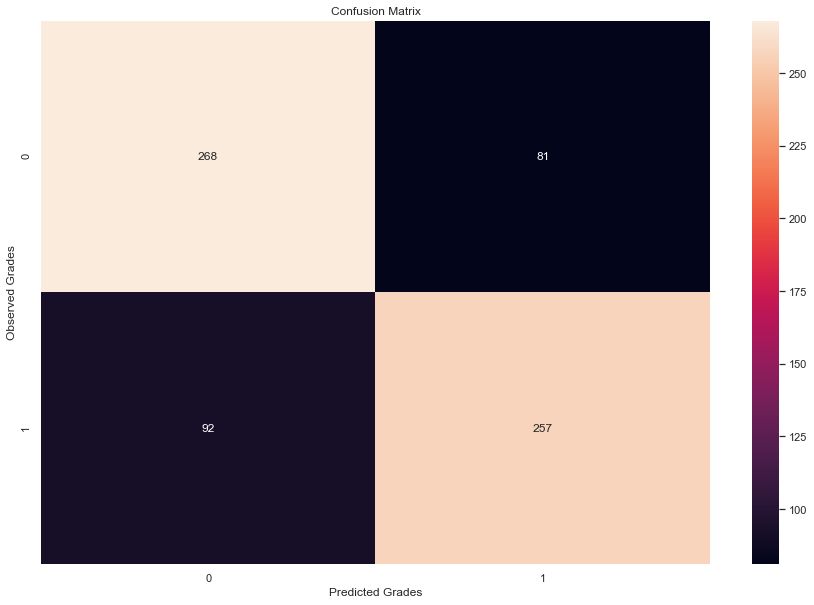

TEST
F1 Score: 0.7884615384615385
ROC: 0.6252354048964218
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.22      0.56      0.31        18
         pay       0.91      0.69      0.79       118

    accuracy                           0.68       136
   macro avg       0.56      0.63      0.55       136
weighted avg       0.82      0.68      0.73       136



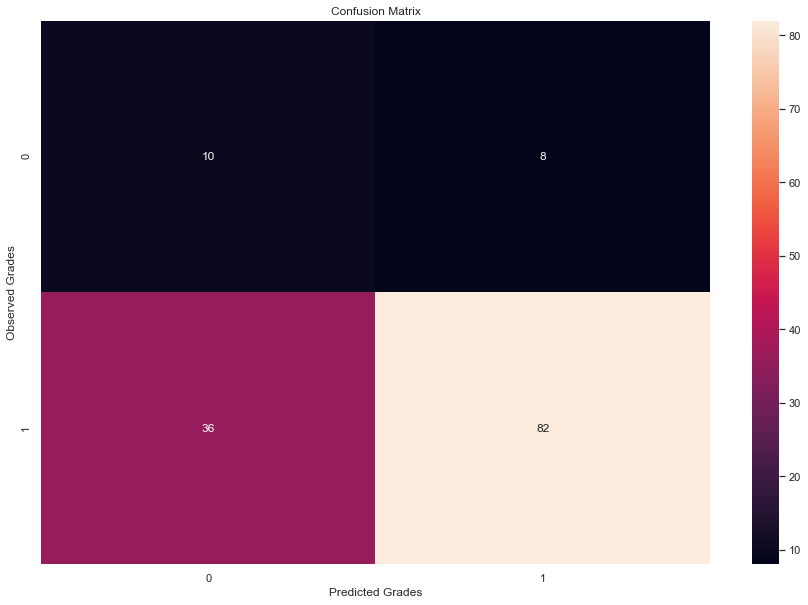

In [723]:
lr = LogisticRegression()

# Feature Selection
lr = RFECV(lr, scoring='roc_auc')

lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

lr_classification_report = classification_report(y_test, lr_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = lr.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = lr.predict(X_test) 
f1_lr = f1_score(y_test, predictions_test)
roc_lr = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_lr))
print(f"ROC: {roc_lr}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-5"></a>

In [ ]:
lr_classifier = LogisticRegression()

lr_grid_search = GridSearchCV(lr_classifier, scoring="roc_auc", cv=5, param_grid={})
lr_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(lr_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = lr_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = lr_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Naive Bayes <a class="anchor" id="naive-bayes"></a>

In [724]:
nb = GaussianNB()

# Feature Selection
nb = RFECV(nb, scoring='roc_auc')

nb.fit(X_train, y_train)
nb_prediction = nb.predict(X_test)

nb_classification_report = classification_report(y_test, nb_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = nb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = nb.predict(X_test) 
f1_nb = f1_score(y_test, predictions_test)
roc_nb = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nb))
print(f"ROC: {roc_nb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

ValueError: when `importance_getter=='auto'`, the underlying estimator GaussianNB should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


### Parameter Tunning <a class="anchor" id="parameter-tunning-6"></a>

In [ ]:
nb_classifier = GaussianNB()

nb_grid_search = GridSearchCV(nb_classifier, scoring="roc_auc", cv=5, param_grid={})
nb_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(nb_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = nb_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = nb_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Random Forest <a class="anchor" id="random-forest"></a>

In [ ]:
rf = RandomForestClassifier()

# Feature Selection
rf = RFECV(rf, scoring='roc_auc')

rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

rf_classification_report = classification_report(y_test, rf_prediction, output_dict=True)


print(53 * '=')
print("TRAIN")
predictions_train = rf.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = rf.predict(X_test) 
f1_rf = f1_score(y_test, predictions_test)
roc_rf = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_rf))
print(f"ROC: {f1_roc}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-7"></a>

In [ ]:
rf_classifier = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_classifier, scoring="roc_auc", cv=5, param_grid={})
rf_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(rf_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = rf_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = rf_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## XGBoost <a class="anchor" id="xgboost"></a>

In [ ]:
# xgb = XGBClassifier()

# Feature Selection
# xgb = RFECV(xgb, scoring='roc_auc')

# xgb.fit(X_train, y_train)
# xgb_prediction = xgb.predict(X_test)

# xgb_classification_report = classification_report(y_test, xgb_prediction, output_dict=True)

# print(f"Classification report:\n{classification_report(y_test, xgb_prediction, labels=np.unique(y_train))}\n")

# sb.set(font_scale=1.0)

# ax = plt.subplot()

# confusion_matrix_xgb = confusion_matrix(y_test, xgb_prediction)

# sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")

# ax.set_xlabel('Predicted Grades');
# ax.set_ylabel('Observed Grades');
# ax.set_title('Confusion Matrix');
# plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-8"></a>

#### [back](#index)
## MLP <a class="anchor" id="mlp"></a>

In [ ]:
mlp = MLPClassifier(alpha=1, max_iter=1000)

# Feature Selection
mlp = RFECV(mlp, scoring='roc_auc')

mlp.fit(X_train, y_train)
mlp_prediction = mlp.predict(X_test)

mlp_classification_report = classification_report(y_test, mlp_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = mlp.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = mlp.predict(X_test) 
f1_mlp = f1_score(y_test, predictions_test)
roc_mlp = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_mlp))
print(f"ROC: {roc_mlp}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-9"></a>

In [ ]:
mlp_classifier = MLPClassifier(random_state=1, early_stopping=False)

mlp_grid_search = GridSearchCV(mlp_classifier, scoring="roc_auc", cv=10, param_grid={})
mlp_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(mlp_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = mlp_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = mlp_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Ada Boost <a class="anchor" id="ada-boost"></a>

In [ ]:
boost = AdaBoostClassifier()

# Feature Selection
boost = RFECV(boost, scoring='roc_auc')

boost.fit(X_train, y_train)
boost_prediction = boost.predict(X_test)

boost_classification_report = classification_report(y_test, boost_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = boost.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = boost.predict(X_test) 
f1_boost = f1_score(y_test, predictions_test)
roc_boost = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_boost))
print(f"ROC: {roc_boost}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-10"></a>

In [ ]:
ada_classifier = AdaBoostClassifier(random_state=0)

ada_grid_search = GridSearchCV(ada_classifier, scoring="roc_auc", cv=3, param_grid={})
ada_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(ada_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = ada_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_ada = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = ada_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_ada = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Voting <a class="anchor" id="voting"></a>

In [ ]:
# vote = VotingClassifier(
#      estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
#      voting='hard', weights=[1,1,1]
# )

# Feature Selection
# classifier = RFECV(vote, scoring='roc_auc')

# vote.fit(X_train, y_train)
# vote_prediction = vote.predict(X_test)

# vote_classification_report = classification_report(y_test, vote_prediction, output_dict=True)

# print(f"Classification report:\n{classification_report(y_test, vote_prediction, labels=np.unique(y_train))}\n")

# sb.set(font_scale=1.0)

# ax = plt.subplot()

# confusion_matrix_vote = confusion_matrix(y_test, vote_prediction)

# sb.heatmap(confusion_matrix_vote, annot=True, ax=ax, fmt="g")

# ax.set_xlabel('Predicted Grades');
# ax.set_ylabel('Observed Grades');
# ax.set_title('Confusion Matrix');
# plt.show()

In [ ]:
#table = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal']),
#                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'XGB', 'MLP', 'BOOST', 'VOTE'], [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svm_classification_report['accuracy'], nn_classification_report['accuracy'], lr_classification_report['accuracy'], nb_classification_report['accuracy'], rf_classification_report['accuracy'], xgb_classification_report['accuracy'], mlp_classification_report['accuracy'], boost_classification_report['accuracy'], vote_classification_report['accuracy']]]))
#                     ])

table = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC Score Normal']),
                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'MLP', 'BOOST'], 
                                    [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svm_classification_report['accuracy'], nn_classification_report['accuracy'], lr_classification_report['accuracy'], nb_classification_report['accuracy'], rf_classification_report['accuracy'], mlp_classification_report['accuracy'], boost_classification_report['accuracy']], 
                                   [f1_dt, f1_knn, f1_svm, f1_nn, f1_lr, f1_nb, f1_rf, f1_mlp, f1_boost], [roc_dt, roc_knn, roc_svm, roc_nn, roc_lr, roc_nb, roc_rf, roc_mlp, roc_boost]]))
                     ])

table.show()

In [ ]:
test_data_no_ids.info()

#### [back](#index)
## Apply Model <a class="anchor" id="apply-model"></a>

In [ ]:
test_inputs = test_data_no_ids.drop(columns=['status', 'loan_id'])

pred_comp = boost.predict_proba(test_inputs)

pred_comp = pd.DataFrame(pred_comp, columns=['col2', 'Predicted'])

pred_comp.drop('col2', axis=1, inplace=True)
all_ids_comp = pd.DataFrame(all_ids_comp, columns=['Id'])
# pred_comp = [(1-pred_comp[n]) for n in range(0, len(pred_comp))]
# print(pred_comp)
results = pd.concat([all_ids_comp, pred_comp], axis=1)
results = results.rename(columns={"loan_id":"Id"})
results.to_csv('results.csv', index = False)

print(results)